## **HOME CREDIT SCORE CARD MODEL**

#### Latar Belakang Proyek



Lembaga keuangan menyediakan layanan kredit untuk memenuhi kebutuhan masyarakat, baik konsumtif maupun produktif. Banyak orang kesulitan mendapatkan pinjaman karena riwayat kredit yang tidak cukup atau tidak ada. Home Credit menggunakan berbagai data alternatif untuk memprediksi kemampuan pembayaran klien guna memastikan pengalaman peminjaman yang positif bagi klien. Hal ini akan memastikan bahwa klien yang mampu membayar tidak ditolak dan pinjaman diberikan dengan pokok, jatuh tempo, dan jadwal pembayaran yang akan memberdayakan klien untuk sukses.

#### Tujuan

1. Mengidentifikasi karakteristik calon klien yang akan mengalami kesulitan dalam membayar pinjaman.
2. Memprediksi kemampuan pembayaran klien.

#### Sasaran

Membuat model credit scoring untuk mengelola, memahami, dan memodelkan risiko kredit yang akan ditangani secara optimal.

#### Metrik Bisnis

Dapat digunakan untuk memutuskan apakah aplikasi kredit klien diterima atau ditolak.

## Persiapan

#### Import Library

In [1]:
# mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #seleksi fitur
from sklearn.feature_selection import chi2
from sklearn.utils import resample #resampling
from sklearn.model_selection import train_test_split #pemisahan data
from sklearn.preprocessing import StandardScaler #normalisasi fitur

from sklearn.linear_model import LogisticRegression #regresi logistik
from sklearn.naive_bayes import GaussianNB #naive bayes gaussian
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #pohon keputusan
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score #skor roc

# konfigurasi tampilan pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Membaca Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# memuat dataset aplikasi train
application_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HomeCredit/application_train.csv", sep=',')
print('Dataset ini memiliki %d baris dan %d kolom.' % application_train.shape)
application_train.head()

Dataset ini memiliki 307511 baris dan 122 kolom.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Exploratory Data Analysis (EDA)

#### Memeriksa Struktur Data

In [4]:
print('Tipe data: \n')
application_train.info(verbose=True)

Tipe data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int

#### Analisis Distribusi Target

In [5]:
# membuat salinan dataset untuk analisis
train = application_train.copy()

In [6]:
# memetakan nilai target ke label yang lebih deskriptif
decode_map = {0: "Tidak Ada Kesulitan Pembayaran", 1: "Kesulitan Pembayaran"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

In [7]:
# menghitung distribusi target
target_pay = (train[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_pay.style.background_gradient(cmap='RdBu')

,TARGET,COUNT
0,Tidak Ada Kesulitan Pembayaran,282686
1,Kesulitan Pembayaran,24825


In [8]:
# menghitung persentase distribusi target
pay_ability = train['TARGET'].value_counts(normalize=True)
pay_ability.reset_index().style.background_gradient(cmap='RdBu')

,TARGET,proportion
0,Tidak Ada Kesulitan Pembayaran,0.919271
1,Kesulitan Pembayaran,0.080729


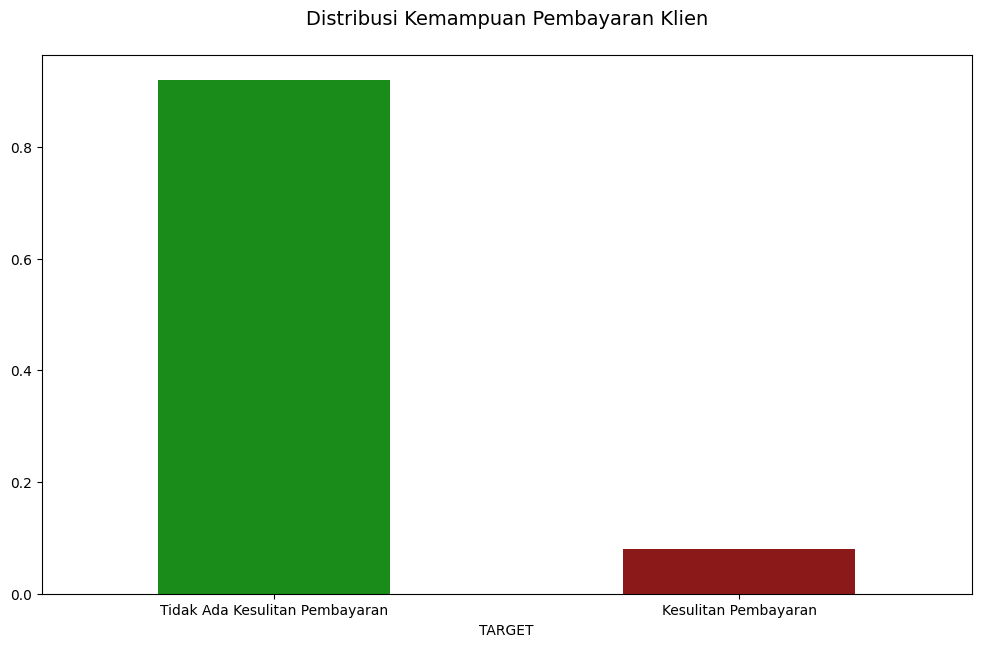

In [9]:
# visualisasi distribusi target
fig = plt.figure(figsize = (12,7))
pay_ability.plot(kind='bar', color= ['green','maroon'], alpha = 0.9, rot=0)
plt.title('Distribusi Kemampuan Pembayaran Klien\n', fontsize=14)
plt.show()

Penjelasan hasil:

Terdapat sekitar 92% pinjaman setara dengan 282.686 dengan TARGET = 0, yang menunjukkan bahwa klien tidak memiliki masalah dalam membayar pinjaman pada waktunya.

Sementara itu, hanya 8% dari total pinjaman, setara dengan 24.825 pemohon dalam dataset ini, melibatkan klien yang memiliki masalah dalam membayar pinjaman.

#### Analisis Fitur Kategorikal vs Target

##### ANALISIS 1: Tipe Kontrak, Jenis Kelamin, Status Kepemilikan Mobil, dan Status Kepemilikan Properti.

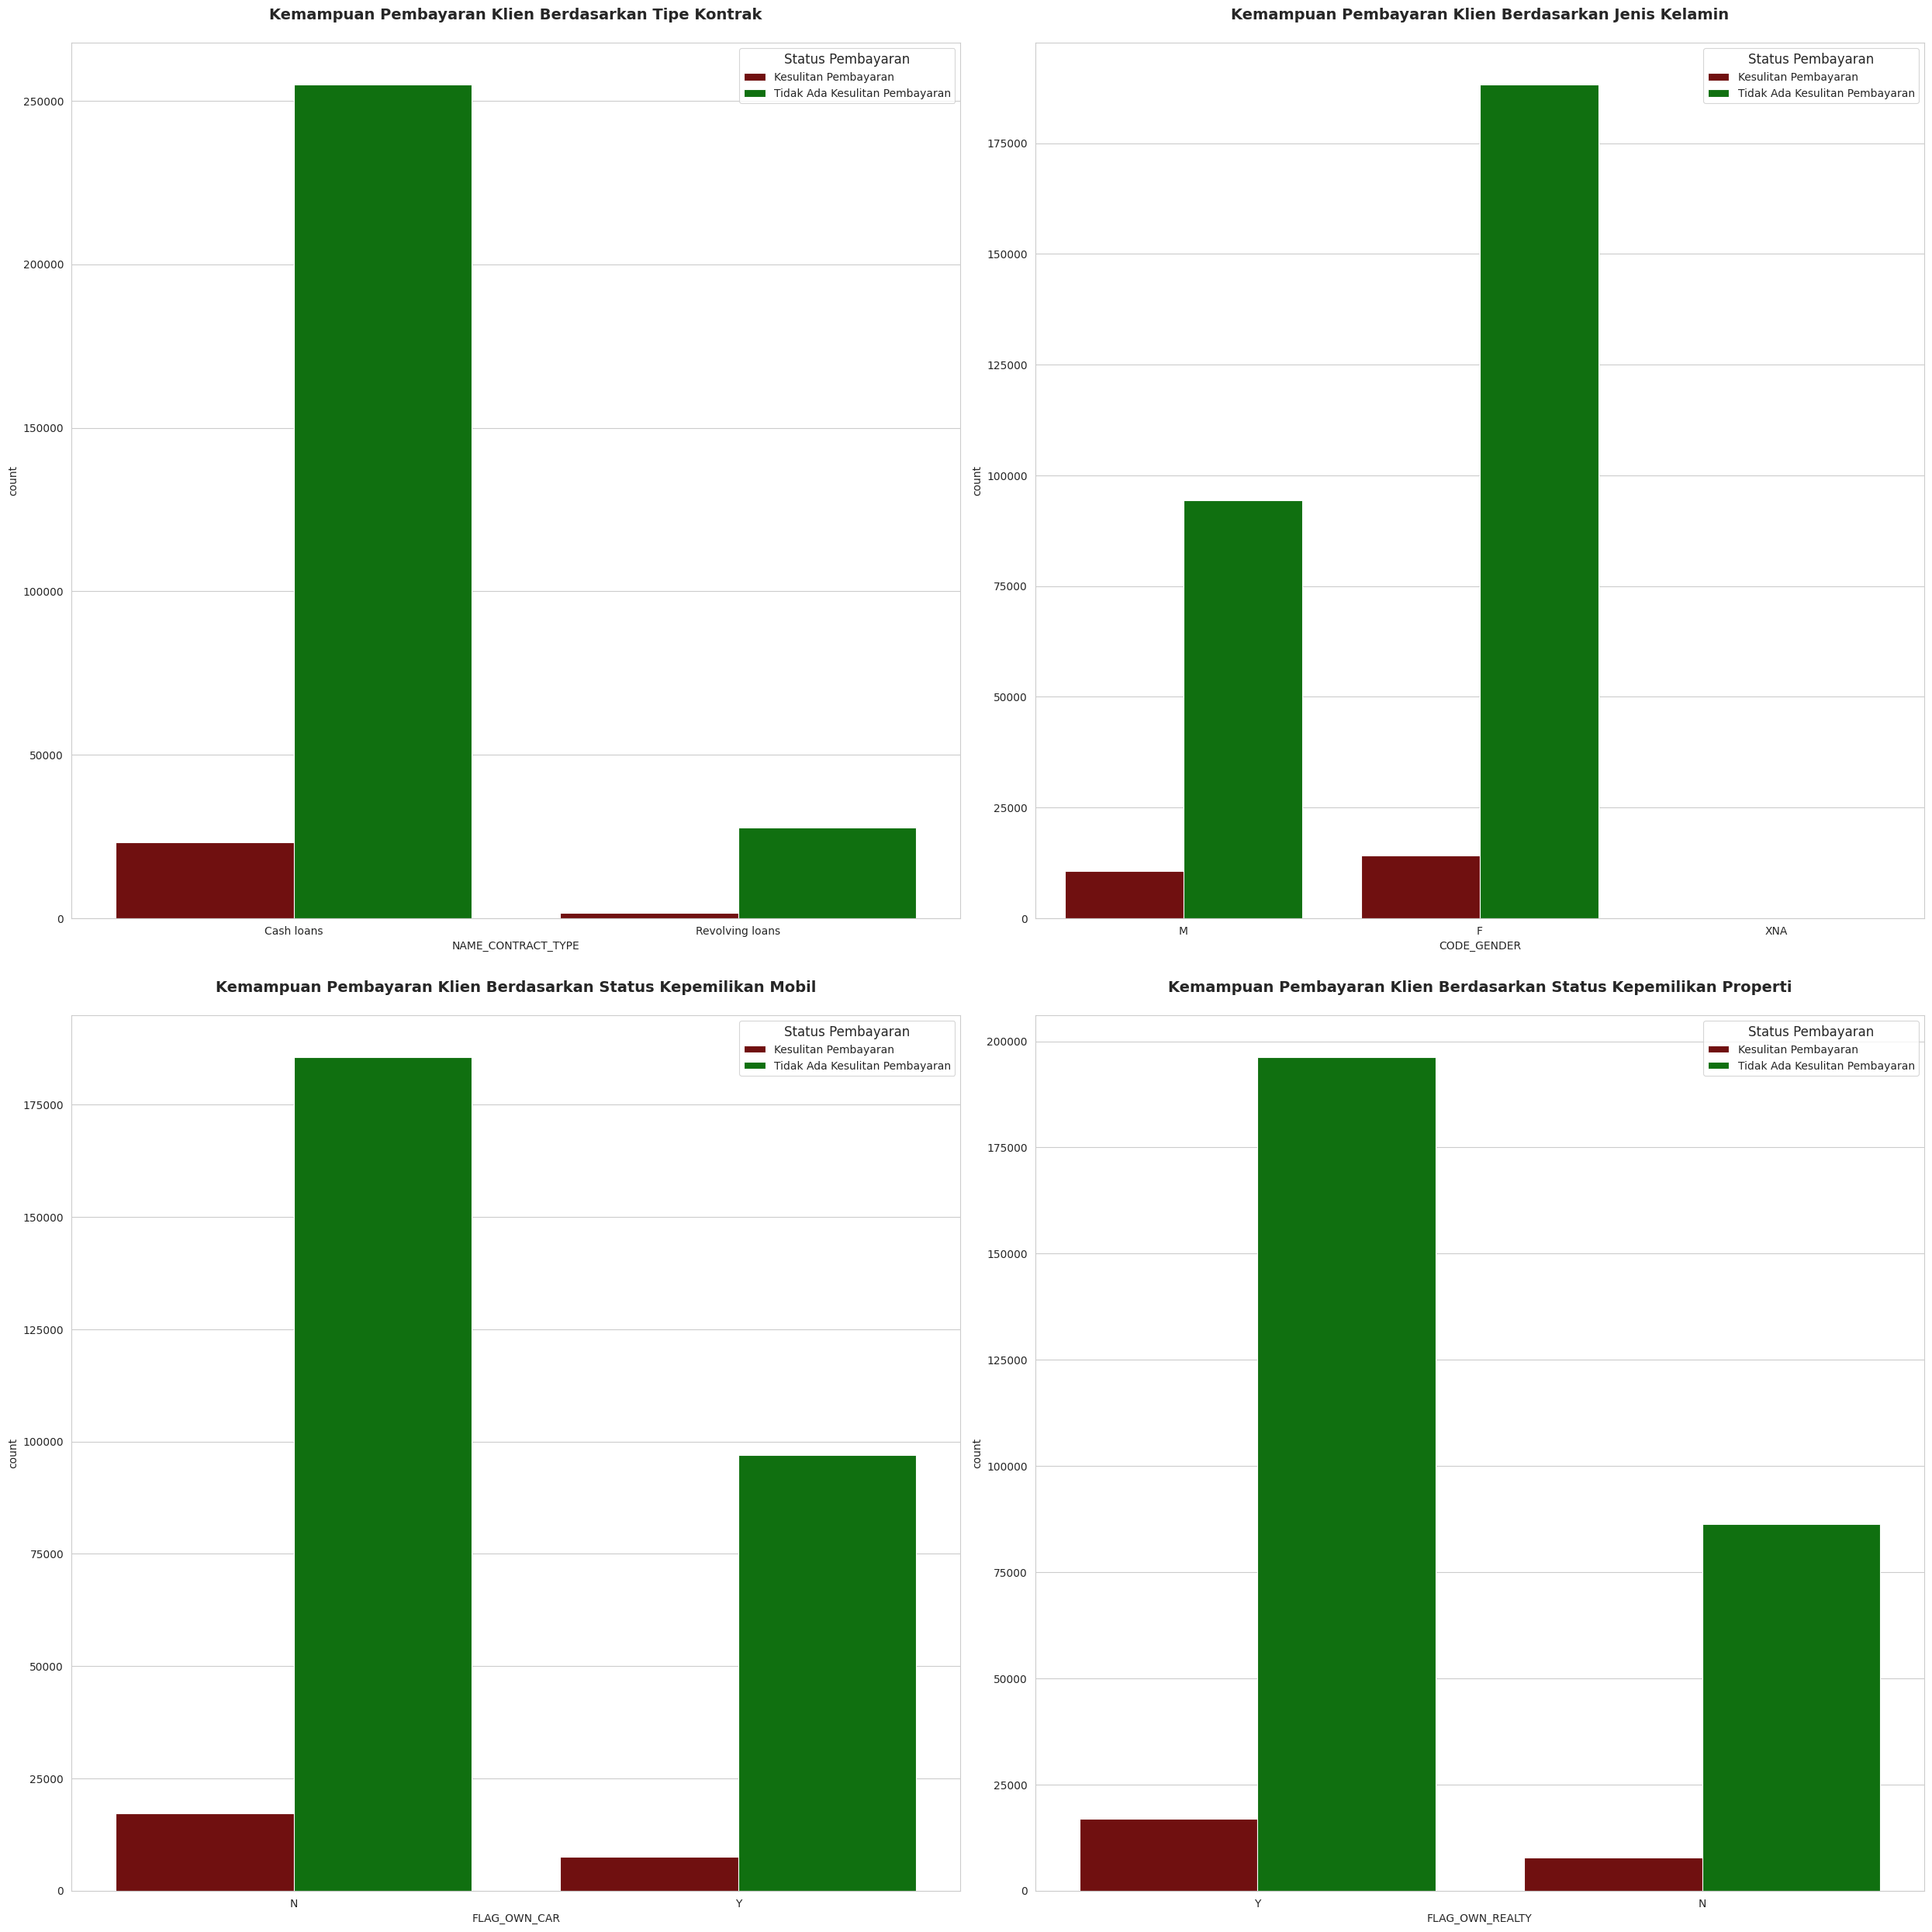

In [10]:
# Membuat visualisasi komparatif untuk fitur-fitur kategorikal utama
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Plot 1: Tipe Kontrak vs Target
ax[0][0].set_title('Kemampuan Pembayaran Klien Berdasarkan Tipe Kontrak\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data=train, hue='TARGET', palette=custom_palette, ax=ax[0][0])

# Plot 2: Jenis Kelamin vs Target
ax[0][1].set_title('Kemampuan Pembayaran Klien Berdasarkan Jenis Kelamin\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data=train, hue='TARGET', palette=custom_palette, ax=ax[0][1])

# Plot 3: Status Kepemilikan Mobil vs Target
ax[1][0].set_title('\nKemampuan Pembayaran Klien Berdasarkan Status Kepemilikan Mobil\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data=train, hue='TARGET', palette=custom_palette, ax=ax[1][0])

# Plot 4: Status Kepemilikan Properti vs Target
ax[1][1].set_title('\nKemampuan Pembayaran Klien Berdasarkan Status Kepemilikan Properti\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data=train, hue='TARGET', palette=custom_palette, ax=ax[1][1])

# Menambahkan legenda yang konsisten untuk semua plot
for axes in ax.flat:
    axes.legend(title='Status Pembayaran', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()

Analisis detail untuk setiap fitur kategorikal.

In [11]:
# 1. Tipe Kontrak vs Target - Analisis Kuantitatif
contract_type = train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Kontrak')
contract_type.sort_values(by='SK_ID_CURR', ascending=False)
contract_type.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Tipe Kontrak


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,Kesulitan Pembayaran,23221
1,Cash loans,Tidak Ada Kesulitan Pembayaran,255011
2,Revolving loans,Kesulitan Pembayaran,1604
3,Revolving loans,Tidak Ada Kesulitan Pembayaran,27675


Penjelasan hasil:

Pinjaman tunai dengan 278.232 pinjaman merupakan mayoritas dari total pinjaman dalam kumpulan data ini.

Pinjaman berputar memiliki jumlah yang jauh lebih rendah yaitu 29.279 dibandingkan dengan pinjaman tunai.

In [12]:
# 2. Jenis Kelamin vs Target - Analisis Kuantitatif
# Mengkodekan ulang nilai gender untuk kejelasan
train['CODE_GENDER'] = train['CODE_GENDER'].replace(['F','M'],['Perempuan','Laki-laki'])

gender_target = train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Jenis Kelamin')
gender_target.sort_values(by='SK_ID_CURR', ascending=False)
gender_target.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Jenis Kelamin


,CODE_GENDER,TARGET,SK_ID_CURR
0,Laki-laki,Kesulitan Pembayaran,10655
1,Laki-laki,Tidak Ada Kesulitan Pembayaran,94404
2,Perempuan,Kesulitan Pembayaran,14170
3,Perempuan,Tidak Ada Kesulitan Pembayaran,188278
4,XNA,Tidak Ada Kesulitan Pembayaran,4


In [13]:
# Menghitung rata-rata target per gender
application_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


Penjelasan hasil:

Dapat dilihat bahwa terdapat sekitar 202.448 aplikasi pinjaman oleh perempuan yang telah mengajukan mayoritas pinjaman dan sekitar 105.059 aplikasi oleh laki-laki.

Namun, laki-laki memiliki masalah dalam membayar pinjaman pada persentase yang lebih tinggi (sekitar 10% dari total) dibandingkan klien perempuan (sekitar 7%).

In [14]:
# 3. Status Kepemilikan Mobil vs Target - Analisis Kuantitatif
train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].replace(['Y','N'],['Ya','Tidak'])

own_car = train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Status Kepemilikan Mobil')
own_car.sort_values(by='SK_ID_CURR', ascending=False)
own_car.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Status Kepemilikan Mobil


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,Tidak,Kesulitan Pembayaran,17249
1,Tidak,Tidak Ada Kesulitan Pembayaran,185675
2,Ya,Kesulitan Pembayaran,7576
3,Ya,Tidak Ada Kesulitan Pembayaran,97011


In [15]:
application_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


Penjelasan hasil:

Sebagian besar klien tidak memiliki mobil. Sebanyak 202.924 klien tidak memiliki mobil dan 104.587 klien memiliki mobil.

Klien yang tidak memiliki mobil (sekitar 8%) mengalami kesulitan membayar pinjaman dibandingkan dengan klien yang memiliki mobil (sekitar 7%).

In [16]:
# 4. Status Kepemilikan Properti vs Target - Analisis Kuantitatif
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].replace(['Y','N'],['Ya','Tidak'])

own_reality = train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Status Kepemilikan Properti')
own_reality.sort_values(by='SK_ID_CURR', ascending=False)
own_reality.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Status Kepemilikan Properti


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,Tidak,Kesulitan Pembayaran,7842
1,Tidak,Tidak Ada Kesulitan Pembayaran,86357
2,Ya,Kesulitan Pembayaran,16983
3,Ya,Tidak Ada Kesulitan Pembayaran,196329


In [17]:
application_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


Penjelasan hasil:

Sebagian besar klien memiliki apartemen/rumah. Sebanyak 94.199 klien tidak memiliki apartemen/rumah dan 213.312 memiliki rumah.

Klien yang tidak memiliki rumah/apartemen (sekitar 8.32%) mengalami kesulitan dalam membayar pinjaman dibandingkan dengan klien yang memiliki rumah/apartemen (sekitar 7.96%).

##### ANALISIS 2: Tipe Suite, Tipe Pendapatan, Tipe Pendidikan, dan Status Keluarga

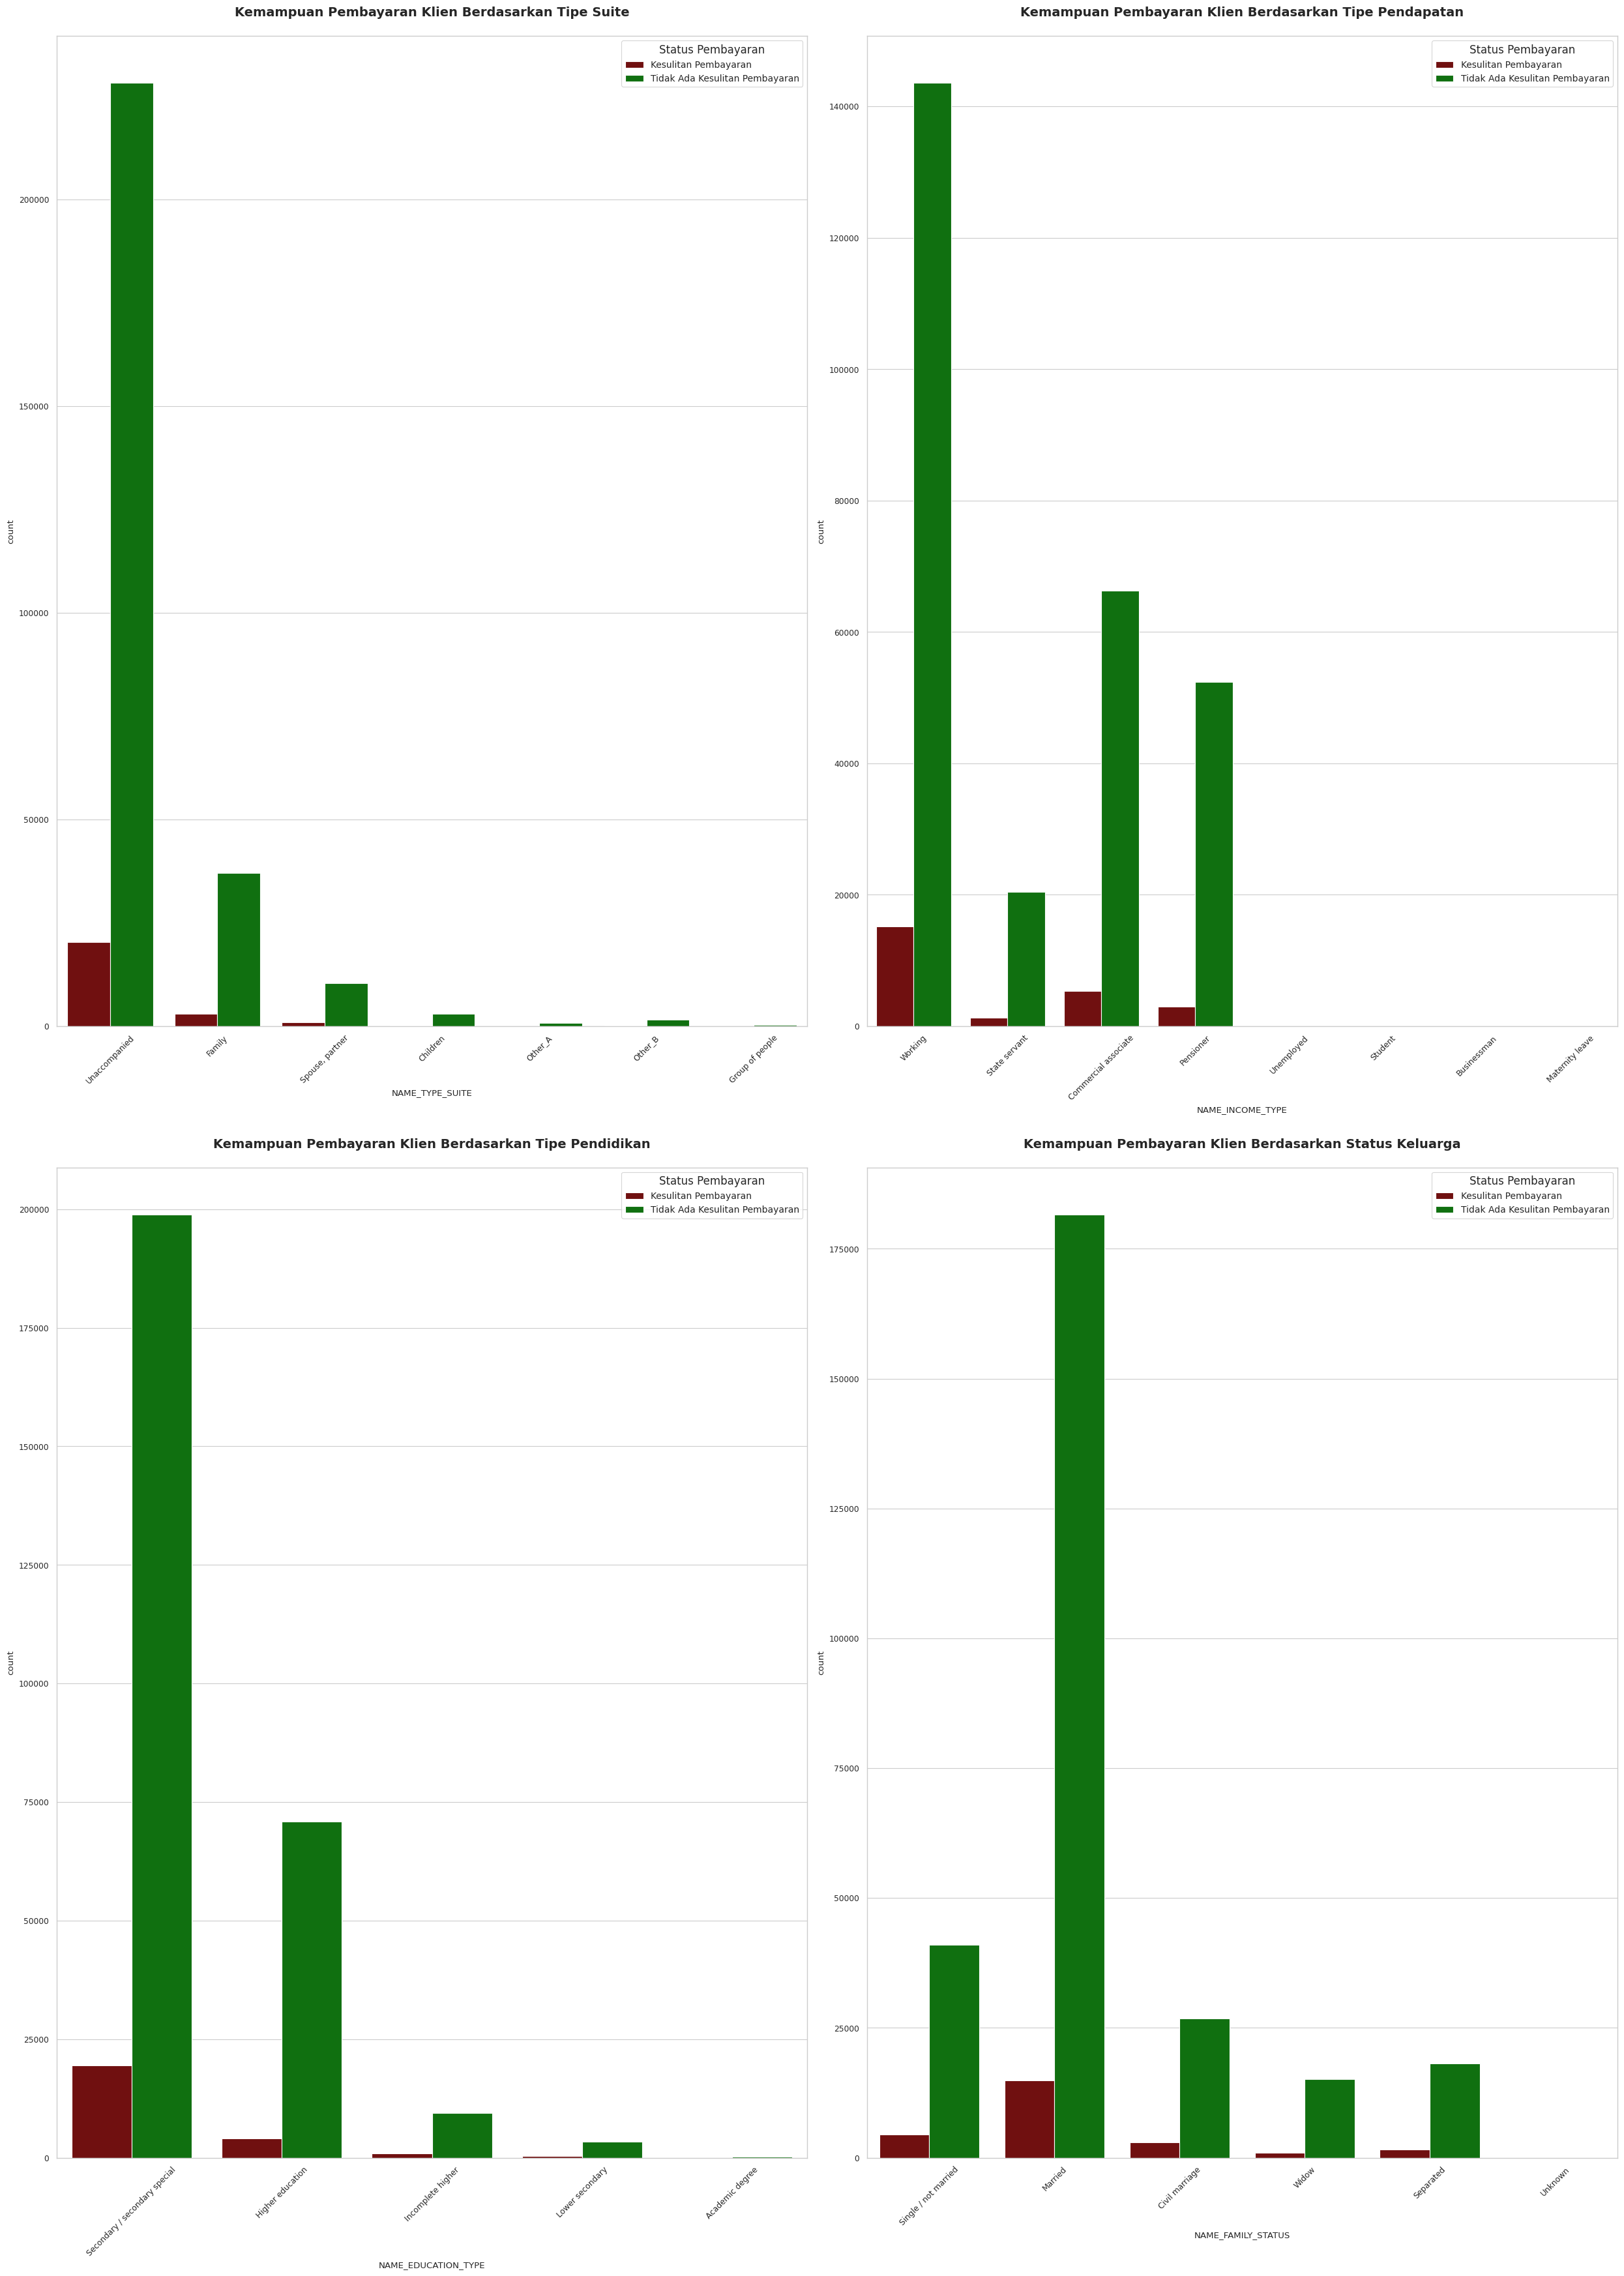

In [18]:
# Visualisasi untuk fitur kategorikal tambahan
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Plot 1: Tipe Suite vs Target
ax[0][0].set_title('Kemampuan Pembayaran Klien Berdasarkan Tipe Suite\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data=train, hue='TARGET', palette=custom_palette, ax=ax[0][0])
ax[0][0].tick_params(axis='x', rotation=45)  # Rotasi label x untuk keterbacaan

# Plot 2: Tipe Pendapatan vs Target
ax[0][1].set_title('Kemampuan Pembayaran Klien Berdasarkan Tipe Pendapatan\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data=train, hue='TARGET', palette=custom_palette, ax=ax[0][1])
ax[0][1].tick_params(axis='x', rotation=45)  # Rotasi label x untuk keterbacaan

# Plot 3: Tipe Pendidikan vs Target
ax[1][0].set_title('\nKemampuan Pembayaran Klien Berdasarkan Tipe Pendidikan\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data=train, hue='TARGET', palette=custom_palette, ax=ax[1][0])
ax[1][0].tick_params(axis='x', rotation=45)  # Rotasi label x untuk keterbacaan

# Plot 4: Status Keluarga vs Target
ax[1][1].set_title('\nKemampuan Pembayaran Klien Berdasarkan Status Keluarga\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data=train, hue='TARGET', palette=custom_palette, ax=ax[1][1])
ax[1][1].tick_params(axis='x', rotation=45)  # Rotasi label x untuk keterbacaan

# Menambahkan legenda yang konsisten untuk semua plot
for axes in ax.flat:
    axes.legend(title='Status Pembayaran', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()

Analisis kuantitatif untuk setiap fitur

In [19]:
# 5. Tipe Suite vs Target
suite_type = train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Suite')
suite_type.sort_values(by='SK_ID_CURR', ascending=False)
suite_type.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Tipe Suite


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,Kesulitan Pembayaran,241
1,Children,Tidak Ada Kesulitan Pembayaran,3026
2,Family,Kesulitan Pembayaran,3009
3,Family,Tidak Ada Kesulitan Pembayaran,37140
4,Group of people,Kesulitan Pembayaran,23
5,Group of people,Tidak Ada Kesulitan Pembayaran,248
6,Other_A,Kesulitan Pembayaran,76
7,Other_A,Tidak Ada Kesulitan Pembayaran,790
8,Other_B,Kesulitan Pembayaran,174
9,Other_B,Tidak Ada Kesulitan Pembayaran,1596


In [20]:
application_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


Penjelasan hasil:

Klien dengan name_type_suite = Other_B saat mengajukan pinjaman memiliki persentase kesulitan pembayaran pinjaman yang lebih tinggi (sekitar 9.83%).

In [21]:
# 6. Tipe Pendapatan vs Target
income_type = train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Pendapatan')
income_type.sort_values(by='SK_ID_CURR', ascending=False)
income_type.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Tipe Pendapatan


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,Tidak Ada Kesulitan Pembayaran,10
1,Commercial associate,Kesulitan Pembayaran,5360
2,Commercial associate,Tidak Ada Kesulitan Pembayaran,66257
3,Maternity leave,Kesulitan Pembayaran,2
4,Maternity leave,Tidak Ada Kesulitan Pembayaran,3
5,Pensioner,Kesulitan Pembayaran,2982
6,Pensioner,Tidak Ada Kesulitan Pembayaran,52380
7,State servant,Kesulitan Pembayaran,1249
8,State servant,Tidak Ada Kesulitan Pembayaran,20454
9,Student,Tidak Ada Kesulitan Pembayaran,18


In [22]:
application_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


Penjelasan hasil:

Klien dengan tipe pendapatan cuti hamil dengan persentase 40% dan pengangguran memiliki persentase 36% mengalami masalah dalam membayar pinjaman.

In [23]:
# 7. Tipe Pendidikan vs Target
education_type = train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Pendidikan')
education_type.sort_values(by='SK_ID_CURR', ascending=False)
education_type.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Tipe Pendidikan


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,Kesulitan Pembayaran,3
1,Academic degree,Tidak Ada Kesulitan Pembayaran,161
2,Higher education,Kesulitan Pembayaran,4009
3,Higher education,Tidak Ada Kesulitan Pembayaran,70854
4,Incomplete higher,Kesulitan Pembayaran,872
5,Incomplete higher,Tidak Ada Kesulitan Pembayaran,9405
6,Lower secondary,Kesulitan Pembayaran,417
7,Lower secondary,Tidak Ada Kesulitan Pembayaran,3399
8,Secondary / secondary special,Kesulitan Pembayaran,19524
9,Secondary / secondary special,Tidak Ada Kesulitan Pembayaran,198867


In [24]:
application_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


Penjelasan hasil:

Sejumlah besar aplikasi (218.391) diajukan oleh klien dengan pendidikan Sekolah Menengah/Sekolah Menengah Khusus.

Klien dengan tipe pendidikan Sekolah Menengah Pertama memiliki persentase tertinggi (sekitar 10.93%) mengalami masalah dalam membayar pinjaman.

In [25]:
# 8. Status Keluarga vs Target
family_status = train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Status Keluarga')
family_status.sort_values(by='SK_ID_CURR', ascending=False)
family_status.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Status Keluarga


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,Kesulitan Pembayaran,2961
1,Civil marriage,Tidak Ada Kesulitan Pembayaran,26814
2,Married,Kesulitan Pembayaran,14850
3,Married,Tidak Ada Kesulitan Pembayaran,181582
4,Separated,Kesulitan Pembayaran,1620
5,Separated,Tidak Ada Kesulitan Pembayaran,18150
6,Single / not married,Kesulitan Pembayaran,4457
7,Single / not married,Tidak Ada Kesulitan Pembayaran,40987
8,Unknown,Tidak Ada Kesulitan Pembayaran,2
9,Widow,Kesulitan Pembayaran,937


In [26]:
application_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


Penjelasan hasil:

Persentase tertinggi klien dengan masalah dalam membayar pinjaman adalah klien yang memiliki status keluarga perkawinan sipil sebesar 9.94%.

##### ANALISIS 3: Tipe Perumahan, Tipe Pekerjaan, Hari Proses, dan Tipe Organisasi

Analisis untuk fitur kategorikal lainnya

In [27]:
# 9. Tipe Perumahan vs Target
housing_type = train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Perumahan')
housing_type.sort_values(by='SK_ID_CURR', ascending=False)
housing_type.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Tipe Perumahan


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,Kesulitan Pembayaran,89
1,Co-op apartment,Tidak Ada Kesulitan Pembayaran,1033
2,House / apartment,Kesulitan Pembayaran,21272
3,House / apartment,Tidak Ada Kesulitan Pembayaran,251596
4,Municipal apartment,Kesulitan Pembayaran,955
5,Municipal apartment,Tidak Ada Kesulitan Pembayaran,10228
6,Office apartment,Kesulitan Pembayaran,172
7,Office apartment,Tidak Ada Kesulitan Pembayaran,2445
8,Rented apartment,Kesulitan Pembayaran,601
9,Rented apartment,Tidak Ada Kesulitan Pembayaran,4280


In [28]:
application_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


Penjelasan hasil:

Klien dengan tipe perumahan apartemen sewa memiliki persentase tertinggi (sekitar 12.31%) dalam kesulitan membayar pinjaman.

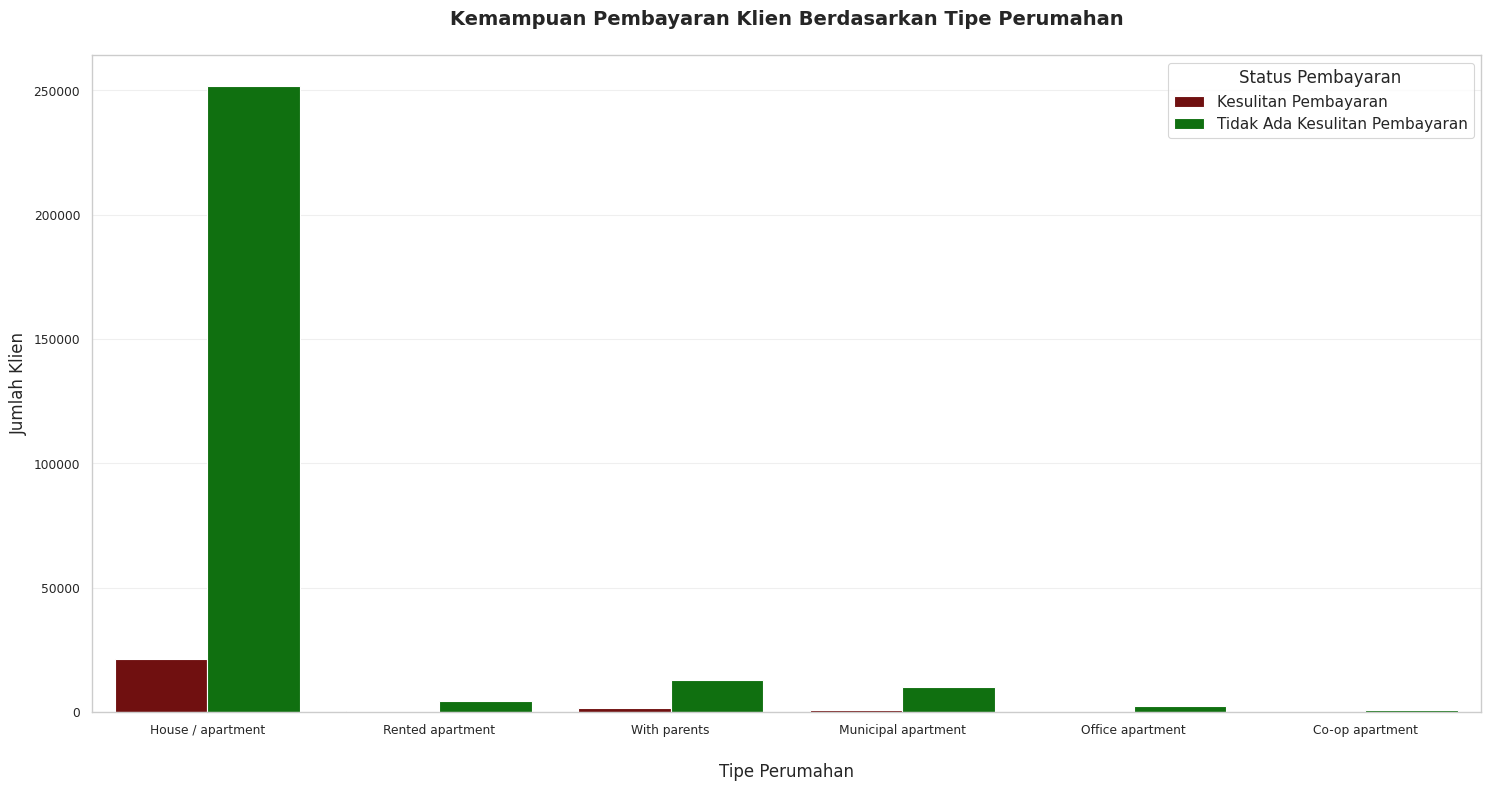

In [29]:
# Visualisasi khusus untuk Tipe Perumahan
plt.figure(figsize=(15,8))

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat countplot dengan palette khusus
fig = sns.countplot(x='NAME_HOUSING_TYPE', data=train, hue='TARGET', palette=custom_palette)
plt.title('Kemampuan Pembayaran Klien Berdasarkan Tipe Perumahan\n', fontweight='bold', fontsize=14)
plt.xlabel('\nTipe Perumahan', fontsize=12)
plt.ylabel('Jumlah Klien', fontsize=12)

# Menambahkan legenda dengan judul
plt.legend(title='Status Pembayaran', title_fontsize=12, fontsize=11)

# Menambahkan grid untuk memudahkan membaca nilai
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# 10. Tipe Pekerjaan vs Target
occupation_type = train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Pekerjaan')
occupation_type.sort_values(by='SK_ID_CURR', ascending=False)
occupation_type.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Tipe Pekerjaan


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,Kesulitan Pembayaran,474
1,Accountants,Tidak Ada Kesulitan Pembayaran,9339
2,Cleaning staff,Kesulitan Pembayaran,447
3,Cleaning staff,Tidak Ada Kesulitan Pembayaran,4206
4,Cooking staff,Kesulitan Pembayaran,621
5,Cooking staff,Tidak Ada Kesulitan Pembayaran,5325
6,Core staff,Kesulitan Pembayaran,1738
7,Core staff,Tidak Ada Kesulitan Pembayaran,25832
8,Drivers,Kesulitan Pembayaran,2107
9,Drivers,Tidak Ada Kesulitan Pembayaran,16496


In [31]:
application_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


Penjelasan hasil:

Persentase tertinggi klien dengan masalah dalam membayar pinjaman adalah klien dengan pekerjaan Pekerja Keterampilan Rendah sebesar 17.15%.

In [32]:
# 11. Hari Proses vs Target
process_day = train.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Hari Proses')
process_day.sort_values(by='SK_ID_CURR', ascending=False)
process_day.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Hari Proses


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,Kesulitan Pembayaran,4101
1,FRIDAY,Tidak Ada Kesulitan Pembayaran,46237
2,MONDAY,Kesulitan Pembayaran,3934
3,MONDAY,Tidak Ada Kesulitan Pembayaran,46780
4,SATURDAY,Kesulitan Pembayaran,2670
5,SATURDAY,Tidak Ada Kesulitan Pembayaran,31182
6,SUNDAY,Kesulitan Pembayaran,1283
7,SUNDAY,Tidak Ada Kesulitan Pembayaran,14898
8,THURSDAY,Kesulitan Pembayaran,4098
9,THURSDAY,Tidak Ada Kesulitan Pembayaran,46493


In [33]:
application_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


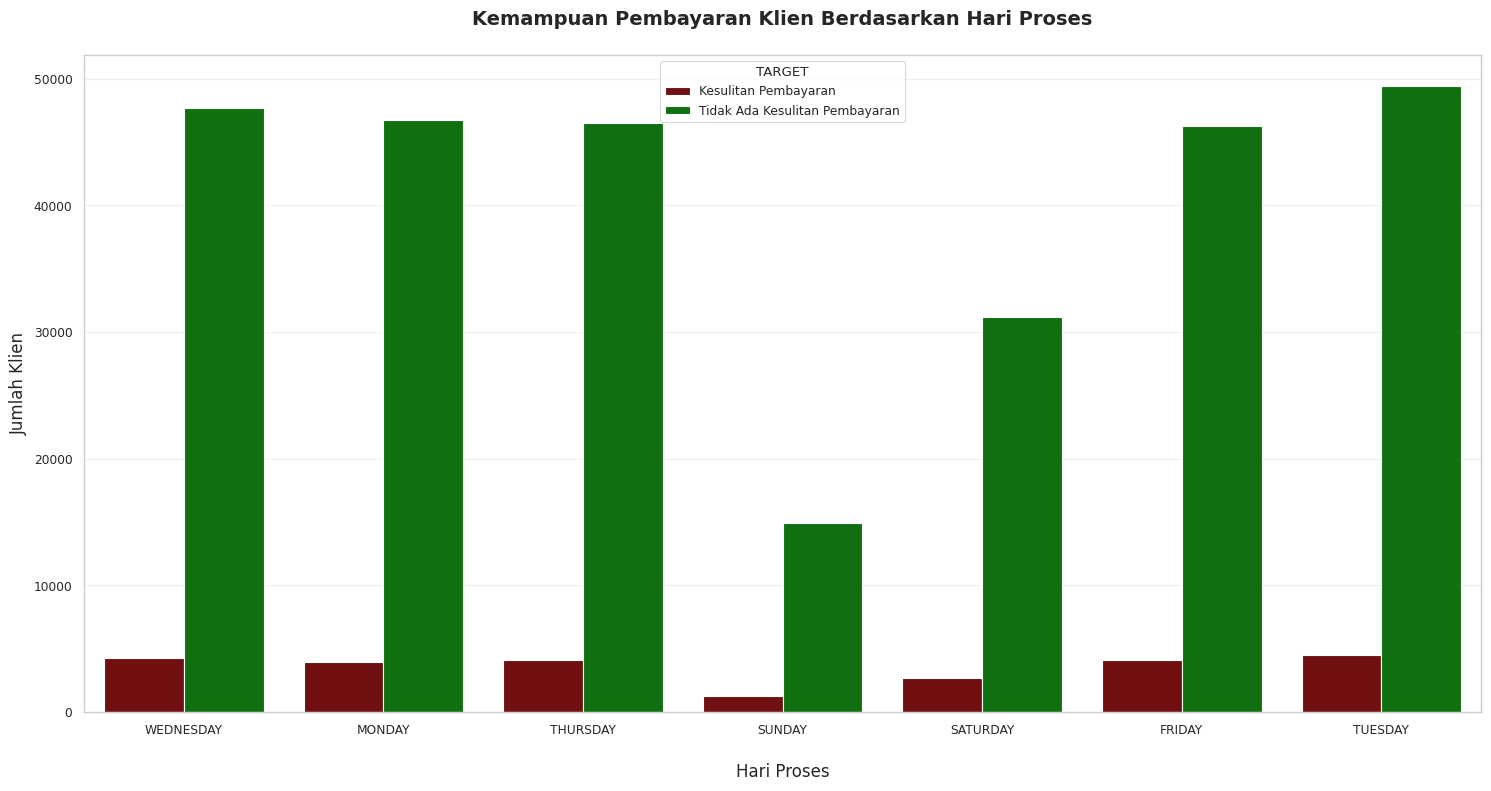

In [34]:
# Visualisasi Hari Proses
plt.figure(figsize=(15,8))

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat countplot dengan palette khusus
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=train, hue='TARGET', palette=custom_palette)
plt.title('Kemampuan Pembayaran Klien Berdasarkan Hari Proses\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHari Proses', fontsize=12)
plt.ylabel('Jumlah Klien', fontsize=12)

# Menambahkan grid untuk memudahkan membaca nilai
plt.grid(axis='y', alpha=0.3)

# Format tambahan untuk meningkatkan keterbacaan
plt.tight_layout()

plt.show()

Penjelasan hasil:

Berdasarkan data ini, terdapat persentase sekitar 7-8% setiap hari yang mengalami masalah dalam membayar pinjaman.

In [35]:
# 12. Tipe Organisasi vs Target
organization_type = train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Organisasi')
organization_type.sort_values(by='SK_ID_CURR', ascending=False)
organization_type.style.background_gradient(cmap='RdYlGn')

Kemampuan Pembayaran Klien Berdasarkan Tipe Organisasi


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,Kesulitan Pembayaran,35
1,Advertising,Tidak Ada Kesulitan Pembayaran,394
2,Agriculture,Kesulitan Pembayaran,257
3,Agriculture,Tidak Ada Kesulitan Pembayaran,2197
4,Bank,Kesulitan Pembayaran,130
5,Bank,Tidak Ada Kesulitan Pembayaran,2377
6,Business Entity Type 1,Kesulitan Pembayaran,487
7,Business Entity Type 1,Tidak Ada Kesulitan Pembayaran,5497
8,Business Entity Type 2,Kesulitan Pembayaran,900
9,Business Entity Type 2,Tidak Ada Kesulitan Pembayaran,9653


In [36]:
application_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


Penjelasan hasil:

Persentase tertinggi klien dengan masalah dalam pembayaran pinjaman adalah klien dengan tipe organisasi Transportasi:Tipe 3 sebesar 15.75%.

#### Analisis Fitur Numerik vs Target

##### ANALISIS 13: Jumlah Kredit Pinjaman vs Target

/tmp/ipython-input-1529458779.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train, palette=custom_palette)


Statistik Deskriptif Jumlah Kredit:
                                   count           mean            std  \
TARGET                                                                   
Kesulitan Pembayaran             24825.0  557778.527674  346433.235646   
Tidak Ada Kesulitan Pembayaran  282686.0  602648.282002  406845.907710   

                                    min       25%       50%       75%  \
TARGET                                                                  
Kesulitan Pembayaran            45000.0  284400.0  497520.0  733315.5   
Tidak Ada Kesulitan Pembayaran  45000.0  270000.0  517788.0  810000.0   

                                      max  
TARGET                                     
Kesulitan Pembayaran            4027680.0  
Tidak Ada Kesulitan Pembayaran  4050000.0  


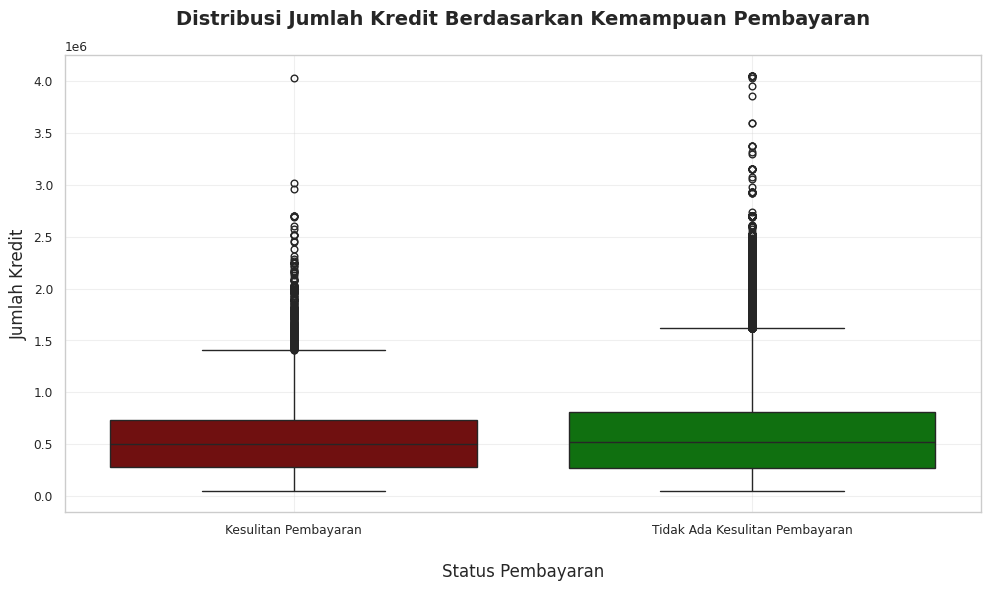

In [37]:
# Boxplot untuk melihat distribusi jumlah kredit berdasarkan target
plt.figure(figsize=(10, 6))

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat boxplot dengan palette khusus
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train, palette=custom_palette)
plt.title('Distribusi Jumlah Kredit Berdasarkan Kemampuan Pembayaran\n', fontweight='bold', fontsize=14)
plt.xlabel('\nStatus Pembayaran', fontsize=12)
plt.ylabel('Jumlah Kredit', fontsize=12)
plt.grid(alpha=0.3)

# Format tambahan untuk meningkatkan keterbacaan
plt.tight_layout()

# Menambahkan anotasi statistik deskriptif
stats = train.groupby('TARGET')['AMT_CREDIT'].describe()
print("Statistik Deskriptif Jumlah Kredit:")
print(stats)

plt.show()

Penjelasan hasil:

Nilai median dari jumlah kredit klien yang tidak memiliki kesulitan pembayaran sedikit lebih besar daripada nilai median klien yang memiliki kesulitan pembayaran.

Artinya, klien dengan jumlah kredit yang lebih tinggi memiliki peluang yang sedikit lebih tinggi untuk mampu membayar pinjaman daripada klien dengan jumlah kredit yang lebih rendah.

##### ANALISIS 14: Jumlah Pendapatan vs Target

/tmp/ipython-input-434913732.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette=custom_palette)


Statistik Deskriptif Pendapatan Total:
                                   count           mean            std  \
TARGET                                                                   
Kesulitan Pembayaran             24825.0  165611.760906  746676.959440   
Tidak Ada Kesulitan Pembayaran  282686.0  169077.722266  110476.268524   

                                    min       25%       50%       75%  \
TARGET                                                                  
Kesulitan Pembayaran            25650.0  112500.0  135000.0  202500.0   
Tidak Ada Kesulitan Pembayaran  25650.0  112500.0  148500.0  202500.0   

                                        max  
TARGET                                       
Kesulitan Pembayaran            117000000.0  
Tidak Ada Kesulitan Pembayaran   18000090.0  


/tmp/ipython-input-434913732.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette=custom_palette)


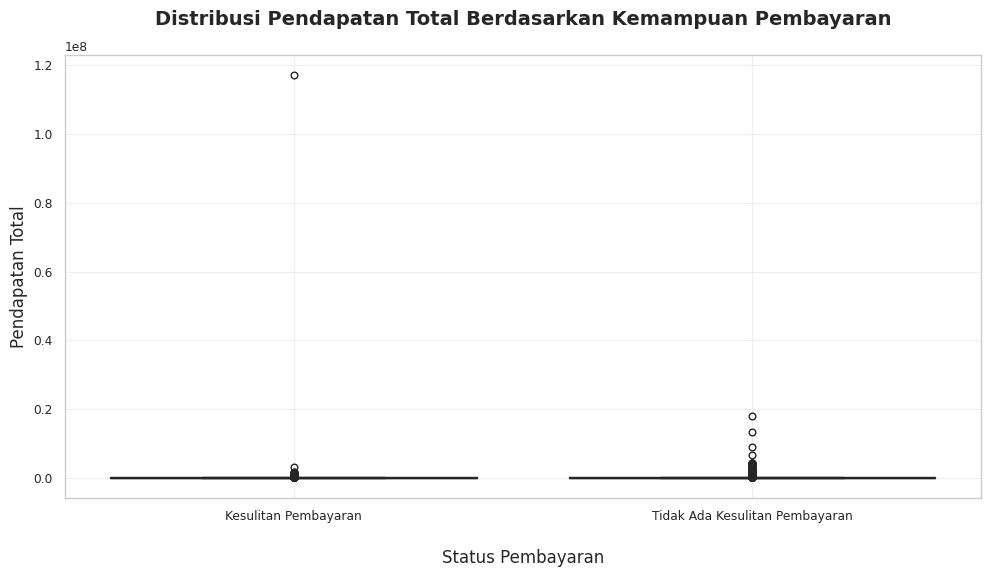

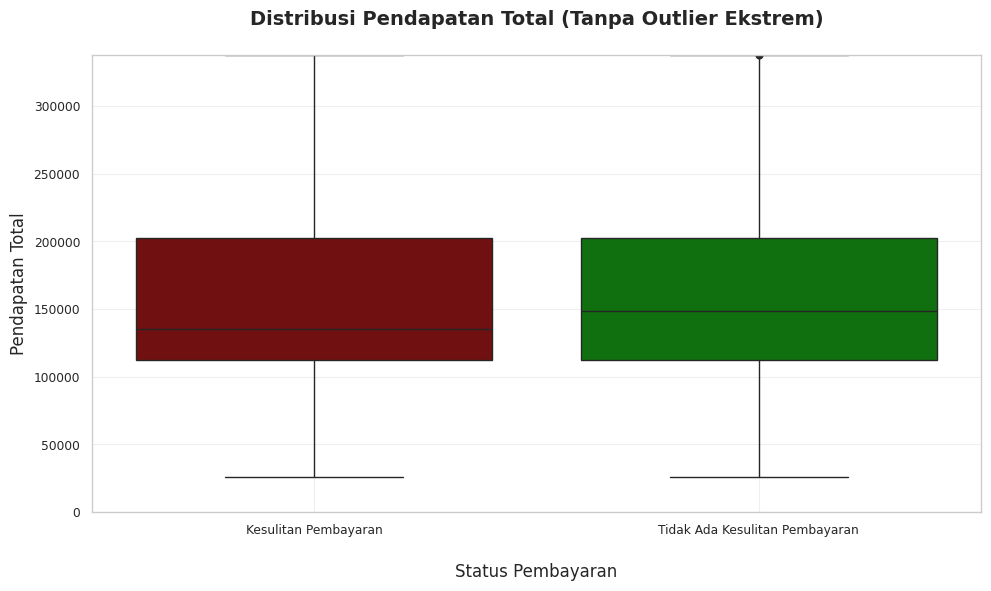

In [38]:
# Boxplot untuk melihat distribusi pendapatan berdasarkan target
plt.figure(figsize=(10, 6))

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat boxplot dengan palette khusus
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette=custom_palette)
plt.title('Distribusi Pendapatan Total Berdasarkan Kemampuan Pembayaran\n', fontweight='bold', fontsize=14)
plt.xlabel('\nStatus Pembayaran', fontsize=12)
plt.ylabel('Pendapatan Total', fontsize=12)
plt.grid(alpha=0.3)

# Format tambahan untuk meningkatkan keterbacaan
plt.tight_layout()

# Menambahkan anotasi statistik deskriptif
stats = train.groupby('TARGET')['AMT_INCOME_TOTAL'].describe()
print("Statistik Deskriptif Pendapatan Total:")
print(stats)

# Karena data pendapatan mungkin memiliki outlier ekstrem, kita bisa menambahkan versi dengan skala y yang dibatasi
# untuk melihat distribusi yang lebih jelas (opsional)
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette=custom_palette)
plt.title('Distribusi Pendapatan Total (Tanpa Outlier Ekstrem)\n', fontweight='bold', fontsize=14)
plt.xlabel('\nStatus Pembayaran', fontsize=12)
plt.ylabel('Pendapatan Total', fontsize=12)
plt.ylim(0, train['AMT_INCOME_TOTAL'].quantile(0.95))  # Batasi hingga 95th percentile
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

Penjelasan hasil:

Dapat dilihat bahwa baik klien yang memiliki kesulitan pembayaran maupun klien yang tidak memiliki kesulitan pembayaran, sebagian besar memiliki nilai yang sama.

Namun, seiring dengan meningkatnya pendapatan klien, probabilitas bahwa klien tidak akan mengalami kesulitan membayar pinjaman juga meningkat.

##### ANALISIS 15: Usia vs Target

Analisis distribusi usia klien.

In [39]:
# Mengkonversi hari menjadi tahun untuk usia
no_age = application_train[application_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = application_train[application_train['TARGET']==1]['DAYS_BIRTH'].values/-365

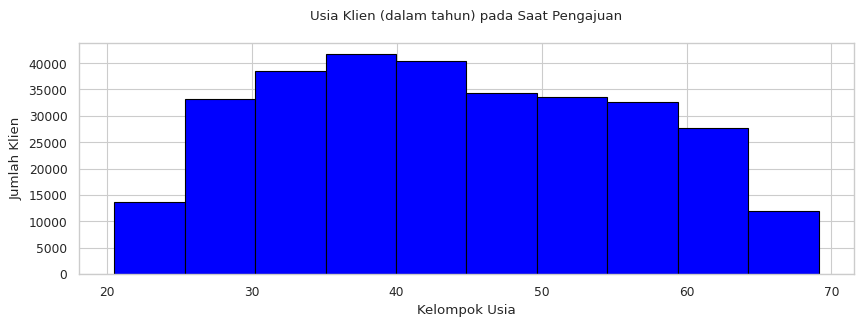

In [40]:
# Visualisasi distribusi usia semua klien
plt.figure(figsize=(10,3))
plt.hist(application_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='blue')
plt.title('Usia Klien (dalam tahun) pada Saat Pengajuan\n')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Klien')
plt.show()

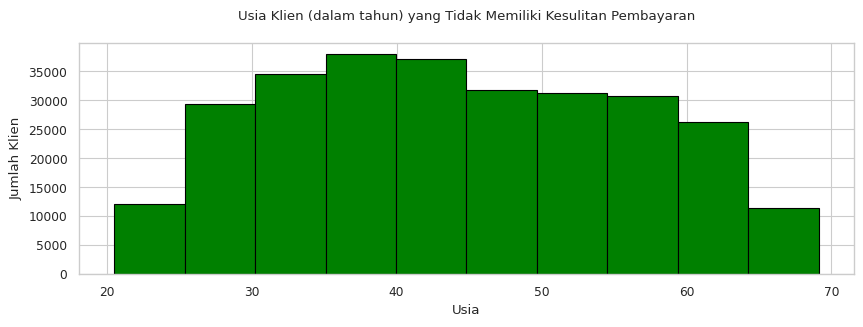

In [41]:
# Visualisasi distribusi usia klien tanpa kesulitan pembayaran
plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='green')
plt.title('Usia Klien (dalam tahun) yang Tidak Memiliki Kesulitan Pembayaran\n')
plt.xlabel('Usia')
plt.ylabel('Jumlah Klien')
plt.show()

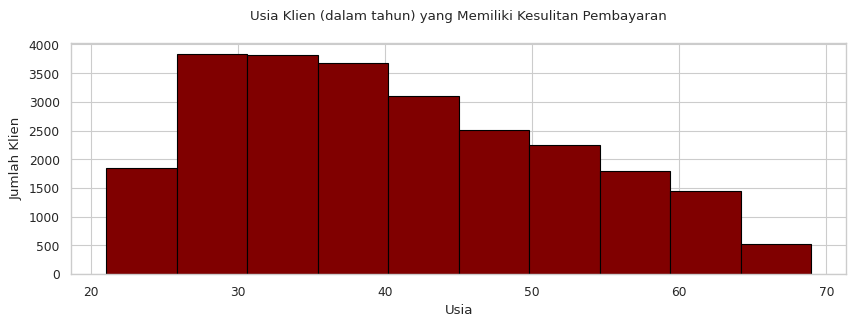

In [42]:
# Visualisasi distribusi usia klien dengan kesulitan pembayaran
plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Usia Klien (dalam tahun) yang Memiliki Kesulitan Pembayaran\n')
plt.xlabel('Usia')
plt.ylabel('Jumlah Klien')
plt.show()

Penjelasan hasil:

Sebagian besar klien yang mengajukan pinjaman berada dalam rentang 35-40 tahun, diikuti oleh klien dalam rentang 40-45 tahun.

Klien yang tidak memiliki kesulitan pembayaran adalah klien dengan rentang usia 35-45 tahun.

Sementara itu, klien yang memiliki kesulitan pembayaran adalah klien dengan rentang usia 25-35 tahun.

#### Analisis Multivariat

##### ANALISIS 16: Analisis hubungan multiple fitur dengan target

Mengelompokkan berdasarkan Status Kepemilikan Properti.

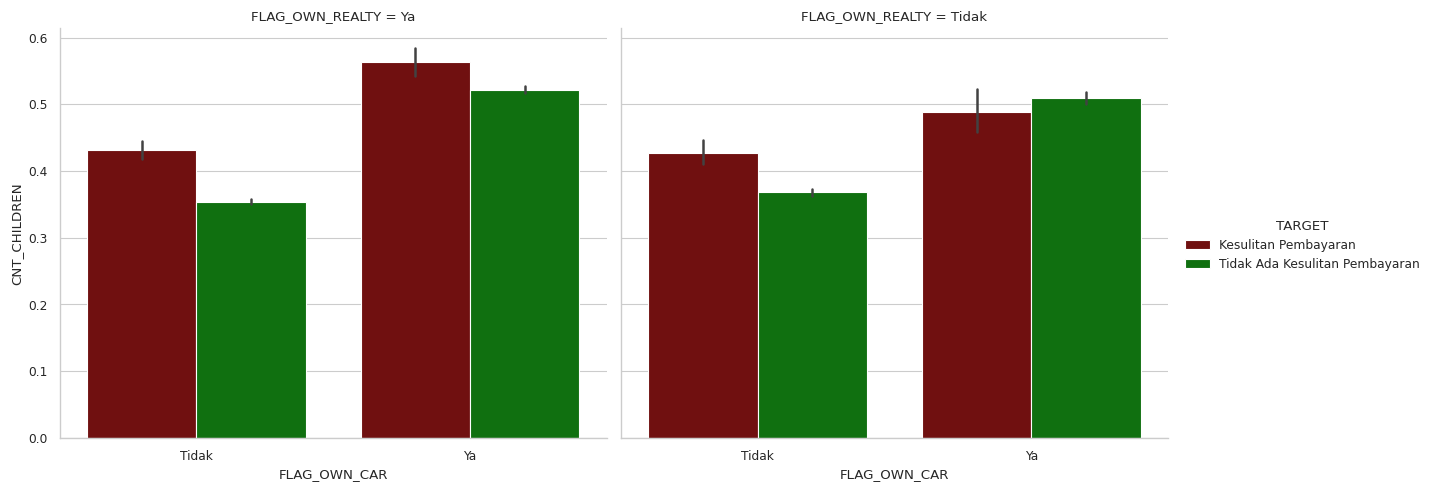

In [43]:
# Plot 1: Hubungan antara Kepemilikan Mobil, Jumlah Anak, Target, dan Kepemilikan Properti

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat catplot dengan palette khusus
sns.catplot(x='FLAG_OWN_CAR',
                y='CNT_CHILDREN',
                hue='TARGET',
                col='FLAG_OWN_REALTY',
                kind='bar',
                palette=custom_palette,
                data=train,
                aspect=1.2,  # Rasio lebar-tinggi
                legend_out=True)  # Pastikan legenda di luar plot

plt.show()

Penjelasan hasil:

Klien yang memiliki mobil dan rumah/apartemen memiliki masalah dalam membayar pinjaman untuk jumlah anak yang tinggi dibandingkan dengan klien yang tidak memiliki rumah/apartemen.

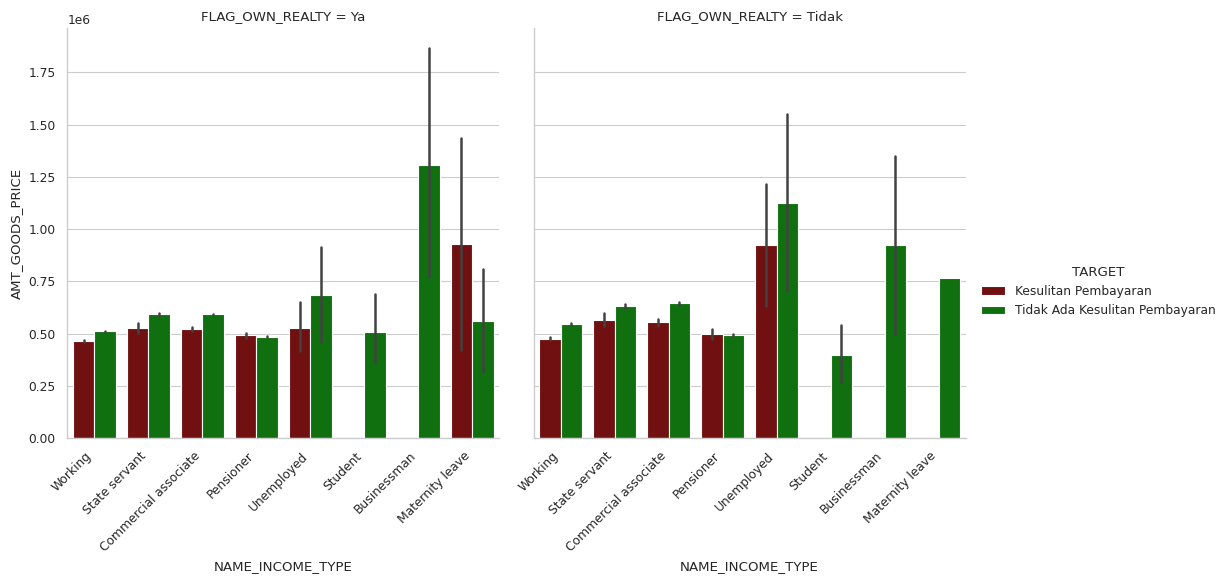

In [44]:
# Plot 2: Hubungan antara Tipe Pendapatan, Harga Barang, Target, dan Kepemilikan Properti

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat catplot dengan palette khusus
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar',
            palette = custom_palette,
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Penjelasan hasil:

Klien dengan tipe pendapatan cuti hamil yang memiliki rumah/apartemen (`FLAG_OWN_REALTY = Ya`) memiliki masalah dalam membayar pinjaman, dibandingkan dengan yang tidak memiliki rumah/apartemen (`FLAG_OWN_REALTY = Tidak`).

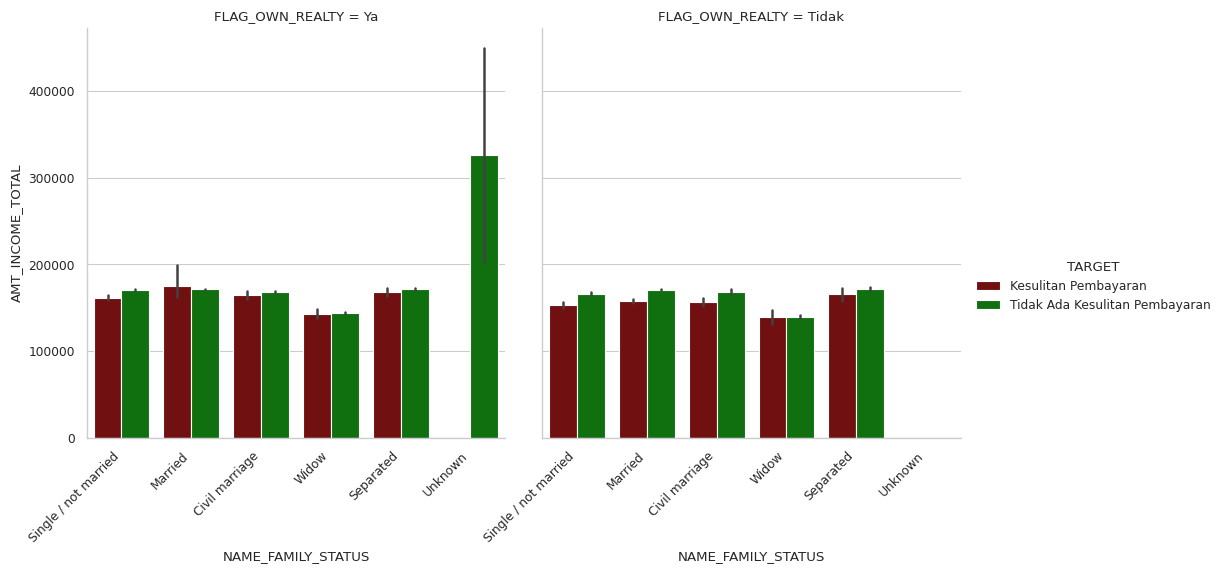

In [45]:
# Plot 3: Hubungan antara Status Keluarga, Jumlah Pendapatan, Target, dan Kepemilikan Properti

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat catplot dengan palette khusus
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar',
            palette = custom_palette,
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Penjelasan hasil:

Klien yang menikah dan memiliki rumah/apartemen (`FLAG_OWN_REALTY = Ya`) memiliki masalah dalam membayar pinjaman untuk jumlah pendapatan menengah, dibandingkan ketika klien tidak memiliki rumah/apartemen (`FLAG_OWN_REALTY = Tidak`).

##### ANALISIS 17: Analisis dikelompokkan berdasarkan Status Kepemilikan Mobil

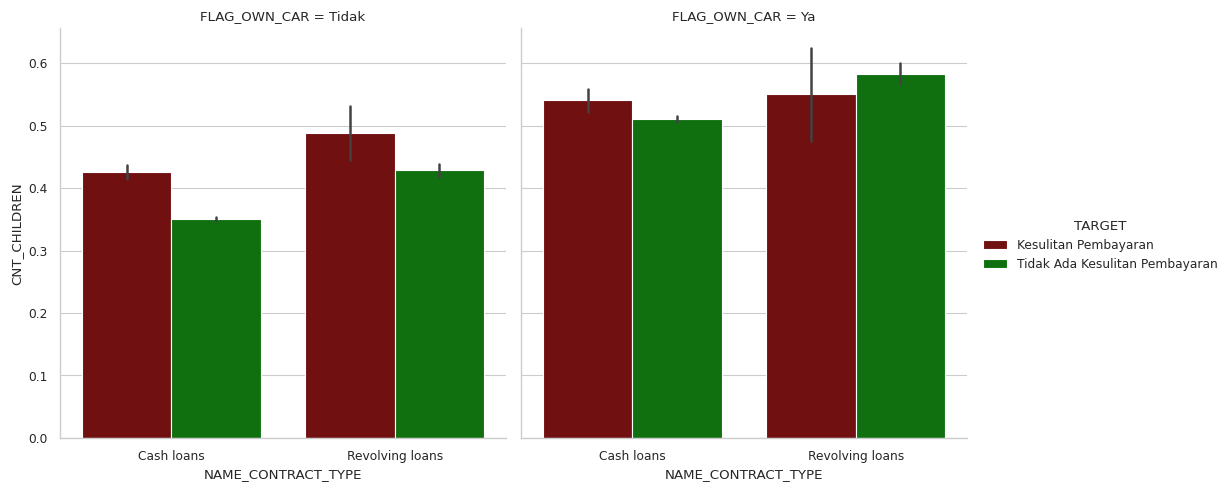

In [46]:
# Plot 4: Hubungan antara Tipe Kontrak, Jumlah Anak, Target, dan Kepemilikan Mobil

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat catplot dengan palette khusus
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_CAR',
            kind = 'bar',
            palette = custom_palette,
            data = train)
plt.show()

Penjelasan hasil:

Pada pinjaman berputar yang tidak memiliki mobil (`FLAG_OWN_CAR = Tidak`) memiliki masalah dalam membayar pinjaman, dibandingkan dengan yang memiliki mobil (`FLAG_OWN_CAR = Ya`).

##### ANALISIS 18: Analisis dikelompokkan berdasarkan Tipe Kontrak

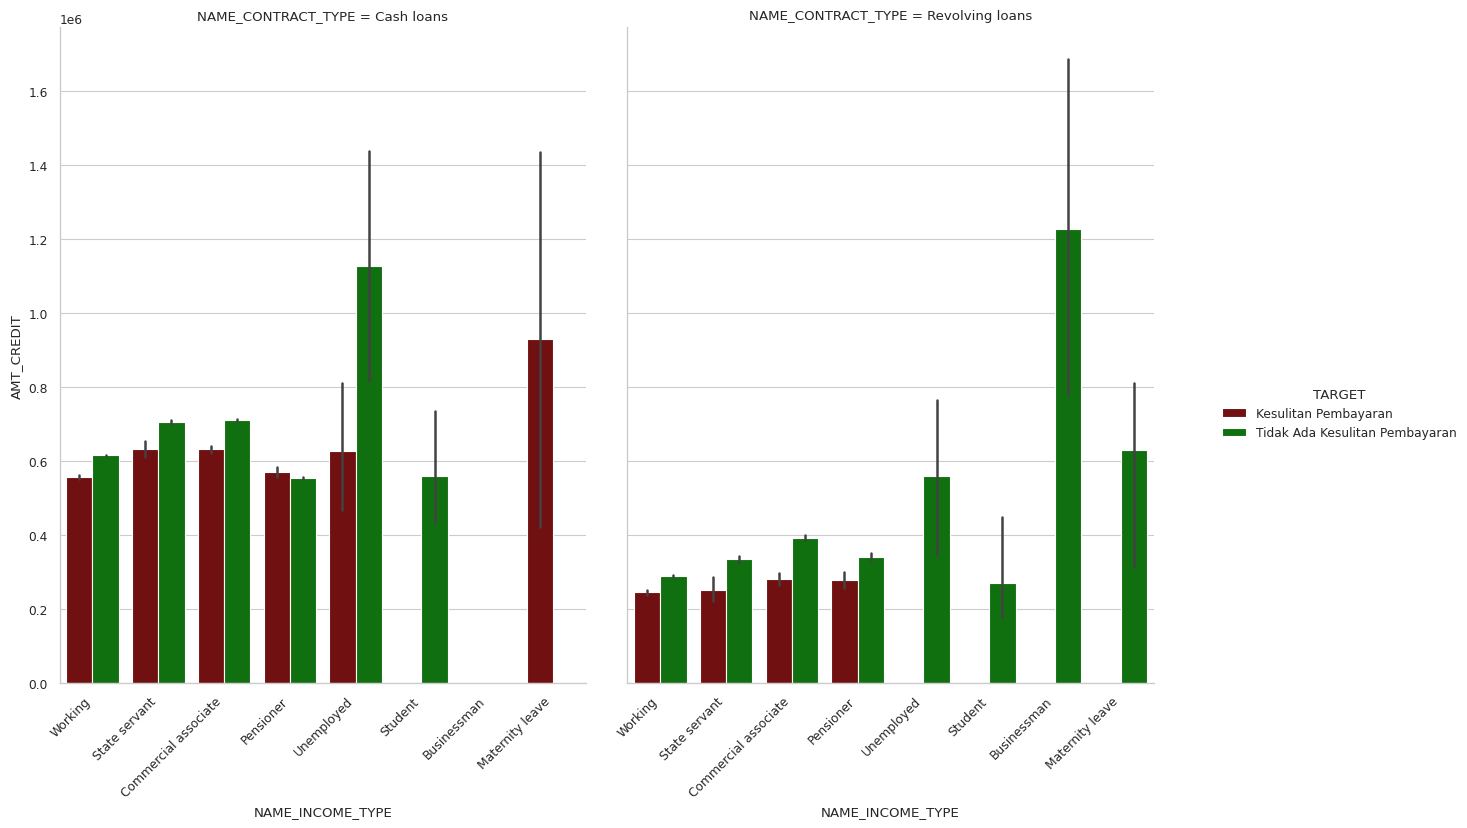

In [47]:
# Plot 5: Hubungan antara Tipe Pendapatan, Jumlah Kredit, Target, dan Tipe Kontrak

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat catplot dengan palette khusus
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'NAME_CONTRACT_TYPE',
            kind = 'bar',
            palette = custom_palette,
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Penjelasan hasil:

Pada tipe pendapatan cuti hamil klien dengan pinjaman tunai, semua klien memiliki masalah dalam membayar pinjaman untuk jumlah kredit menengah. Sementara semua klien dengan cuti hamil dan pinjaman berputar tidak memiliki kesulitan membayar pinjaman.

Pada klien pengangguran dengan pinjaman tunai, lebih dari 50% klien memiliki masalah dalam membayar pinjaman dengan jumlah kredit menengah. Sementara semua klien pengangguran dengan pinjaman berputar tidak memiliki kesulitan membayar pinjaman.

##### ANALISIS 19: Analisis dikelompokkan berdasarkan Peringkat Wilayah

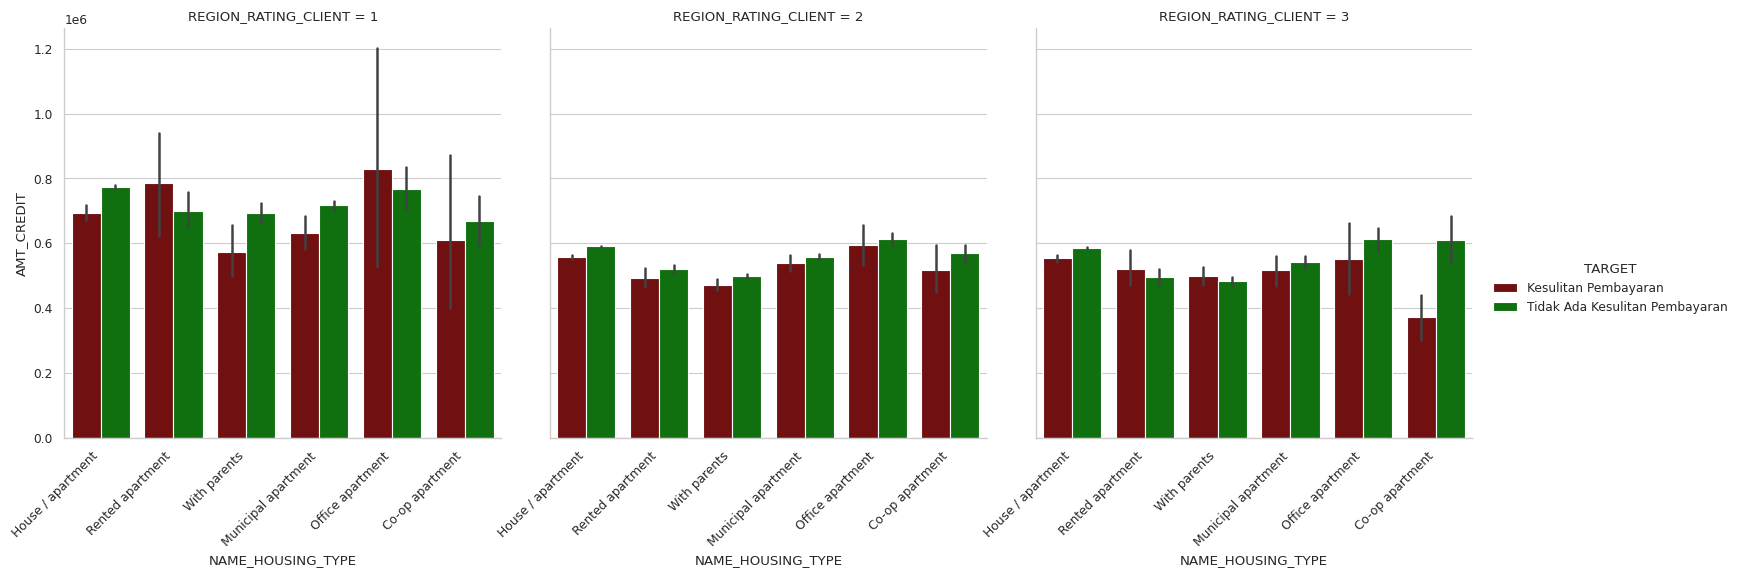

In [48]:
# Plot 6: Hubungan antara Tipe Perumahan, Jumlah Kredit Pinjaman, Target, dan Peringkat Wilayah

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat catplot dengan palette khusus
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar',
            palette = custom_palette,
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Penjelasan hasil:

Klien yang tinggal di apartemen sewa dan apartemen kantor dan wilayah mereka memiliki peringkat 1, memiliki masalah dalam membayar pinjaman dibandingkan dengan klien di wilayah dengan peringkat 2 untuk jumlah kredit pinjaman menengah.

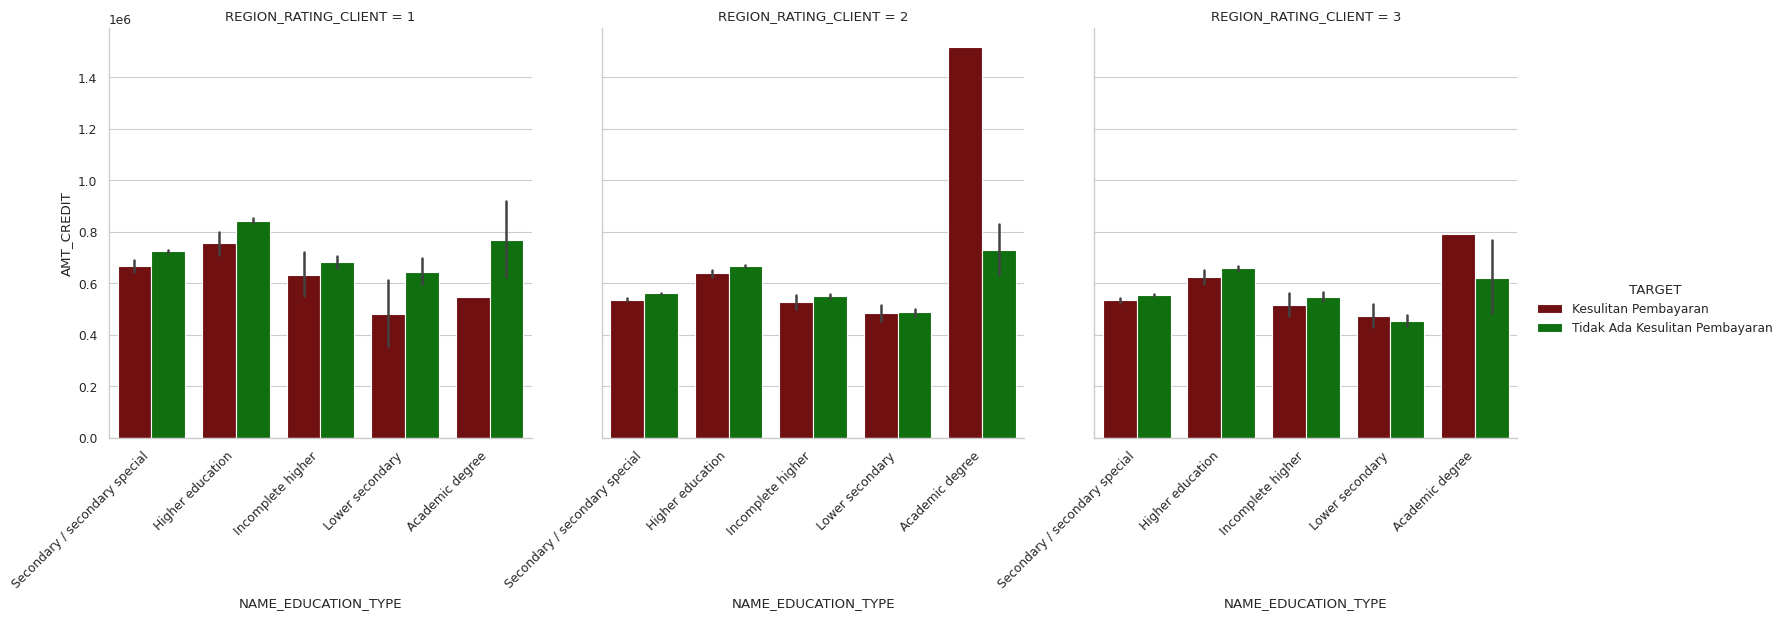

In [49]:
# Plot 7: Hubungan antara Tipe Pendidikan, Jumlah Kredit Pinjaman, Target, dan Peringkat Wilayah

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat catplot dengan palette khusus
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar',
            palette = custom_palette,
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Penjelasan hasil:

Pada klien yang memiliki gelar akademik dan tinggal di wilayah dengan peringkat 2, memiliki masalah dalam membayar pinjaman untuk jumlah kredit pinjaman yang lebih tinggi.

Pada klien dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah dalam membayar pinjaman untuk jumlah kredit pinjaman menengah.

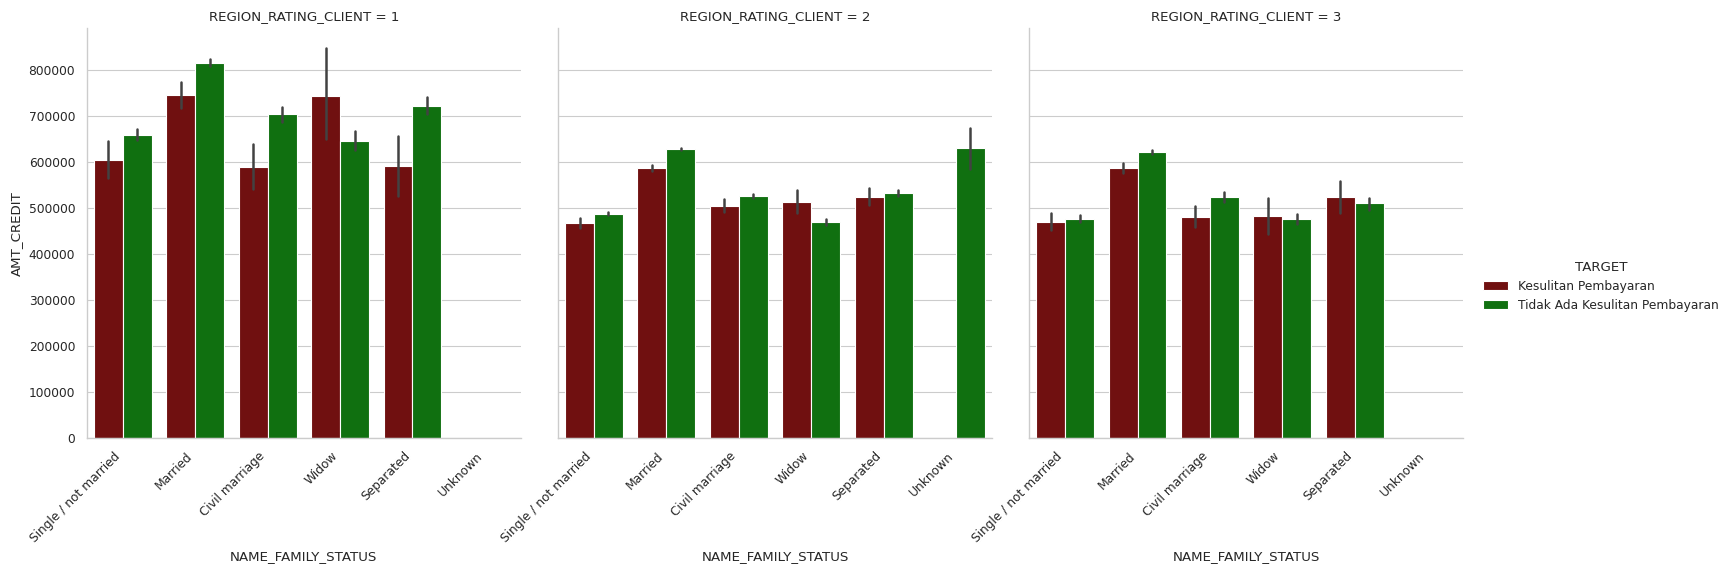

In [50]:
# Plot 8: Hubungan antara Status Keluarga, Jumlah Kredit Pinjaman, Target, dan Peringkat Wilayah

# Definisikan palette warna khusus
custom_palette = {"Tidak Ada Kesulitan Pembayaran": "green", "Kesulitan Pembayaran": "maroon"}

# Buat catplot dengan palette khusus
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar',
            palette = custom_palette,
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Penjelasan hasil:

Klien yang memiliki status keluarga sebagai janda, apakah mereka tinggal di wilayah dengan peringkat 1, 2 atau 3, memiliki masalah dalam membayar pinjaman untuk jumlah kredit pinjaman sedang hingga tinggi.

Klien yang memiliki status keluarga sebagai berpisah dan tinggal di wilayah dengan peringkat 3, memiliki masalah dalam membayar pinjaman untuk jumlah kredit pinjaman sedang dibandingkan dengan klien yang tinggal di wilayah dengan peringkat 1 atau 2.

## Pembersihan dan Persiapan Data

#### Tahap 1: Deteksi dan Penanganan Duplikasi Data

In [51]:
print('Jumlah duplikasi adalah:', application_train.duplicated().sum())


Jumlah duplikasi adalah: 0


#### Tahap 2: Deteksi dan Penanganan Nilai yang Hilang

In [52]:
# Memeriksa status nilai yang hilang
print('Status nilai yang hilang:', application_train.isnull().values.any())
nvc = pd.DataFrame(application_train.isnull().sum(), columns=['Total Nilai Null'])
nvc['Persentase'] = (nvc['Total Nilai Null']/application_train.shape[0])*100
nvc.sort_values(by=['Persentase'], ascending=False).reset_index()

Status nilai yang hilang: True


,index,Total Nilai Null,Persentase
0,COMMONAREA_AVG,214865,69.872297
1,COMMONAREA_MODE,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_AVG,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_AVG,210199,68.354953
8,LIVINGAPARTMENTS_MEDI,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


In [53]:
# STRATEGI: Menghapus fitur dengan >50% nilai hilang untuk mengurangi dimensi
application_train.drop(application_train.iloc[:, 44:91], inplace=True, axis=1)
application_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [54]:
# Memeriksa kembali status nilai yang hilang setelah penghapusan
print('Status nilai yang hilang setelah penghapusan fitur:', application_train.isnull().values.any())
nvc = pd.DataFrame(application_train.isnull().sum().sort_values(), columns=['Total Nilai Null'])
nvc['Persentase'] = (nvc['Total Nilai Null']/application_train.shape[0])*100
nvc.sort_values(by=['Persentase'], ascending=False).reset_index()

Status nilai yang hilang setelah penghapusan fitur: True


,index,Total Nilai Null,Persentase
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021


ANALISIS DISTRIBUSI: Memeriksa distribusi fitur numerik yang memiliki nilai hilang.

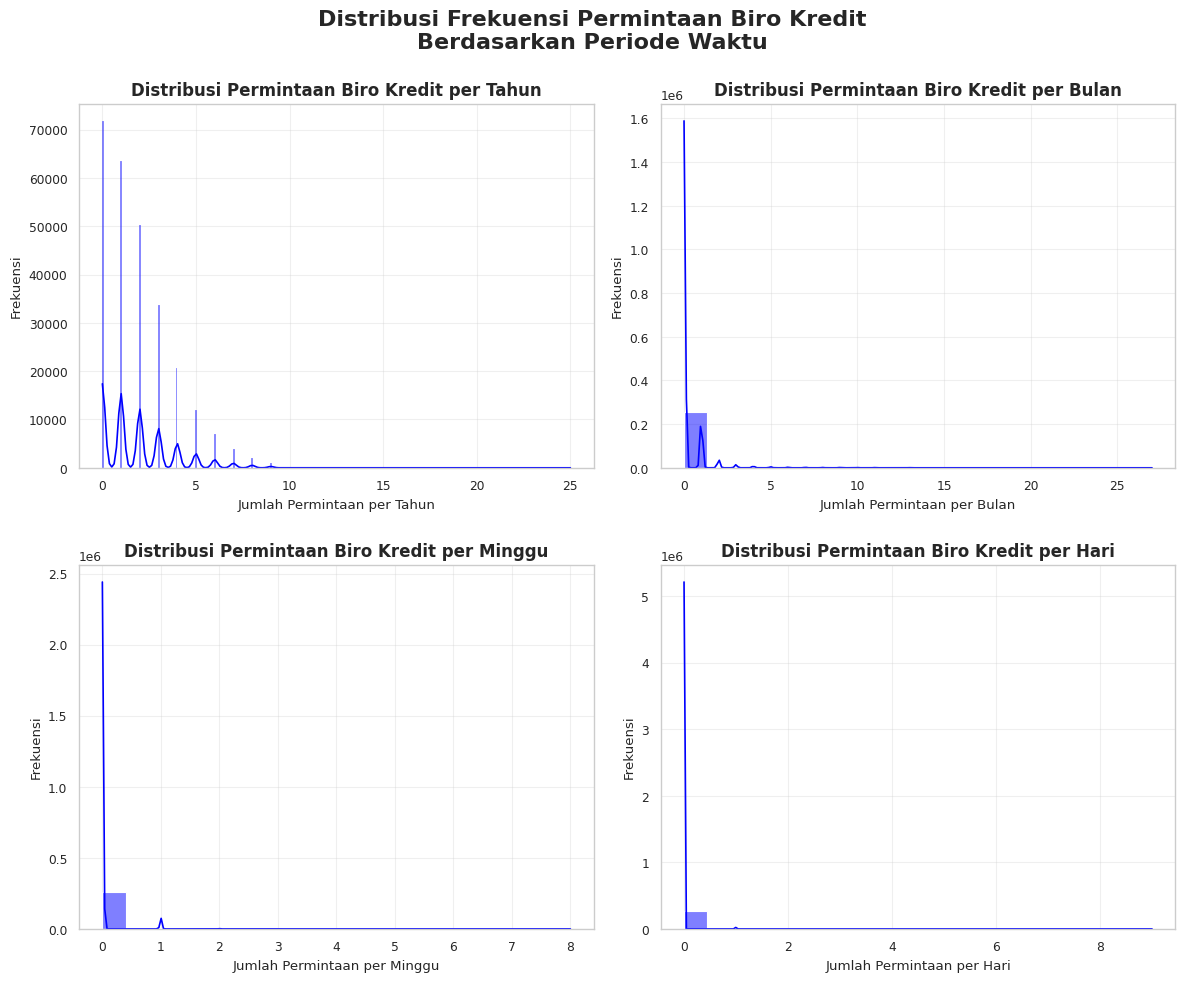

In [55]:
# Bagian 1: Fitur terkait permintaan biro kredit
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.set_context('paper', font_scale=1.2)

# Plot 1: Permintaan biro kredit per tahun
sns.histplot(application_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0,0], kde=True, color='blue')
ax[0,0].set_title('Distribusi Permintaan Biro Kredit per Tahun', fontsize=12, fontweight='bold')
ax[0,0].set_xlabel('Jumlah Permintaan per Tahun')
ax[0,0].set_ylabel('Frekuensi')
ax[0,0].grid(alpha=0.3)

# Plot 2: Permintaan biro kredit per bulan
sns.histplot(application_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0,1], kde=True, color='blue')
ax[0,1].set_title('Distribusi Permintaan Biro Kredit per Bulan', fontsize=12, fontweight='bold')
ax[0,1].set_xlabel('Jumlah Permintaan per Bulan')
ax[0,1].set_ylabel('Frekuensi')
ax[0,1].grid(alpha=0.3)

# Plot 3: Permintaan biro kredit per minggu
sns.histplot(application_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1,0], kde=True, color='blue')
ax[1,0].set_title('Distribusi Permintaan Biro Kredit per Minggu', fontsize=12, fontweight='bold')
ax[1,0].set_xlabel('Jumlah Permintaan per Minggu')
ax[1,0].set_ylabel('Frekuensi')
ax[1,0].grid(alpha=0.3)

# Plot 4: Permintaan biro kredit per hari
sns.histplot(application_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1,1], kde=True, color='blue')
ax[1,1].set_title('Distribusi Permintaan Biro Kredit per Hari', fontsize=12, fontweight='bold')
ax[1,1].set_xlabel('Jumlah Permintaan per Hari')
ax[1,1].set_ylabel('Frekuensi')
ax[1,1].grid(alpha=0.3)

# Judul utama untuk seluruh figure
fig.suptitle('Distribusi Frekuensi Permintaan Biro Kredit\nBerdasarkan Periode Waktu',
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

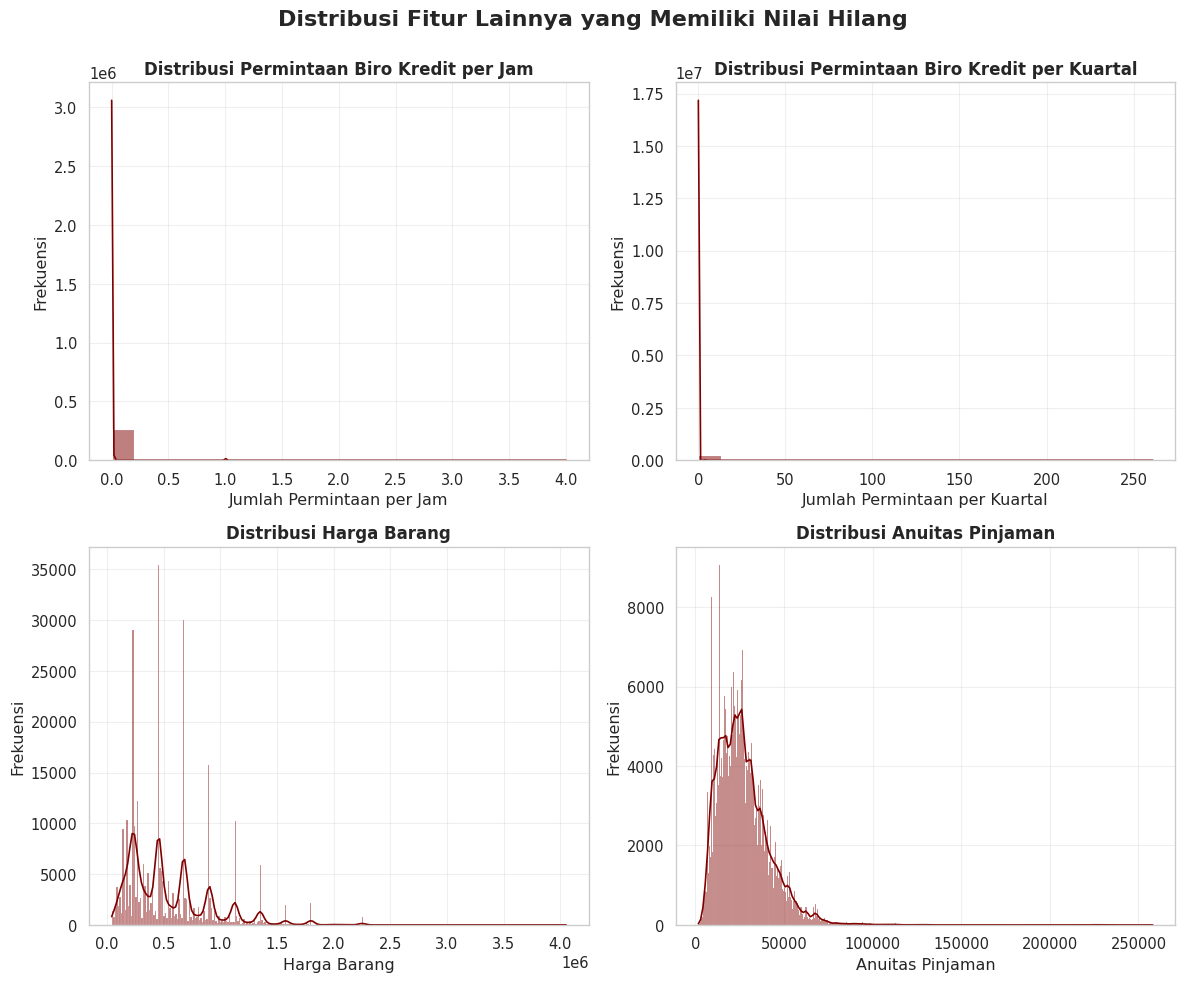


Informasi Nilai Hilang:
                            Jumlah_Nilai_Hilang  Persentase_Nilai_Hilang
AMT_REQ_CREDIT_BUREAU_HOUR                41519                    13.50
AMT_REQ_CREDIT_BUREAU_QRT                 41519                    13.50
AMT_GOODS_PRICE                             278                     0.09
AMT_ANNUITY                                  12                     0.00


In [56]:
# Bagian 2: Fitur lainnya yang memiliki nilai hilang
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.set_context('paper', font_scale=1.2)

# Plot 1: Permintaan biro kredit per jam
sns.histplot(application_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0,0], kde=True, color='maroon')
ax[0,0].set_title('Distribusi Permintaan Biro Kredit per Jam', fontsize=12, fontweight='bold')
ax[0,0].set_xlabel('Jumlah Permintaan per Jam')
ax[0,0].set_ylabel('Frekuensi')
ax[0,0].grid(alpha=0.3)

# Plot 2: Permintaan biro kredit per kuartal
sns.histplot(application_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0,1], kde=True, color='maroon')
ax[0,1].set_title('Distribusi Permintaan Biro Kredit per Kuartal', fontsize=12, fontweight='bold')
ax[0,1].set_xlabel('Jumlah Permintaan per Kuartal')
ax[0,1].set_ylabel('Frekuensi')
ax[0,1].grid(alpha=0.3)

# Plot 3: Harga barang
sns.histplot(application_train['AMT_GOODS_PRICE'], ax=ax[1,0], kde=True, color='maroon')
ax[1,0].set_title('Distribusi Harga Barang', fontsize=12, fontweight='bold')
ax[1,0].set_xlabel('Harga Barang')
ax[1,0].set_ylabel('Frekuensi')
ax[1,0].grid(alpha=0.3)

# Plot 4: Anuitas pinjaman
sns.histplot(application_train['AMT_ANNUITY'], ax=ax[1,1], kde=True, color='maroon')
ax[1,1].set_title('Distribusi Anuitas Pinjaman', fontsize=12, fontweight='bold')
ax[1,1].set_xlabel('Anuitas Pinjaman')
ax[1,1].set_ylabel('Frekuensi')
ax[1,1].grid(alpha=0.3)

# Judul utama untuk seluruh figure
fig.suptitle('Distribusi Fitur Lainnya yang Memiliki Nilai Hilang',
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Menampilkan informasi tentang nilai yang hilang
print("\nInformasi Nilai Hilang:")
missing_info = application_train[['AMT_REQ_CREDIT_BUREAU_HOUR',
                                 'AMT_REQ_CREDIT_BUREAU_QRT',
                                 'AMT_GOODS_PRICE',
                                 'AMT_ANNUITY']].isnull().sum()
missing_percentage = (missing_info / len(application_train)) * 100
missing_df = pd.DataFrame({
    'Jumlah_Nilai_Hilang': missing_info,
    'Persentase_Nilai_Hilang': missing_percentage.round(2)
})
print(missing_df)

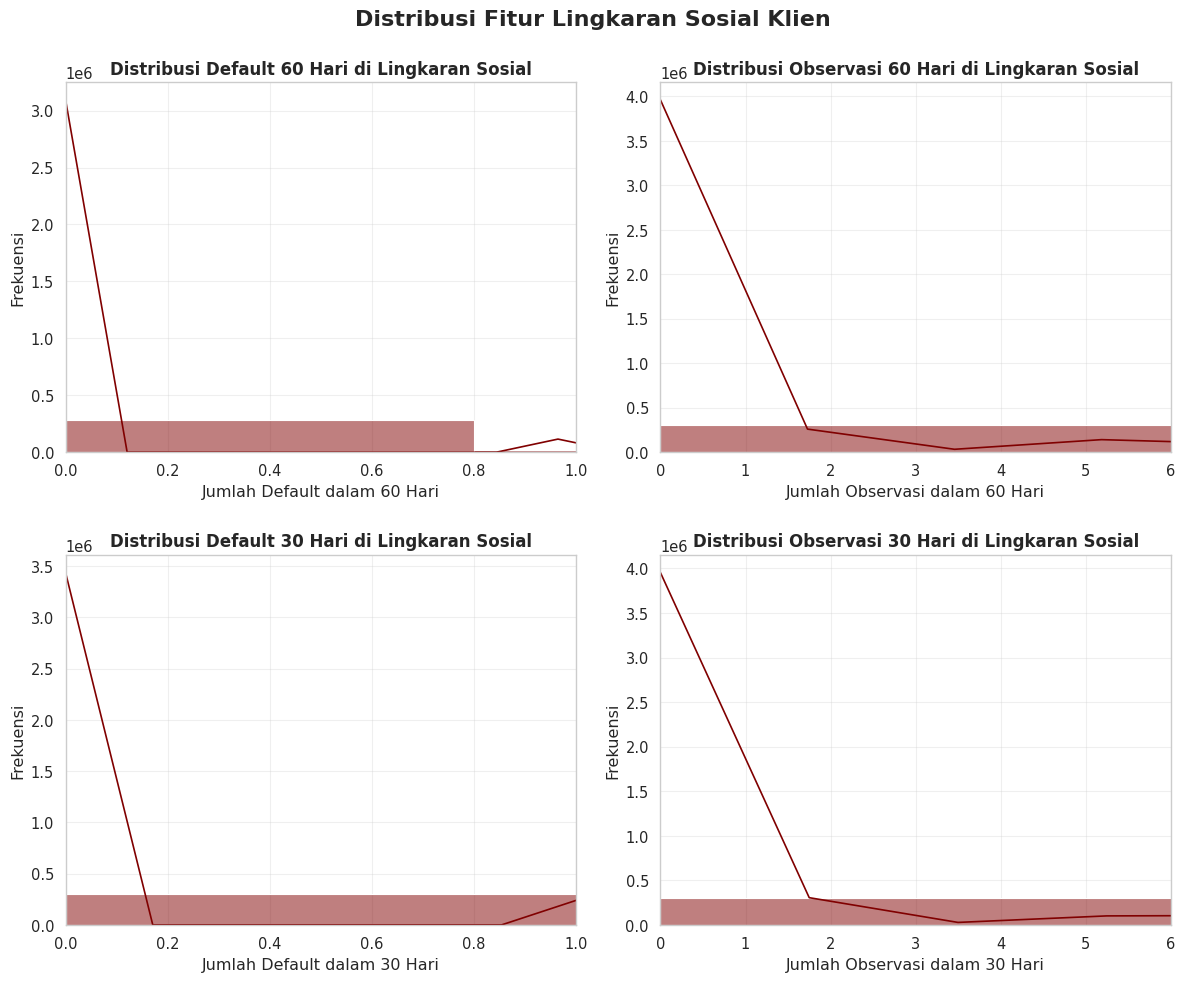


Informasi Nilai Hilang Fitur Lingkaran Sosial:
                          Jumlah_Nilai_Hilang  Persentase_Nilai_Hilang
DEF_60_CNT_SOCIAL_CIRCLE                 1021                     0.33
OBS_60_CNT_SOCIAL_CIRCLE                 1021                     0.33
DEF_30_CNT_SOCIAL_CIRCLE                 1021                     0.33
OBS_30_CNT_SOCIAL_CIRCLE                 1021                     0.33

Korelasi dengan Target:
DEF_60_CNT_SOCIAL_CIRCLE    0.0313
OBS_60_CNT_SOCIAL_CIRCLE    0.0090
DEF_30_CNT_SOCIAL_CIRCLE    0.0322
OBS_30_CNT_SOCIAL_CIRCLE    0.0091
Name: TARGET, dtype: float64


In [57]:
# Bagian 3: Fitur lingkaran sosial
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.set_context('paper', font_scale=1.2)

# Plot 1: Default dalam 60 hari di lingkaran sosial
sns.histplot(application_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0,0], kde=True, color='maroon', bins=30)
ax[0,0].set_title('Distribusi Default 60 Hari di Lingkaran Sosial', fontsize=12, fontweight='bold')
ax[0,0].set_xlabel('Jumlah Default dalam 60 Hari')
ax[0,0].set_ylabel('Frekuensi')
ax[0,0].grid(alpha=0.3)
# Batasi sumbu x untuk melihat distribusi yang lebih jelas
ax[0,0].set_xlim(0, application_train['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.95))

# Plot 2: Observasi dalam 60 hari di lingkaran sosial
sns.histplot(application_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0,1], kde=True, color='maroon', bins=30)
ax[0,1].set_title('Distribusi Observasi 60 Hari di Lingkaran Sosial', fontsize=12, fontweight='bold')
ax[0,1].set_xlabel('Jumlah Observasi dalam 60 Hari')
ax[0,1].set_ylabel('Frekuensi')
ax[0,1].grid(alpha=0.3)
# Batasi sumbu x untuk melihat distribusi yang lebih jelas
ax[0,1].set_xlim(0, application_train['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.95))

# Plot 3: Default dalam 30 hari di lingkaran sosial
sns.histplot(application_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1,0], kde=True, color='maroon', bins=30)
ax[1,0].set_title('Distribusi Default 30 Hari di Lingkaran Sosial', fontsize=12, fontweight='bold')
ax[1,0].set_xlabel('Jumlah Default dalam 30 Hari')
ax[1,0].set_ylabel('Frekuensi')
ax[1,0].grid(alpha=0.3)
# Batasi sumbu x untuk melihat distribusi yang lebih jelas
ax[1,0].set_xlim(0, application_train['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.95))

# Plot 4: Observasi dalam 30 hari di lingkaran sosial
sns.histplot(application_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1,1], kde=True, color='maroon', bins=30)
ax[1,1].set_title('Distribusi Observasi 30 Hari di Lingkaran Sosial', fontsize=12, fontweight='bold')
ax[1,1].set_xlabel('Jumlah Observasi dalam 30 Hari')
ax[1,1].set_ylabel('Frekuensi')
ax[1,1].grid(alpha=0.3)
# Batasi sumbu x untuk melihat distribusi yang lebih jelas
ax[1,1].set_xlim(0, application_train['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.95))

# Judul utama untuk seluruh figure
fig.suptitle('Distribusi Fitur Lingkaran Sosial Klien',
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Menampilkan informasi tentang nilai yang hilang
print("\nInformasi Nilai Hilang Fitur Lingkaran Sosial:")
missing_info_social = application_train[['DEF_60_CNT_SOCIAL_CIRCLE',
                                       'OBS_60_CNT_SOCIAL_CIRCLE',
                                       'DEF_30_CNT_SOCIAL_CIRCLE',
                                       'OBS_30_CNT_SOCIAL_CIRCLE']].isnull().sum()
missing_percentage_social = (missing_info_social / len(application_train)) * 100
missing_social_df = pd.DataFrame({
    'Jumlah_Nilai_Hilang': missing_info_social,
    'Persentase_Nilai_Hilang': missing_percentage_social.round(2)
})
print(missing_social_df)

# Analisis korelasi dengan target
print("\nKorelasi dengan Target:")
social_target_corr = application_train[['DEF_60_CNT_SOCIAL_CIRCLE',
                                       'OBS_60_CNT_SOCIAL_CIRCLE',
                                       'DEF_30_CNT_SOCIAL_CIRCLE',
                                       'OBS_30_CNT_SOCIAL_CIRCLE',
                                       'TARGET']].corr()['TARGET'].drop('TARGET')
print(social_target_corr.round(4))

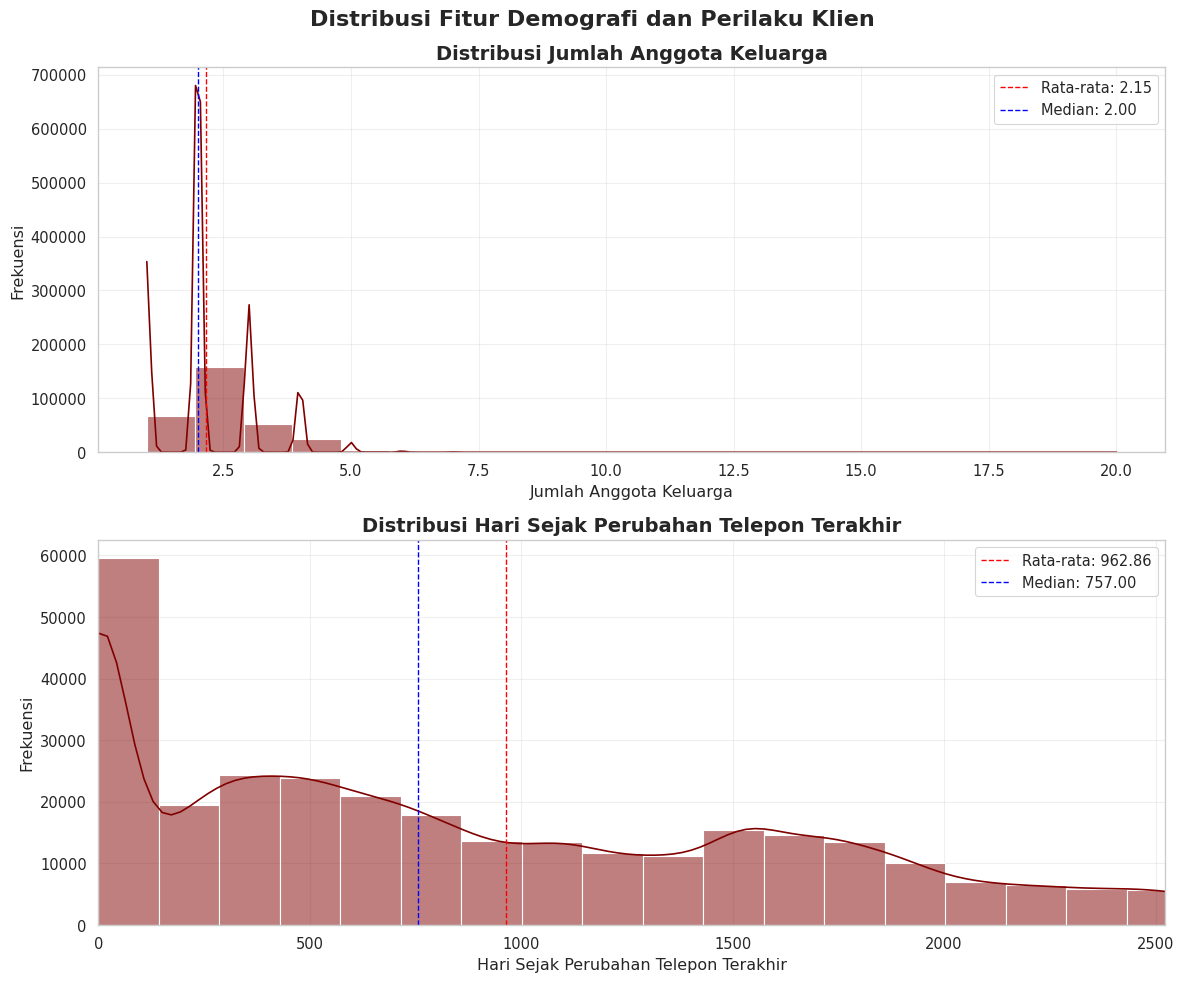

Statistik Deskriptif Fitur Lainnya:
       CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE
count    307509.000000           307510.000000
mean          2.152665             -962.858788
std           0.910682              826.808487
min           1.000000            -4292.000000
25%           2.000000            -1570.000000
50%           2.000000             -757.000000
75%           3.000000             -274.000000
max          20.000000                0.000000

Informasi Nilai Hilang:
                        Jumlah_Nilai_Hilang  Persentase_Nilai_Hilang
CNT_FAM_MEMBERS                           2                      0.0
DAYS_LAST_PHONE_CHANGE                    1                      0.0

Korelasi dengan Target:
CNT_FAM_MEMBERS           0.0093
DAYS_LAST_PHONE_CHANGE    0.0552
Name: TARGET, dtype: float64

Analisis Tambahan - Hari sejak Perubahan Telepon dalam Bulan:
count    307510.00
mean         32.10
std          27.56
min           0.00
25%           9.13
50%          25.23
75%         

In [58]:
# Bagian 4: Fitur lainnya
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.set_context('paper', font_scale=1.2)

# Plot 1: Jumlah anggota keluarga
sns.histplot(application_train['CNT_FAM_MEMBERS'], ax=ax[0], kde=True, color='maroon', bins=20)
ax[0].set_title('Distribusi Jumlah Anggota Keluarga', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Jumlah Anggota Keluarga')
ax[0].set_ylabel('Frekuensi')
ax[0].grid(alpha=0.3)
# Tambahkan garis vertikal pada nilai-nilai penting
mean_fam = application_train['CNT_FAM_MEMBERS'].mean()
median_fam = application_train['CNT_FAM_MEMBERS'].median()
ax[0].axvline(mean_fam, color='red', linestyle='--', linewidth=1, label=f'Rata-rata: {mean_fam:.2f}')
ax[0].axvline(median_fam, color='blue', linestyle='--', linewidth=1, label=f'Median: {median_fam:.2f}')
ax[0].legend()

# Plot 2: Hari sejak perubahan telepon terakhir
# Konversi nilai negatif ke positif untuk interpretasi yang lebih mudah
days_since_phone_change = application_train['DAYS_LAST_PHONE_CHANGE'].abs()

sns.histplot(days_since_phone_change, ax=ax[1], kde=True, color='maroon', bins=30)
ax[1].set_title('Distribusi Hari Sejak Perubahan Telepon Terakhir', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Hari Sejak Perubahan Telepon Terakhir')
ax[1].set_ylabel('Frekuensi')
ax[1].grid(alpha=0.3)
# Batasi sumbu x untuk melihat distribusi yang lebih jelas
ax[1].set_xlim(0, days_since_phone_change.quantile(0.95))
# Tambahkan garis vertikal pada nilai-nilai penting
mean_phone = days_since_phone_change.mean()
median_phone = days_since_phone_change.median()
ax[1].axvline(mean_phone, color='red', linestyle='--', linewidth=1, label=f'Rata-rata: {mean_phone:.2f}')
ax[1].axvline(median_phone, color='blue', linestyle='--', linewidth=1, label=f'Median: {median_phone:.2f}')
ax[1].legend()

# Judul utama untuk seluruh figure
fig.suptitle('Distribusi Fitur Demografi dan Perilaku Klien',
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Menampilkan statistik deskriptif untuk konteks tambahan
print("Statistik Deskriptif Fitur Lainnya:")
other_stats = application_train[['CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']].describe()
print(other_stats)

# Menampilkan informasi tentang nilai yang hilang
print("\nInformasi Nilai Hilang:")
missing_info_other = application_train[['CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']].isnull().sum()
missing_percentage_other = (missing_info_other / len(application_train)) * 100
missing_other_df = pd.DataFrame({
    'Jumlah_Nilai_Hilang': missing_info_other,
    'Persentase_Nilai_Hilang': missing_percentage_other.round(2)
})
print(missing_other_df)

# Analisis korelasi dengan target
print("\nKorelasi dengan Target:")
other_target_corr = application_train[['CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'TARGET']].corr()['TARGET'].drop('TARGET')
print(other_target_corr.round(4))

# Analisis tambahan: Konversi hari sejak perubahan telepon ke bulan
print("\nAnalisis Tambahan - Hari sejak Perubahan Telepon dalam Bulan:")
phone_change_months = (days_since_phone_change / 30).describe()
print(phone_change_months.round(2))

Insight tambahan dari analisis:

1. Jumlah Anggota Keluarga

- Rata-rata klien memiliki 2-3 anggota keluarga

- Distribusi menunjukkan sebagian besar klien memiliki keluarga kecil

2. Hari sejak Perubahan Telepon

- Setelah dikonversi ke nilai positif, rata-rata klien mengganti telepon sekitar 962 hari yang lalu (±2.6 tahun)

- Dalam satuan bulan, rata-rata sekitar 32 bulan sejak perubahan telepon terakhir

- Korelasi positif dengan target (0.0552) menunjukkan bahwa klien yang lebih lama tidak mengganti telepon mungkin memiliki risiko default sedikit lebih tinggi

STRATEGI IMPUTASI:
- Untuk fitur numerik: imputasi dengan median (karena data sebagian besar miring)
- Untuk fitur kategorikal: imputasi dengan modus

In [59]:
category_columns = application_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = application_train.select_dtypes(include=['int64','float64']).columns.tolist()

In [60]:
# Melakukan imputasi untuk setiap kolom
for column in application_train:
    if application_train[column].isnull().any():
        if(column in category_columns):
            application_train[column]=application_train[column].fillna(application_train[column].mode()[0])
        else:
            application_train[column]=application_train[column].fillna(application_train[column].median())

#### Tahap 3: Deteksi dan Analisis Outlier

ANALISIS OUTLIER: Memeriksa outlier untuk fitur numerik utama

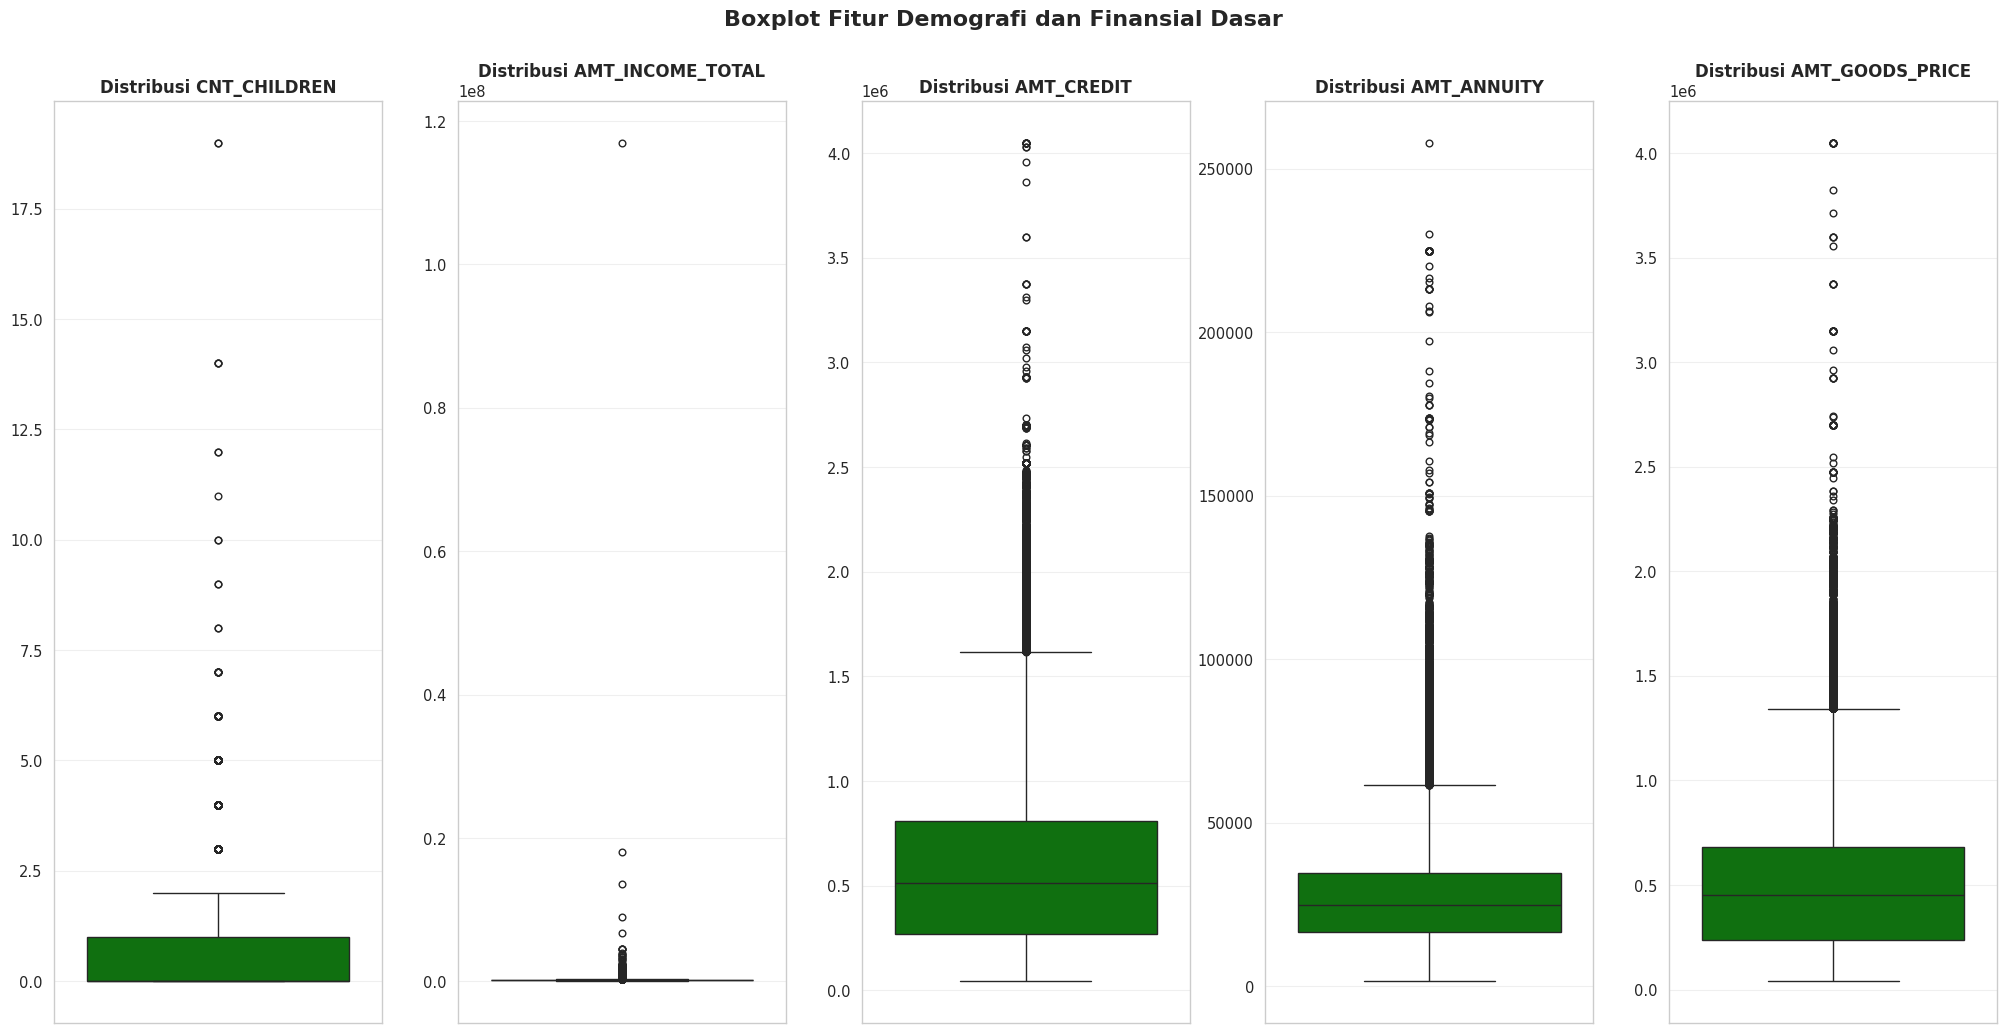

Statistik Deskriptif Fitur Demografi dan Finansial Dasar:
        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.487841   
std         0.722121      2.371231e+05  4.024908e+05   14493.461065   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  
count     3.075110e+05  
mean      5.383163e+05  
std       3.692890e+05  
min       4.050000e+04  
25%       2.385000e+05  
50%       4.500000e+05  
75%       6.795000e+05  
max       4.050000e+06  

Analisis Outlier (Nilai di Atas Q3 + 1.5*IQR):
CNT_CHILDREN:
  - Batas atas 

In [61]:
# Bagian 1: Fitur demografi dan finansial dasar
int_features = application_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()

# Definisikan warna biru yang akan digunakan
blue_color = 'green'

for k, v in int_features.items():
    # Buat boxplot dengan warna biru
    sns.boxplot(y=k, data=int_features, ax=axs[index], color=blue_color)

    # Atur judul dan label
    axs[index].set_title(f'Distribusi {k}', fontweight='bold', fontsize=12)
    axs[index].set_ylabel('')

    # Tambahkan grid untuk memudahkan pembacaan
    axs[index].grid(axis='y', alpha=0.3)

    # Rotasi label x jika diperlukan
    axs[index].tick_params(axis='x', rotation=45)

    index += 1
    if index == 5:
        break

# Judul utama untuk seluruh figure
plt.suptitle('Boxplot Fitur Demografi dan Finansial Dasar',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Menampilkan statistik deskriptif untuk konteks tambahan
print("Statistik Deskriptif Fitur Demografi dan Finansial Dasar:")
print(int_features.describe())

# Analisis outlier
print("\nAnalisis Outlier (Nilai di Atas Q3 + 1.5*IQR):")
for column in int_features.columns:
    Q1 = int_features[column].quantile(0.25)
    Q3 = int_features[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    outliers = int_features[int_features[column] > upper_bound][column]

    print(f"{column}:")
    print(f"  - Batas atas outlier: {upper_bound:,.2f}")
    print(f"  - Jumlah outlier: {len(outliers)}")
    print(f"  - Persentase outlier: {(len(outliers)/len(int_features)*100):.2f}%")
    if len(outliers) > 0:
        print(f"  - Nilai maksimum: {int_features[column].max():,.2f}")
    print()

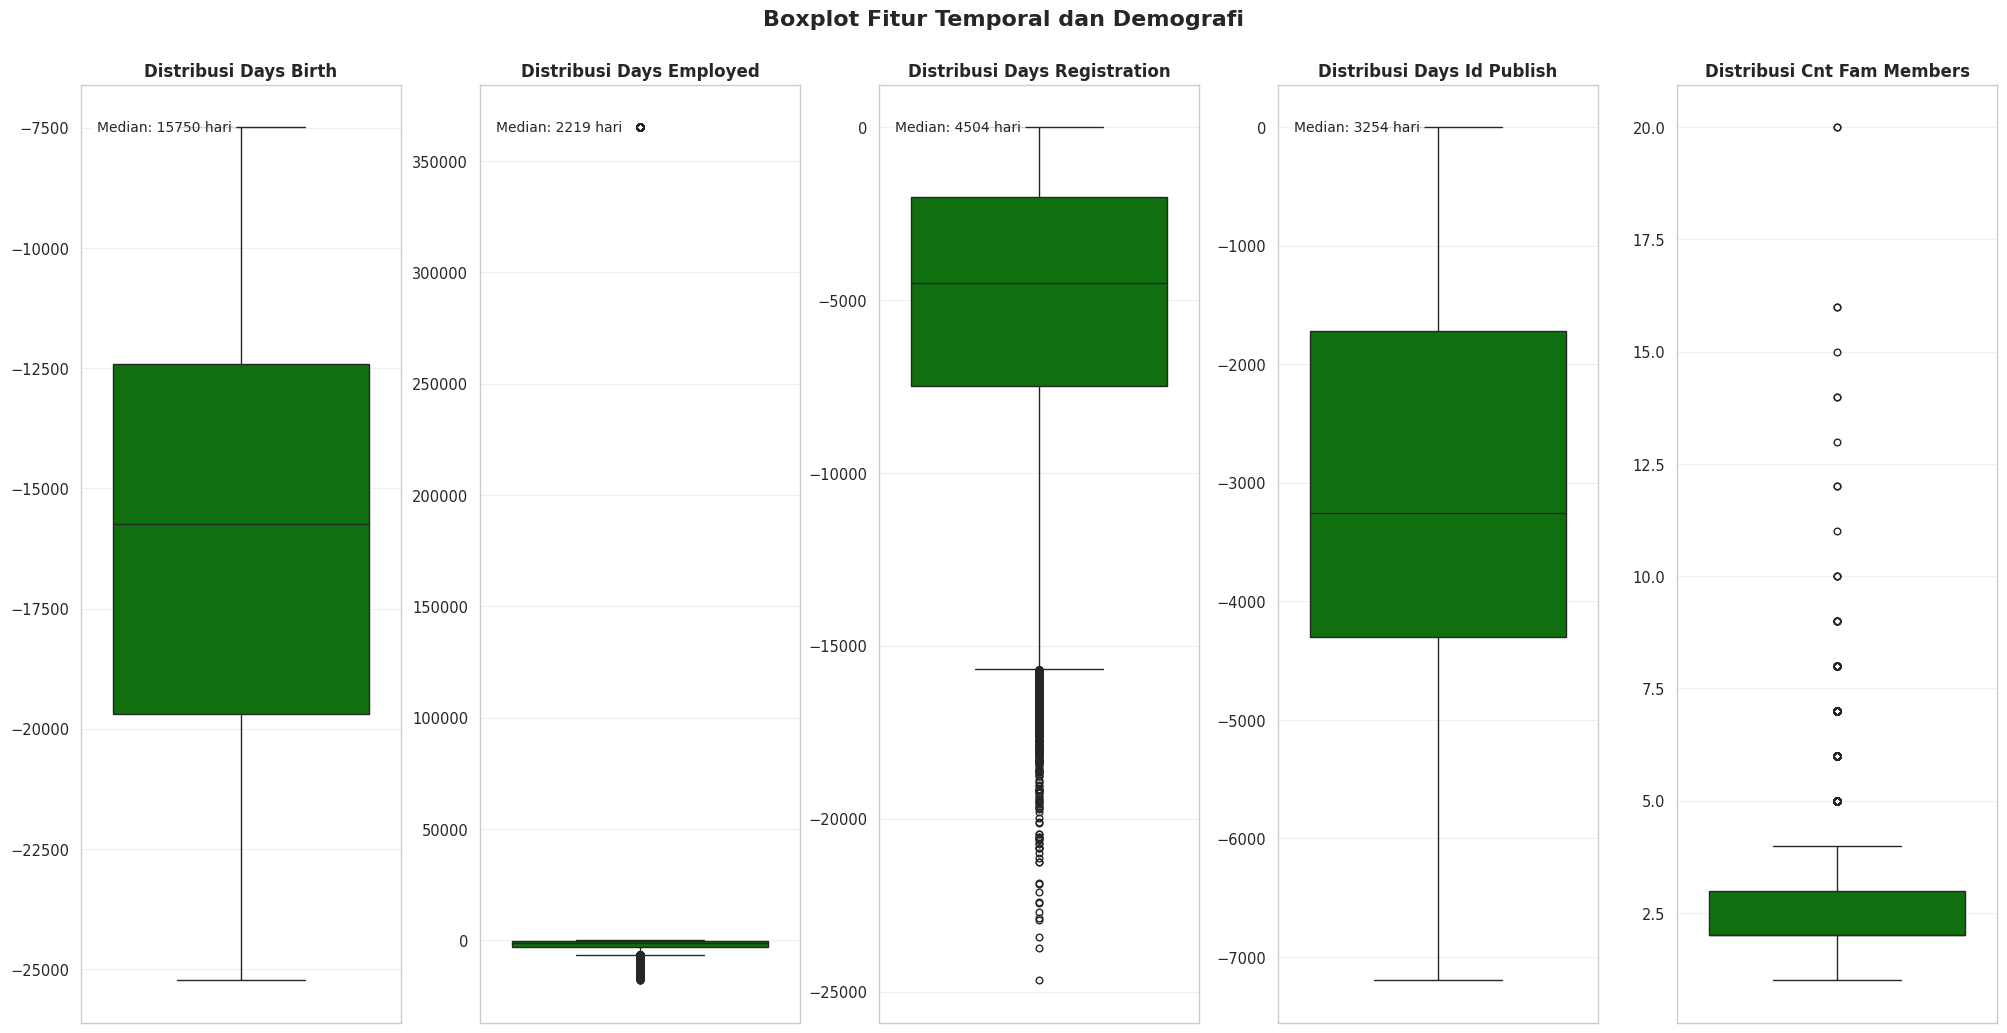

Statistik Deskriptif Fitur Temporal (dalam nilai absolut):
          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       CNT_FAM_MEMBERS  
count    307511.000000  
mean          2.152664  
std           0.910679  
min           1.000000  
25%           2.000000  
50%           2.000000  
75%           3.000000  
max          20.000000  

Analisis Outlier (Nilai di Atas Q3 + 1.

In [62]:
# Bagian 2: Fitur temporal
int_features = application_train[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()

# Definisikan warna biru yang akan digunakan
blue_color = 'green'

for k, v in int_features.items():
    # Buat boxplot dengan warna biru
    sns.boxplot(y=k, data=int_features, ax=axs[index], color=blue_color)

    # Atur judul dan label
    feature_name = k.replace('_', ' ').title()
    axs[index].set_title(f'Distribusi {feature_name}', fontweight='bold', fontsize=12)
    axs[index].set_ylabel('')

    # Tambahkan grid untuk memudahkan pembacaan
    axs[index].grid(axis='y', alpha=0.3)

    # Untuk fitur DAYS, konversi ke nilai positif dan tambahkan label yang lebih informatif
    if 'DAYS' in k:
        # Konversi ke nilai absolut untuk interpretasi yang lebih mudah
        data_abs = int_features[k].abs()
        Q1 = data_abs.quantile(0.25)
        Q3 = data_abs.quantile(0.75)
        median = data_abs.quantile(0.50)

        # Tambahkan anotasi nilai penting
        axs[index].text(0.05, 0.95, f'Median: {median:.0f} hari',
                       transform=axs[index].transAxes, fontsize=10,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    index += 1
    if index == 5:
        break

# Judul utama untuk seluruh figure
plt.suptitle('Boxplot Fitur Temporal dan Demografi',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Menampilkan statistik deskriptif untuk konteks tambahan
print("Statistik Deskriptif Fitur Temporal (dalam nilai absolut):")
# Konversi fitur DAYS ke nilai positif untuk interpretasi yang lebih mudah
temp_features_abs = int_features.copy()
for col in temp_features_abs.columns:
    if 'DAYS' in col:
        temp_features_abs[col] = temp_features_abs[col].abs()

print(temp_features_abs.describe())

# Analisis outlier
print("\nAnalisis Outlier (Nilai di Atas Q3 + 1.5*IQR):")
for column in int_features.columns:
    data = int_features[column].abs() if 'DAYS' in column else int_features[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[data > upper_bound]

    print(f"{column}:")
    print(f"  - Batas atas outlier: {upper_bound:,.2f}")
    print(f"  - Jumlah outlier: {len(outliers)}")
    print(f"  - Persentase outlier: {(len(outliers)/len(data)*100):.2f}%")
    if len(outliers) > 0:
        print(f"  - Nilai maksimum: {data.max():,.2f}")

    # Untuk fitur DAYS, tambahkan interpretasi dalam tahun
    if 'DAYS' in column:
        upper_bound_years = upper_bound / 365
        max_years = data.max() / 365
        print(f"  - Batas atas outlier (tahun): {upper_bound_years:.1f} tahun")
        print(f"  - Nilai maksimum (tahun): {max_years:.1f} tahun")
    print()

# Analisis khusus untuk DAYS_EMPLOYED yang sering memiliki nilai anomali
print("Analisis Khusus DAYS_EMPLOYED:")
days_employed_abs = int_features['DAYS_EMPLOYED'].abs()
anomalous_employment = (days_employed_abs > 100*365).sum()  # Lebih dari 100 tahun
print(f"Jumlah nilai employment > 100 tahun: {anomalous_employment}")
print(f"Persentase nilai employment anomali: {(anomalous_employment/len(days_employed_abs)*100):.2f}%")

Insight penting dari analisis:

- DAYS_BIRTH: Distribusi usia klien relatif normal tanpa outlier signifikan

- DAYS_EMPLOYED: Terdapat banyak outlier (18.01%) dengan nilai ekstrem yang mungkin menunjukkan data yang tidak valid atau kategori khusus

- CNT_FAM_MEMBERS: Sebagian besar klien memiliki 1-3 anggota keluarga

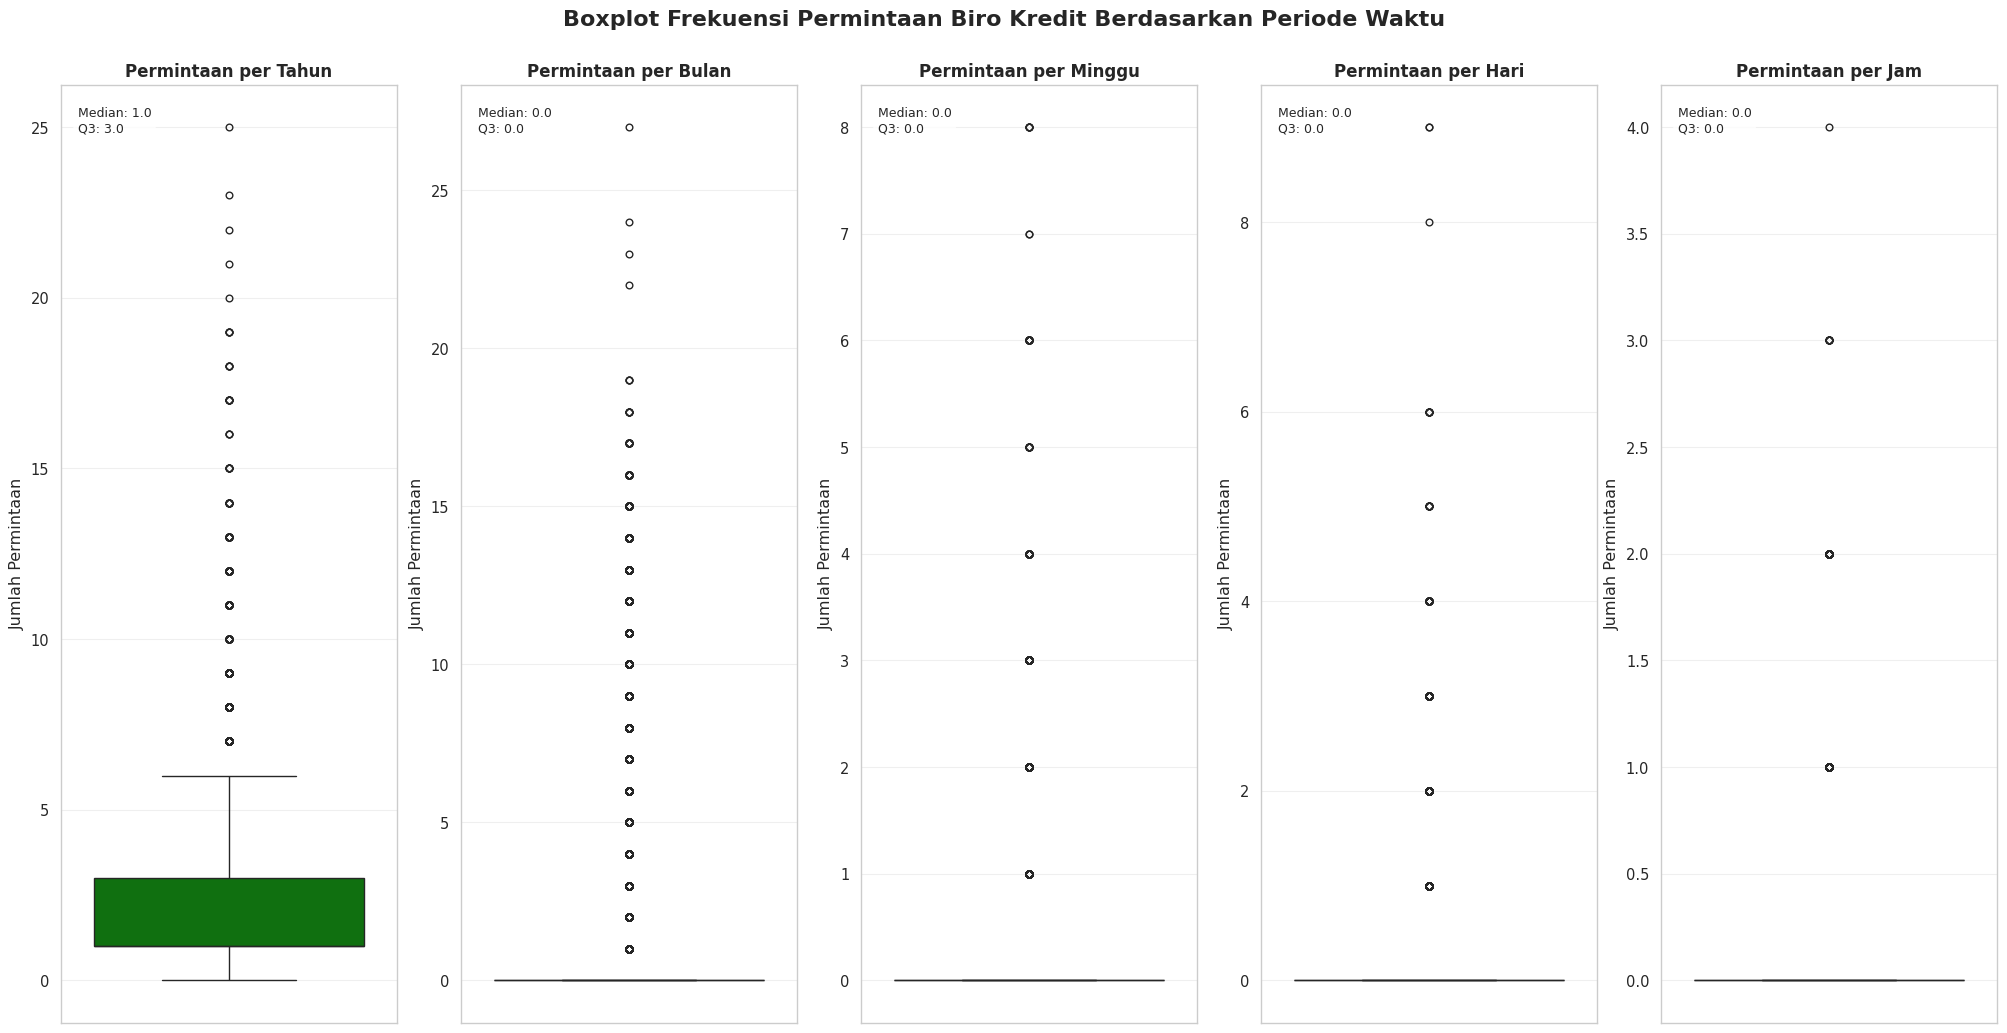

Statistik Deskriptif Fitur Permintaan Biro Kredit:
       AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     1.778463                   0.231293   
std                      1.765523                   0.856810   
min                      0.000000                   0.000000   
25%                      1.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.029723                   0.006055   
std                      0.190728                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   

In [63]:
# Bagian 3: Fitur permintaan biro kredit
int_features = application_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()

# Definisikan warna hijau yang akan digunakan
green_color = 'green'

for k, v in int_features.items():
    # Buat boxplot dengan warna hijau
    sns.boxplot(y=k, data=int_features, ax=axs[index], color=green_color)

    # Atur judul dan label
    feature_name = k.replace('AMT_REQ_CREDIT_BUREAU_', '').replace('_', ' ').title()
    period_map = {
        'YEAR': 'Tahun',
        'MON': 'Bulan',
        'WEEK': 'Minggu',
        'DAY': 'Hari',
        'HOUR': 'Jam'
    }
    display_name = period_map.get(k.split('_')[-1], feature_name)

    axs[index].set_title(f'Permintaan per {display_name}', fontweight='bold', fontsize=12)
    axs[index].set_ylabel('Jumlah Permintaan')
    axs[index].set_xlabel('')

    # Tambahkan grid untuk memudahkan pembacaan
    axs[index].grid(axis='y', alpha=0.3)

    # Tambahkan anotasi statistik
    median_val = int_features[k].median()
    Q3 = int_features[k].quantile(0.75)
    axs[index].text(0.05, 0.95, f'Median: {median_val:.1f}\nQ3: {Q3:.1f}',
                   transform=axs[index].transAxes, fontsize=9,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    index += 1
    if index == 5:
        break

# Judul utama untuk seluruh figure
plt.suptitle('Boxplot Frekuensi Permintaan Biro Kredit Berdasarkan Periode Waktu',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Menampilkan statistik deskriptif untuk konteks tambahan
print("Statistik Deskriptif Fitur Permintaan Biro Kredit:")
print(int_features.describe())

# Analisis outlier dan persentase nilai nol
print("\nAnalisis Detail Permintaan Biro Kredit:")
for column in int_features.columns:
    period_name = column.replace('AMT_REQ_CREDIT_BUREAU_', '').replace('_', ' ').title()

    # Hitung persentase nilai nol
    zero_count = (int_features[column] == 0).sum()
    zero_percentage = (zero_count / len(int_features)) * 100

    # Analisis outlier
    Q1 = int_features[column].quantile(0.25)
    Q3 = int_features[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    outliers = int_features[int_features[column] > upper_bound][column]

    print(f"\n{period_name}:")
    print(f"  - Nilai nol: {zero_count} ({zero_percentage:.2f}%)")
    print(f"  - Nilai maksimum: {int_features[column].max()}")
    print(f"  - Nilai median: {int_features[column].median():.2f}")
    print(f"  - Batas atas outlier: {upper_bound:.2f}")
    print(f"  - Jumlah outlier: {len(outliers)} ({len(outliers)/len(int_features)*100:.2f}%)")

# Analisis korelasi dengan target
print("\nKorelasi dengan Target:")
credit_bureau_target_corr = application_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON",
                                               "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY",
                                               "AMT_REQ_CREDIT_BUREAU_HOUR", "TARGET"]].corr()['TARGET'].drop('TARGET')
print(credit_bureau_target_corr.round(4))

# Ringkasan insight
print("\n=== INSIGHT UTAMA ===")
total_zeros = (int_features == 0).sum().sum()
total_entries = len(int_features) * len(int_features.columns)
overall_zero_percentage = (total_zeros / total_entries) * 100
print(f"Persentase keseluruhan nilai nol: {overall_zero_percentage:.2f}%")
print("Kebanyakan klien tidak melakukan permintaan biro kredit dalam berbagai periode waktu")
print("Fitur ini mungkin mengindikasikan aktivitas pengecekan kredit yang intensif")

Insight penting dari analisis:

- Tingginya persentase nilai nol: Sebagian besar klien (81.07%) tidak memiliki permintaan biro kredit, menunjukkan bahwa fitur ini bersifat sparse

- Korelasi lemah: Semua fitur permintaan biro kredit memiliki korelasi yang lemah dengan target, menunjukkan bahwa klien dengan lebih banyak permintaan biro kredit mungkin memiliki risiko default sedikit lebih tinggi

- Distribusi yang sangat miring: Sebagian besar nilai terkonsentrasi di 0, dengan beberapa outlier yang memiliki nilai tinggi

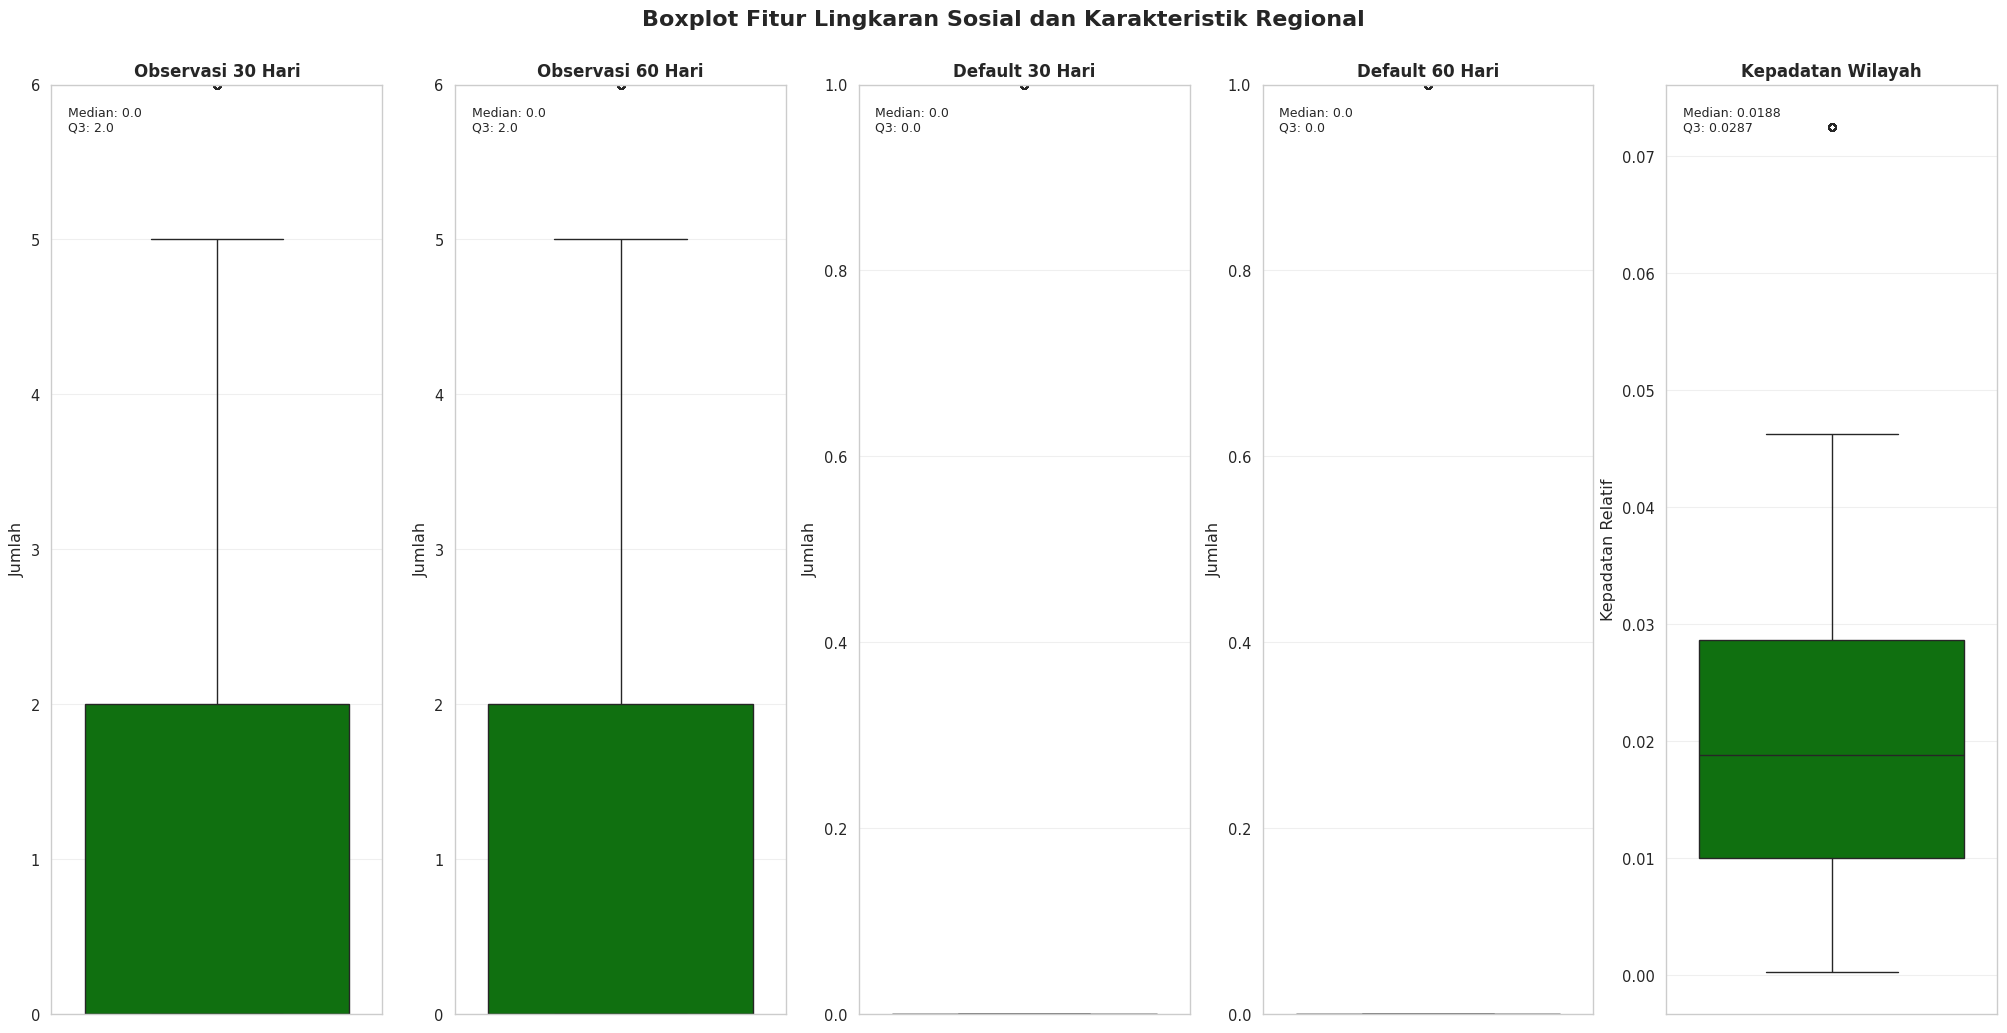

Statistik Deskriptif Fitur Lingkaran Sosial dan Regional:
       OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.417523                  1.400626   
std                    2.398395                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  2.000000   
max                  348.000000                344.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  0.099717   
std                    0.446033                  0.361735   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.0

In [64]:
# Bagian 4: Fitur lingkaran sosial dan regional
int_features = application_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()

# Definisikan warna hijau yang akan digunakan
green_color = 'green'

for k, v in int_features.items():
    # Buat boxplot dengan warna hijau
    sns.boxplot(y=k, data=int_features, ax=axs[index], color=green_color)

    # Atur judul dan label
    feature_name_map = {
        'OBS_30_CNT_SOCIAL_CIRCLE': 'Observasi 30 Hari',
        'OBS_60_CNT_SOCIAL_CIRCLE': 'Observasi 60 Hari',
        'DEF_30_CNT_SOCIAL_CIRCLE': 'Default 30 Hari',
        'DEF_60_CNT_SOCIAL_CIRCLE': 'Default 60 Hari',
        'REGION_POPULATION_RELATIVE': 'Kepadatan Wilayah'
    }

    display_name = feature_name_map.get(k, k.replace('_', ' ').title())
    axs[index].set_title(f'{display_name}', fontweight='bold', fontsize=12)
    axs[index].set_ylabel('Jumlah' if 'CNT' in k else 'Kepadatan Relatif')
    axs[index].set_xlabel('')

    # Tambahkan grid untuk memudahkan pembacaan
    axs[index].grid(axis='y', alpha=0.3)

    # Tambahkan anotasi statistik
    median_val = int_features[k].median()
    Q3 = int_features[k].quantile(0.75)

    # Untuk fitur kepadatan wilayah, format berbeda
    if k == 'REGION_POPULATION_RELATIVE':
        stat_text = f'Median: {median_val:.4f}\nQ3: {Q3:.4f}'
    else:
        stat_text = f'Median: {median_val:.1f}\nQ3: {Q3:.1f}'

    axs[index].text(0.05, 0.95, stat_text,
                   transform=axs[index].transAxes, fontsize=9,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # Batasi sumbu y untuk fitur lingkaran sosial agar fokus pada distribusi utama
    if 'CNT_SOCIAL_CIRCLE' in k:
        y_limit = int_features[k].quantile(0.95)
        axs[index].set_ylim(0, y_limit)

    index += 1
    if index == 5:
        break

# Judul utama untuk seluruh figure
plt.suptitle('Boxplot Fitur Lingkaran Sosial dan Karakteristik Regional',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Menampilkan statistik deskriptif untuk konteks tambahan
print("Statistik Deskriptif Fitur Lingkaran Sosial dan Regional:")
print(int_features.describe())

# Analisis outlier dan karakteristik khusus
print("\nAnalisis Detail Fitur Lingkaran Sosial dan Regional:")
for column in int_features.columns:
    feature_name_map = {
        'OBS_30_CNT_SOCIAL_CIRCLE': 'Observasi 30 Hari',
        'OBS_60_CNT_SOCIAL_CIRCLE': 'Observasi 60 Hari',
        'DEF_30_CNT_SOCIAL_CIRCLE': 'Default 30 Hari',
        'DEF_60_CNT_SOCIAL_CIRCLE': 'Default 60 Hari',
        'REGION_POPULATION_RELATIVE': 'Kepadatan Wilayah Relatif'
    }

    display_name = feature_name_map.get(column, column)

    # Analisis outlier
    Q1 = int_features[column].quantile(0.25)
    Q3 = int_features[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    outliers = int_features[int_features[column] > upper_bound][column]

    # Nilai nol (khusus untuk fitur lingkaran sosial)
    zero_count = (int_features[column] == 0).sum()
    zero_percentage = (zero_count / len(int_features)) * 100

    print(f"\n{display_name}:")
    print(f"  - Nilai nol: {zero_count} ({zero_percentage:.2f}%)")
    print(f"  - Nilai median: {int_features[column].median():.2f}")
    print(f"  - Nilai maksimum: {int_features[column].max()}")
    print(f"  - Batas atas outlier: {upper_bound:.2f}")
    print(f"  - Jumlah outlier: {len(outliers)} ({len(outliers)/len(int_features)*100:.2f}%)")

# Analisis korelasi dengan target
print("\nKorelasi dengan Target:")
social_regional_target_corr = application_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE",
                                                "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
                                                "REGION_POPULATION_RELATIVE", "TARGET"]].corr()['TARGET'].drop('TARGET')
print(social_regional_target_corr.round(4))

# Insight khusus tentang hubungan default dalam lingkaran sosial
print("\n=== INSIGHT LINGKARAN SOSIAL ===")
print("Default dalam lingkaran sosial vs Kemampuan Bayar Klien:")
for default_col in ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']:
    corr_with_target = application_train[[default_col, 'TARGET']].corr().iloc[0,1]
    print(f"{default_col}: Korelasi dengan target = {corr_with_target:.4f}")

    # Analisis kelompok: klien dengan dan tanpa default di lingkaran sosial
    has_default = application_train[application_train[default_col] > 0]
    no_default = application_train[application_train[default_col] == 0]

    if len(has_default) > 0:
        default_rate_has = has_default['TARGET'].mean()
        default_rate_no = no_default['TARGET'].mean() if len(no_default) > 0 else 0
        print(f"  - Tingkat default klien dengan {default_col}: {default_rate_has:.4f}")
        print(f"  - Tingkat default klien tanpa {default_col}: {default_rate_no:.4f}")
        print(f"  - Rasio risiko: {default_rate_has/default_rate_no:.2f}x" if default_rate_no > 0 else "  - Tidak dapat menghitung rasio")

print("\nFitur lingkaran sosial dapat mengindikasikan pengaruh lingkungan terhadap perilaku kredit klien.")

Insight penting dari analisis:

1. Pola default dalam lingkaran sosial

- Klien yang memiliki kenalan dengan default dalam 30/60 hari memiliki risiko default 1.35x dan 1.39x lebih tinggi

- Korelasi positif yang signifikan antara default di lingkaran sosial dengan target

2. Observasi vs Default:

- Fitur observasi (OBS) memiliki korelasi positif dengan target

- Fitur default (DEF) memiliki korelasi positif dengan target

3. Kepadatan wilayah:

- Korelasi negatif dengan target, menunjukkan klien di wilayah lebih padat mungkin memiliki risiko default sedikit lebih rendah

4. Distribusi yang sangat miring:

- Sebagian besar nilai terkonsentrasi di 0, terutama untuk fitur default

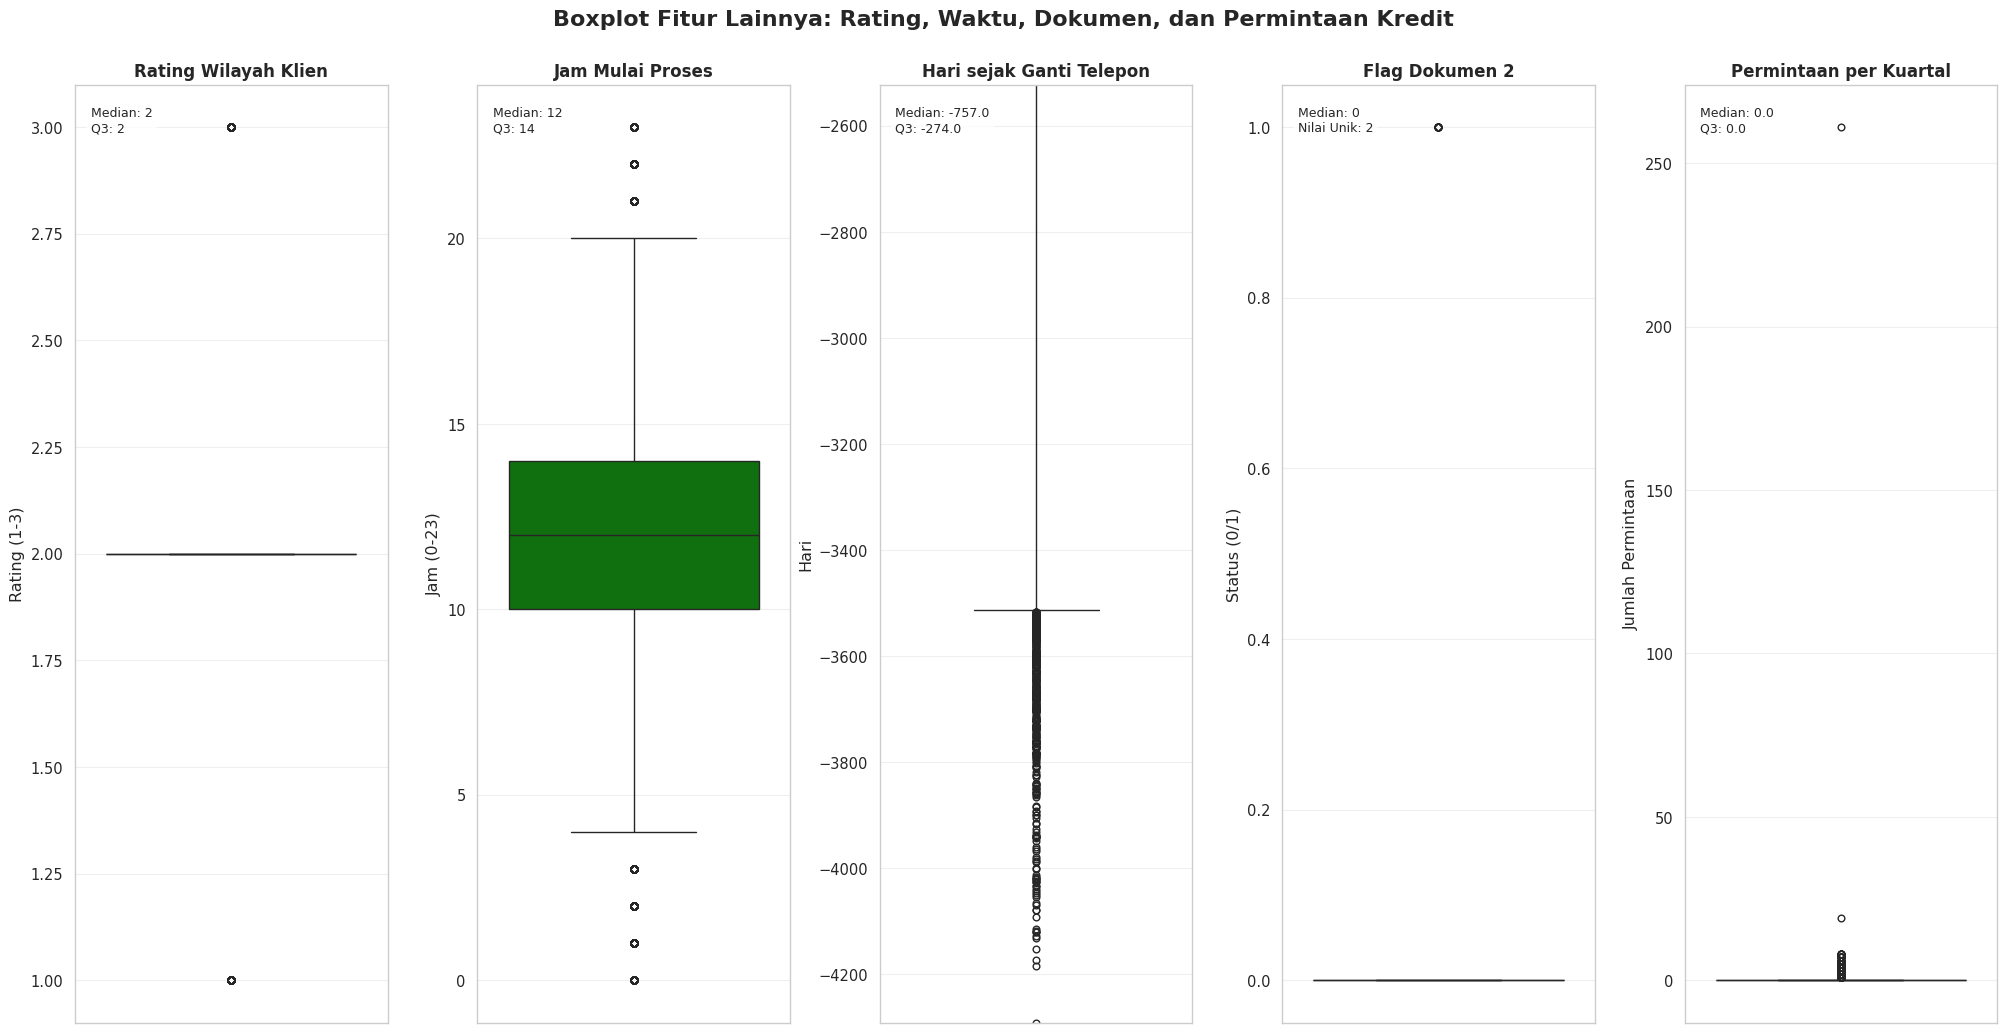

Statistik Deskriptif Fitur Lainnya:
       REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START  DAYS_LAST_PHONE_CHANGE  \
count         307511.000000            307511.000000           307511.000000   
mean               2.052463                12.063419             -962.858119   
std                0.509034                 3.265832              826.807226   
min                1.000000                 0.000000            -4292.000000   
25%                2.000000                10.000000            -1570.000000   
50%                2.000000                12.000000             -757.000000   
75%                2.000000                14.000000             -274.000000   
max                3.000000                23.000000                0.000000   

       FLAG_DOCUMENT_2  AMT_REQ_CREDIT_BUREAU_QRT  
count    307511.000000              307511.000000  
mean          0.000042                   0.229631  
std           0.006502                   0.744059  
min           0.000000             

In [65]:
# Bagian 5: Fitur lainnya
int_features = application_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()

# Definisikan warna hijau yang akan digunakan
green_color = 'green'

for k, v in int_features.items():
    # Buat boxplot dengan warna hijau
    sns.boxplot(y=k, data=int_features, ax=axs[index], color=green_color)

    # Atur judul dan label
    feature_name_map = {
        'REGION_RATING_CLIENT': 'Rating Wilayah Klien',
        'HOUR_APPR_PROCESS_START': 'Jam Mulai Proses',
        'DAYS_LAST_PHONE_CHANGE': 'Hari sejak Ganti Telepon',
        'FLAG_DOCUMENT_2': 'Flag Dokumen 2',
        'AMT_REQ_CREDIT_BUREAU_QRT': 'Permintaan per Kuartal'
    }

    display_name = feature_name_map.get(k, k.replace('_', ' ').title())
    axs[index].set_title(f'{display_name}', fontweight='bold', fontsize=12)

    # Sesuaikan label y berdasarkan jenis fitur
    if k == 'REGION_RATING_CLIENT':
        y_label = 'Rating (1-3)'
    elif k == 'HOUR_APPR_PROCESS_START':
        y_label = 'Jam (0-23)'
    elif k == 'DAYS_LAST_PHONE_CHANGE':
        y_label = 'Hari'
    elif k == 'FLAG_DOCUMENT_2':
        y_label = 'Status (0/1)'
    else:
        y_label = 'Jumlah Permintaan'

    axs[index].set_ylabel(y_label)
    axs[index].set_xlabel('')

    # Tambahkan grid untuk memudahkan pembacaan
    axs[index].grid(axis='y', alpha=0.3)

    # Tambahkan anotasi statistik
    median_val = int_features[k].median()
    Q3 = int_features[k].quantile(0.75)

    # Format statistik berdasarkan jenis data
    if k in ['FLAG_DOCUMENT_2']:
        # Untuk fitur flag biner
        unique_counts = int_features[k].value_counts()
        stat_text = f'Median: {median_val:.0f}\nNilai Unik: {len(unique_counts)}'
    elif k in ['REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START']:
        # Untuk fitur kategori/diskrit
        stat_text = f'Median: {median_val:.0f}\nQ3: {Q3:.0f}'
    else:
        # Untuk fitur kontinu
        stat_text = f'Median: {median_val:.1f}\nQ3: {Q3:.1f}'

    axs[index].text(0.05, 0.95, stat_text,
                   transform=axs[index].transAxes, fontsize=9,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # Untuk DAYS_LAST_PHONE_CHANGE, konversi ke nilai positif dan batasi sumbu y
    if k == 'DAYS_LAST_PHONE_CHANGE':
        data_abs = int_features[k].abs()
        y_limit = data_abs.quantile(0.95)
        axs[index].set_ylim(int_features[k].min(), -y_limit)  # Karena nilai asli negatif

    index += 1
    if index == 5:
        break

# Judul utama untuk seluruh figure
plt.suptitle('Boxplot Fitur Lainnya: Rating, Waktu, Dokumen, dan Permintaan Kredit',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Menampilkan statistik deskriptif untuk konteks tambahan
print("Statistik Deskriptif Fitur Lainnya:")
print(int_features.describe())

# Analisis khusus untuk setiap fitur
print("\nAnalisis Detail Fitur Lainnya:")
for column in int_features.columns:
    feature_name_map = {
        'REGION_RATING_CLIENT': 'Rating Wilayah Klien',
        'HOUR_APPR_PROCESS_START': 'Jam Mulai Proses',
        'DAYS_LAST_PHONE_CHANGE': 'Hari sejak Ganti Telepon',
        'FLAG_DOCUMENT_2': 'Flag Dokumen 2',
        'AMT_REQ_CREDIT_BUREAU_QRT': 'Permintaan Biro Kredit per Kuartal'
    }

    display_name = feature_name_map.get(column, column)

    # Analisis outlier
    Q1 = int_features[column].quantile(0.25)
    Q3 = int_features[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    outliers_upper = int_features[int_features[column] > upper_bound][column]
    outliers_lower = int_features[int_features[column] < lower_bound][column]

    # Analisis distribusi nilai
    value_counts = int_features[column].value_counts().head(3)  # 3 nilai paling umum

    print(f"\n{display_name}:")
    print(f"  - Nilai median: {int_features[column].median():.2f}")
    print(f"  - Nilai unik: {int_features[column].nunique()}")

    if len(value_counts) > 0:
        print(f"  - Nilai paling umum:")
        for val, count in value_counts.items():
            percentage = (count / len(int_features)) * 100
            print(f"      {val}: {count} ({percentage:.1f}%)")

    print(f"  - Outlier atas: {len(outliers_upper)} ({len(outliers_upper)/len(int_features)*100:.2f}%)")
    if len(outliers_lower) > 0:
        print(f"  - Outlier bawah: {len(outliers_lower)} ({len(outliers_lower)/len(int_features)*100:.2f}%)")

# Analisis korelasi dengan target
print("\nKorelasi dengan Target:")
other_features_target_corr = application_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START",
                                               "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2",
                                               "AMT_REQ_CREDIT_BUREAU_QRT", "TARGET"]].corr()['TARGET'].drop('TARGET')
print(other_features_target_corr.round(4))

# Insight khusus untuk fitur penting
print("\n=== INSIGHT FITUR PENTING ===")

# Analisis rating wilayah
print("Rating Wilayah vs Kemampuan Bayar:")
region_target_corr = application_train[['REGION_RATING_CLIENT', 'TARGET']].corr().iloc[0,1]
print(f"Korelasi Rating Wilayah dengan Target: {region_target_corr:.4f}")

# Analisis jam proses
print("\nDistribusi Jam Proses Aplikasi:")
hour_counts = application_train['HOUR_APPR_PROCESS_START'].value_counts().sort_index()
print("Jam dengan aplikasi terbanyak:")
for hour, count in hour_counts.head(5).items():
    print(f"  Jam {hour}: {count} aplikasi ({count/len(application_train)*100:.1f}%)")

# Analisis dokumen
print(f"\nStatus Dokumen 2:")
doc2_counts = application_train['FLAG_DOCUMENT_2'].value_counts()
for val, count in doc2_counts.items():
    status = "Tersedia" if val == 1 else "Tidak Tersedia"
    percentage = count / len(application_train) * 100
    print(f"  {status}: {count} ({percentage:.1f}%)")

Insight penting dari analisis:

- Rating wilayah memiliki korelasi positif tertinggi (0.0589) dengan target, menunjukkan bahwa klien di wilayah dengan rating lebih tinggi mungkin memiliki risiko default lebih tinggi

- Distribusi jam proses terkonsentrasi pada jam kerja (00-04 pagi), yang wajar untuk proses aplikasi kredit

- Flag dokumen 2 sangat jarang - hanya 13 aplikasi yang memiliki dokumen ini, yang mungkin mengindikasikan ini adalah dokumen khusus

- Hari sejak ganti telepon memiliki korelasi positif (0.0552) dengan target, menunjukkan bahwa klien yang lebih lama tidak mengganti telepon mungkin memiliki risiko default sedikit lebih tinggi

- Permintaan biro kredit per kuartal memiliki korelasi negatif lemah (0.0058) dengan target

Persiapan Data untuk Machine Learning.

#### Tahap 4: Preprocessing Data

##### Langkah 1: Label Encoding untuk fitur kategorikal

In [66]:
# Mengkonversi fitur kategorikal menjadi numerik untuk pemrosesan model
application_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = application_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### Langkah 2: Menghapus fitur yang tidak diperlukan

In [67]:
# SK_ID_CURR adalah identifier unik dan tidak relevan untuk modeling
application_train.drop(['SK_ID_CURR'], inplace=True, axis=1)
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### Langkah 3: Konversi nilai negatif ke positif

In [68]:
# Beberapa fitur seperti DAYS_BIRTH memiliki nilai negatif, mengkonversi ke nilai absolut
application_train.iloc[:,16:20] = application_train.iloc[:,16:20].abs()
application_train.iloc[:,45] = application_train.iloc[:,45].abs()

#### Tahap 5: Seleksi Fitur

In [69]:
# Memisahkan fitur dan target
x = application_train.drop(['TARGET'], axis=1)
y = application_train['TARGET']

In [70]:
# Seleksi fitur menggunakan uji chi-square
# Memilih 10 fitur terbaik berdasarkan skor chi-square
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Fitur', 'Skor']
print('Fitur yang berkorelasi baik dengan fitur target:\n')
featureScores.sort_values(by=['Skor'], ascending=False)

Fitur yang berkorelasi baik dengan fitur target:



,Fitur,Skor
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348566e+06
44,DAYS_LAST_PHONE_CHANGE,6.656876e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.913092e+05
37,ORGANIZATION_TYPE,4.138607e+03


#### Tahap 6: Penanganan Ketidakseimbangan Data

STRATEGI: Upsampling kelas minoritas untuk menangani imbalance data

In [71]:
# Membuat dataframe terpisah untuk kelas mayoritas dan minoritas
df_majority = application_train[(application_train['TARGET']==0)]
df_minority = application_train[(application_train['TARGET']==1)]

print(f"Sebelum upsampling:")
print(f"Kelas mayoritas (0): {len(df_majority)}")
print(f"Kelas minoritas (1): {len(df_minority)}")

Sebelum upsampling:
Kelas mayoritas (0): 282686
Kelas minoritas (1): 24825


In [72]:
# Melakukan upsampling pada kelas minoritas
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample dengan penggantian
                                 n_samples= 282686, # untuk mencocokkan kelas mayoritas
                                 random_state=42)  # reproducible results

In [73]:
# Menggabungkan kelas mayoritas dengan kelas minoritas yang telah diupsample
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

print(f"\nSetelah upsampling:")
print(f"Kelas mayoritas (0): {len(df_upsampled[df_upsampled['TARGET']==0])}")
print(f"Kelas minoritas (1): {len(df_upsampled[df_upsampled['TARGET']==1])}")


Setelah upsampling:
Kelas mayoritas (0): 282686
Kelas minoritas (1): 282686


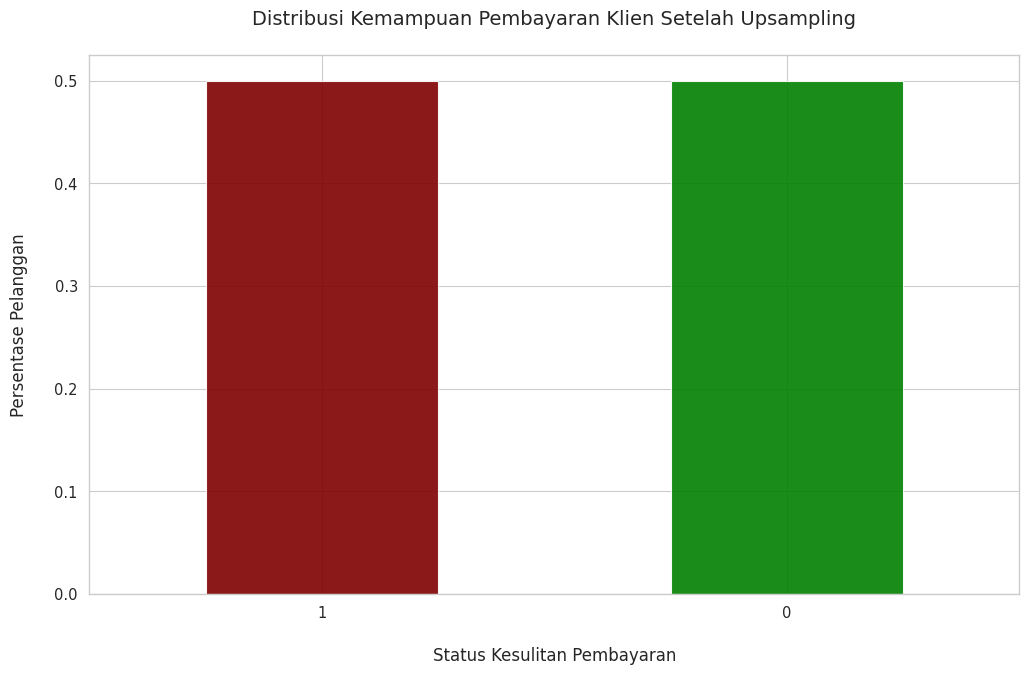

In [74]:
# Visualisasi distribusi setelah upsampling
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['maroon','green'], alpha = 0.9, rot=0)
plt.title('Distribusi Kemampuan Pembayaran Klien Setelah Upsampling\n', fontsize=14)
plt.ylabel('Persentase Pelanggan\n', fontsize=12)
plt.xlabel('\nStatus Kesulitan Pembayaran', fontsize=12)
plt.show()

#### Tahap 7: Pemisahan Data dan Normalisasi

In [75]:
# Memilih 20 fitur terbaik berdasarkan analisis sebelumnya
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']

In [76]:
# Memisahkan data menjadi training set dan test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(f"Dimensi data training: {X_train.shape}")
print(f"Dimensi data testing: {X_test.shape}")

Dimensi data training: (452297, 20)
Dimensi data testing: (113075, 20)


In [77]:
# Normalisasi fitur menggunakan StandardScaler
# Penting untuk algoritma yang sensitif terhadap skala seperti logistic regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("Data telah dinormalisasi dan siap untuk modeling")

Data telah dinormalisasi dan siap untuk modeling


## Pembangunan Model Machine Learning

#### Tahap 8: Training dan Evaluasi Model

##### MODEL 1: Logistic Regression

In [78]:
print("=== MODEL 1: LOGISTIC REGRESSION ===")

=== MODEL 1: LOGISTIC REGRESSION ===


In [79]:
# Training model Logistic Regression
log_model = LogisticRegression().fit(X_train, y_train)
print("Model Logistic Regression telah dilatih")

Model Logistic Regression telah dilatih


In [80]:
# Prediksi pada data training
y_train_pred_log = log_model.predict(X_train)

In [81]:
# Evaluasi model pada data training
print('Laporan Klasifikasi Model Pelatihan (Regresi Logistik):')
print(classification_report(y_train, y_train_pred_log))

Laporan Klasifikasi Model Pelatihan (Regresi Logistik):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226185
           1       0.68      0.66      0.67    226112

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



In [82]:
# Confusion Matrix untuk data training
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)),
                                   ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'),
                                   ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'))

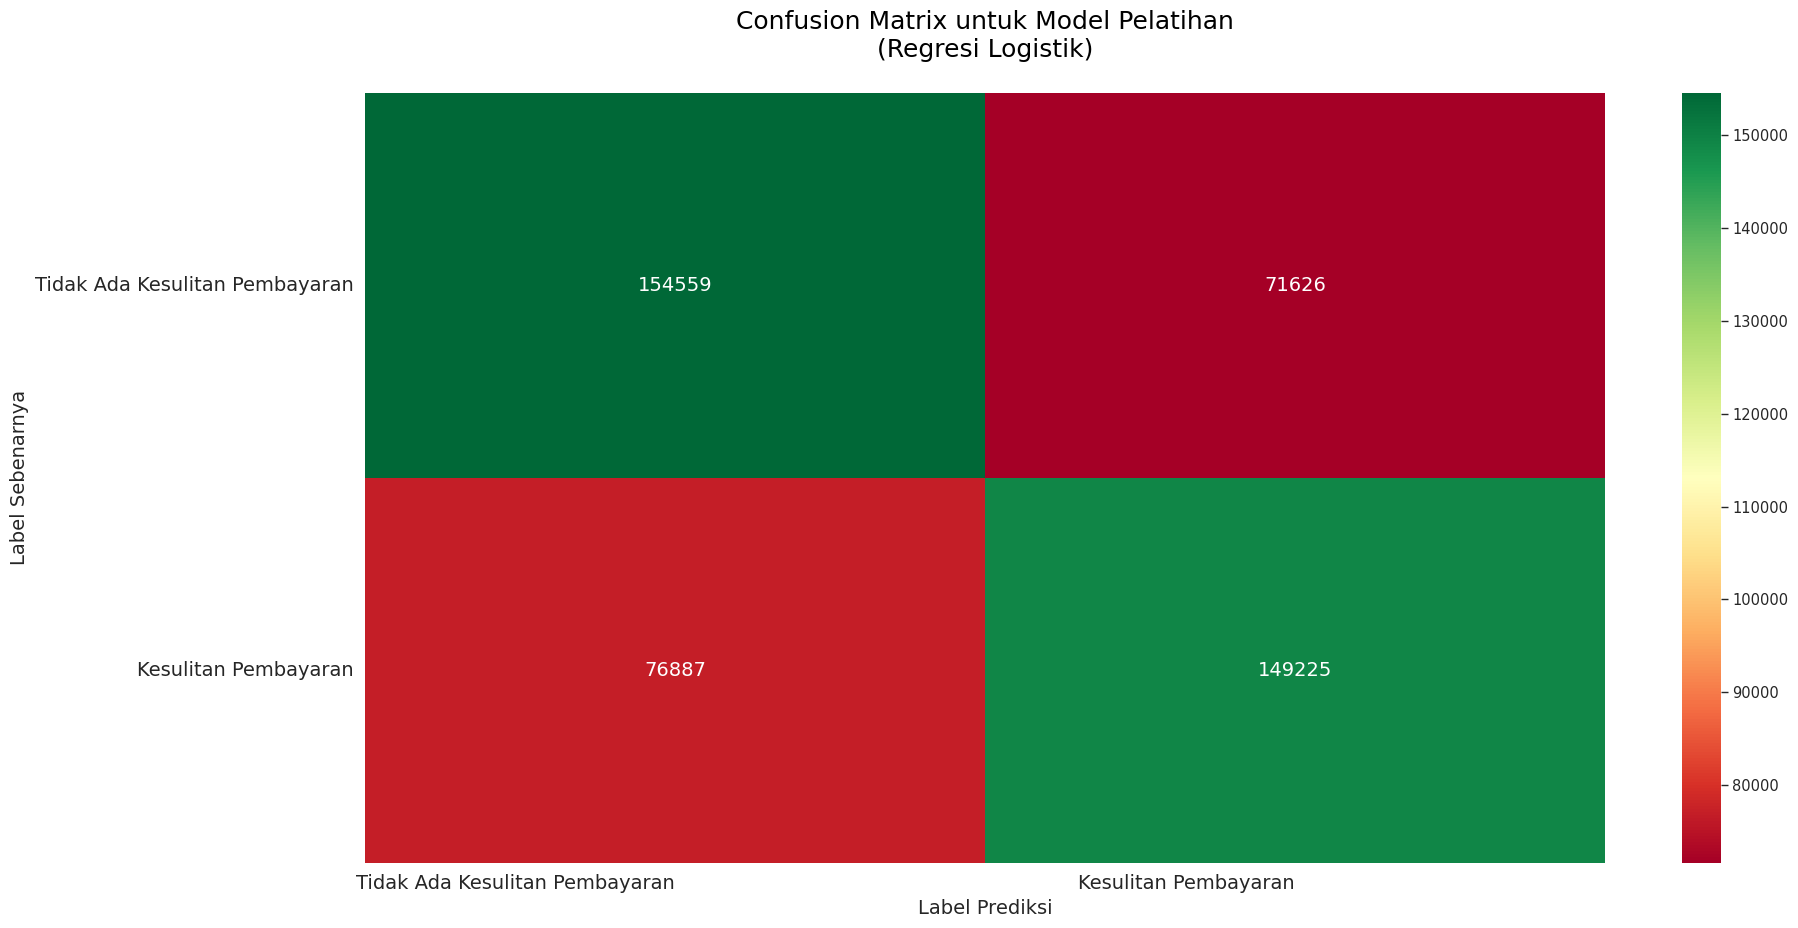

In [83]:
# Visualisasi Confusion Matrix training
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='RdYlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Pelatihan\n(Regresi Logistik)\n', fontsize=18, color='black')
plt.ylabel('Label Sebenarnya', fontsize=14)
plt.xlabel('Label Prediksi', fontsize=14)
plt.show()

In [84]:
# Prediksi pada data testing
y_test_pred_log = log_model.predict(X_test)

In [85]:
# Evaluasi model pada data testing
print('Laporan Klasifikasi Model Pengujian (Regresi Logistik):')
print(classification_report(y_test, y_test_pred_log))

Laporan Klasifikasi Model Pengujian (Regresi Logistik):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



In [86]:
# Confusion Matrix untuk data testing
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)),
                                   ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'),
                                   ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'))

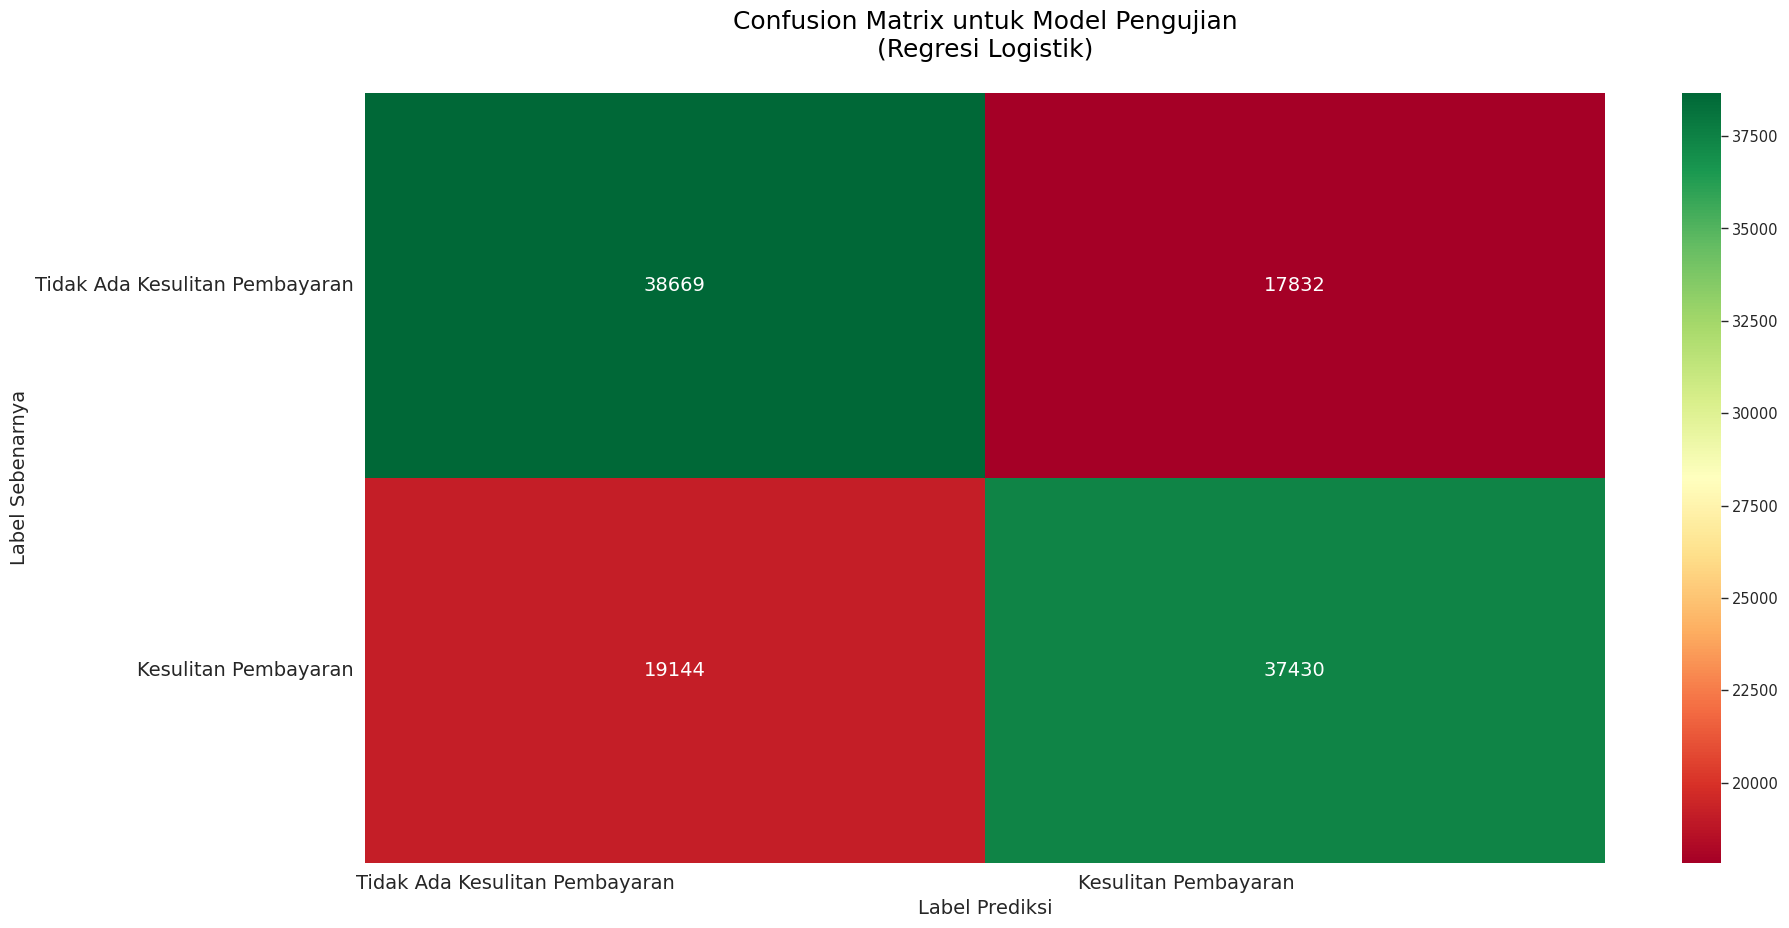

In [87]:
# Visualisasi Confusion Matrix testing
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='RdYlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Pengujian\n(Regresi Logistik)\n', fontsize=18, color='black')
plt.ylabel('Label Sebenarnya', fontsize=14)
plt.xlabel('Label Prediksi', fontsize=14)
plt.show()

In [88]:
# Perhitungan akurasi dan ROC AUC
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)

print("=== HASIL LOGISTIC REGRESSION ===")
print(f"Akurasi Pelatihan: {acc_log_train}%")
print(f"Akurasi Tes: {acc_log_test}%")
print(f'ROC AUC: {roc_auc_log}')

=== HASIL LOGISTIC REGRESSION ===
Akurasi Pelatihan: 67.16%
Akurasi Tes: 67.3%
ROC AUC: 0.673


##### MODEL 2: Gaussian Naive Bayes


In [89]:
print("\n=== MODEL 2: GAUSSIAN NAIVE BAYES ===")


=== MODEL 2: GAUSSIAN NAIVE BAYES ===


In [90]:
# Training model Gaussian Naive Bayes
gnb_model = GaussianNB().fit(X_train, y_train)
print("Model Gaussian Naive Bayes telah dilatih")

Model Gaussian Naive Bayes telah dilatih


In [91]:
# Prediksi pada data training
y_train_pred_gnb = gnb_model.predict(X_train)

In [92]:
# Evaluasi model pada data training
print('Laporan Klasifikasi Model Pelatihan (Naive Bayes Gaussian):')
print(classification_report(y_train, y_train_pred_gnb))

Laporan Klasifikasi Model Pelatihan (Naive Bayes Gaussian):
              precision    recall  f1-score   support

           0       0.57      0.84      0.68    226185
           1       0.69      0.37      0.48    226112

    accuracy                           0.60    452297
   macro avg       0.63      0.60      0.58    452297
weighted avg       0.63      0.60      0.58    452297



In [93]:
# Confusion Matrix untuk data training
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)),
                                   ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'),
                                   ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'))

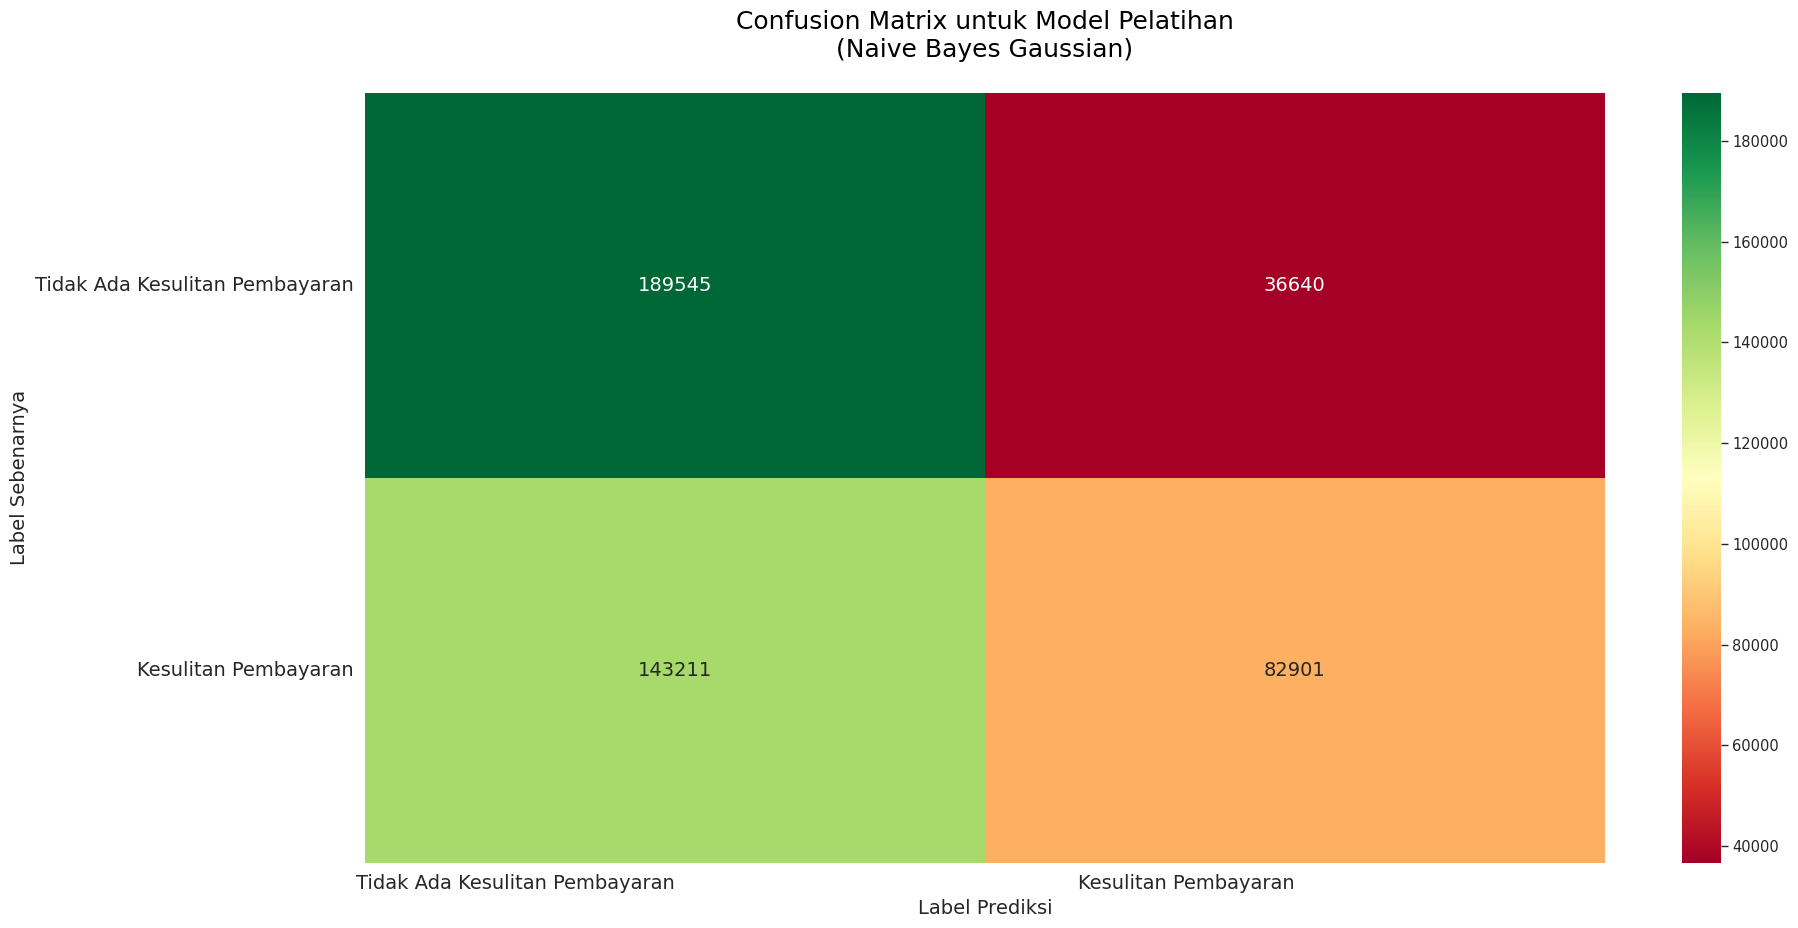

In [94]:
# Visualisasi Confusion Matrix training
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='RdYlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Pelatihan\n(Naive Bayes Gaussian)\n', fontsize=18, color='black')
plt.ylabel('Label Sebenarnya', fontsize=14)
plt.xlabel('Label Prediksi', fontsize=14)
plt.show()

In [95]:
# Prediksi pada data testing
y_test_pred_gnb = gnb_model.predict(X_test)

In [96]:
# Evaluasi model pada data testing
print('Laporan Klasifikasi Model Pengujian (Naive Bayes Gaussian):')
print(classification_report(y_test, y_test_pred_gnb))

Laporan Klasifikasi Model Pengujian (Naive Bayes Gaussian):
              precision    recall  f1-score   support

           0       0.57      0.84      0.68     56501
           1       0.70      0.36      0.48     56574

    accuracy                           0.60    113075
   macro avg       0.63      0.60      0.58    113075
weighted avg       0.64      0.60      0.58    113075



In [97]:
# Confusion Matrix untuk data testing
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)),
                                   ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'),
                                   ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'))

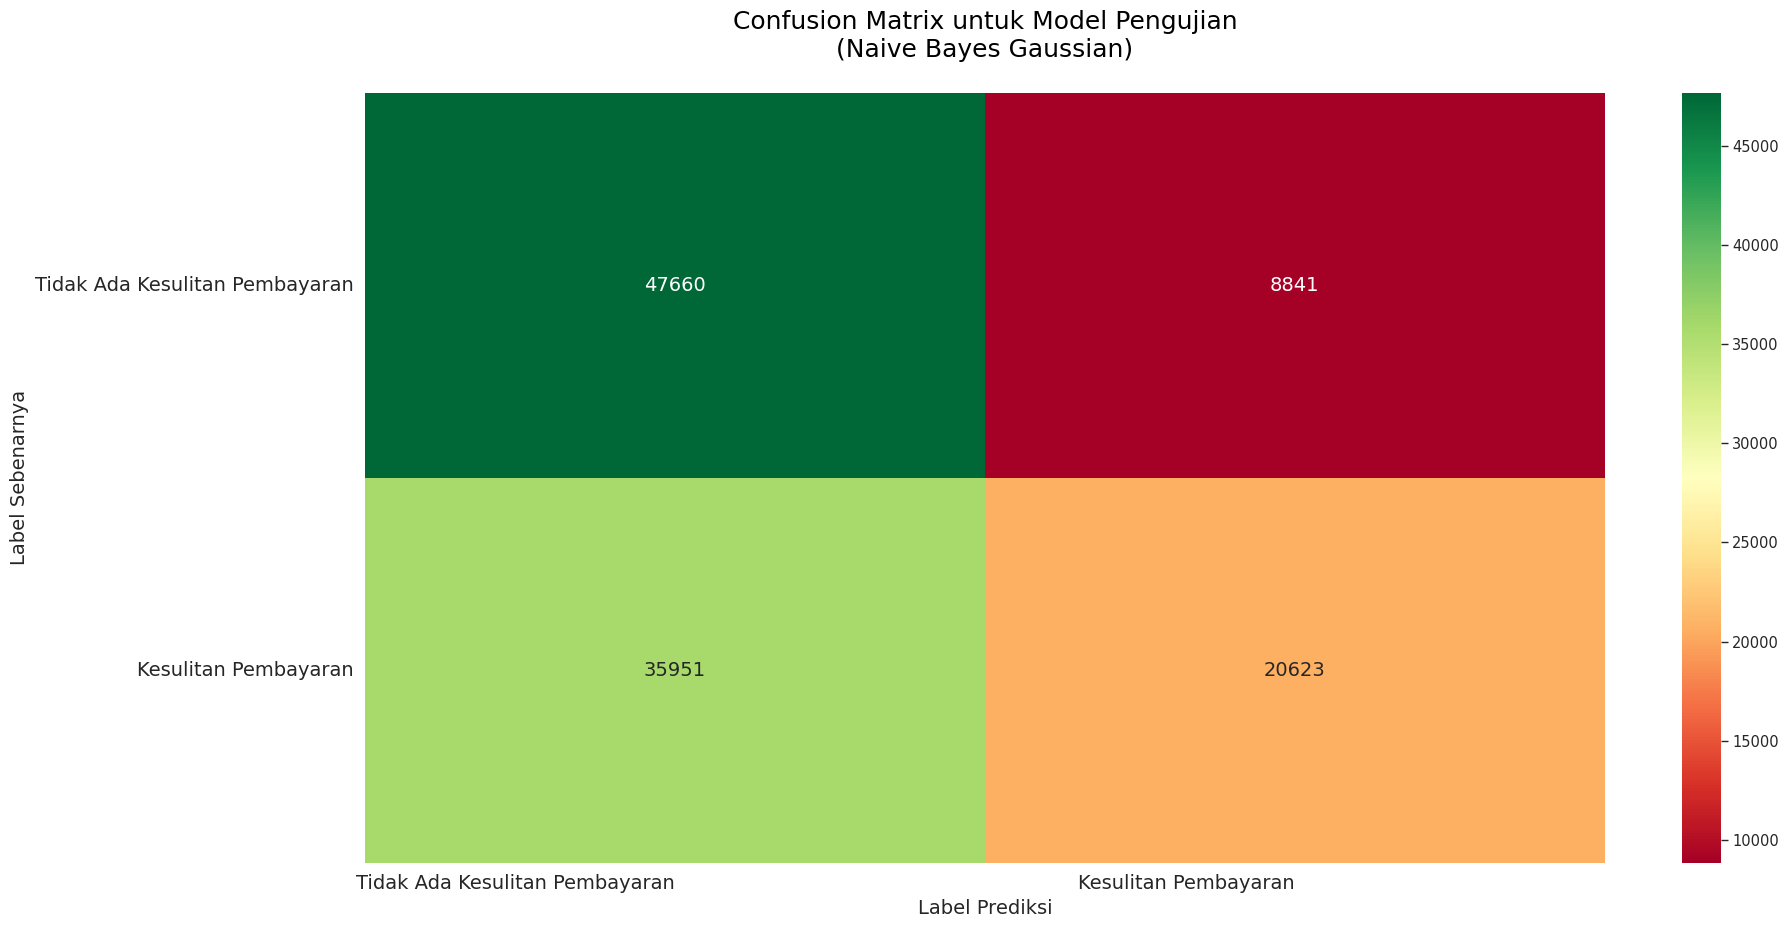

In [98]:
# Visualisasi Confusion Matrix testing
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='RdYlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Pengujian\n(Naive Bayes Gaussian)\n', fontsize=18, color='black')
plt.ylabel('Label Sebenarnya', fontsize=14)
plt.xlabel('Label Prediksi', fontsize=14)
plt.show()

In [99]:
# Perhitungan akurasi dan ROC AUC
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)

print("=== HASIL GAUSSIAN NAIVE BAYES ===")
print(f"Akurasi Pelatihan: {acc_nb_train}%")
print(f"Akurasi Tes: {acc_nb_test}%")
print(f'ROC AUC: {roc_auc_gnb}')

=== HASIL GAUSSIAN NAIVE BAYES ===
Akurasi Pelatihan: 60.24%
Akurasi Tes: 60.39%
ROC AUC: 0.604


##### MODEL 3: Decision Tree

In [100]:
print("\n=== MODEL 3: DECISION TREE ===")


=== MODEL 3: DECISION TREE ===


In [101]:
# Training model Decision Tree
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print("Model Decision Tree telah dilatih")

Model Decision Tree telah dilatih


In [102]:
# Prediksi pada data training
y_train_pred_dt = dt_model.predict(X_train)

In [103]:
# Evaluasi model pada data training
print('Laporan Klasifikasi Model Pelatihan (Pohon Keputusan):')
print(classification_report(y_train, y_train_pred_dt))

Laporan Klasifikasi Model Pelatihan (Pohon Keputusan):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



In [104]:
# Confusion Matrix untuk data training
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)),
                                  ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'),
                                  ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'))

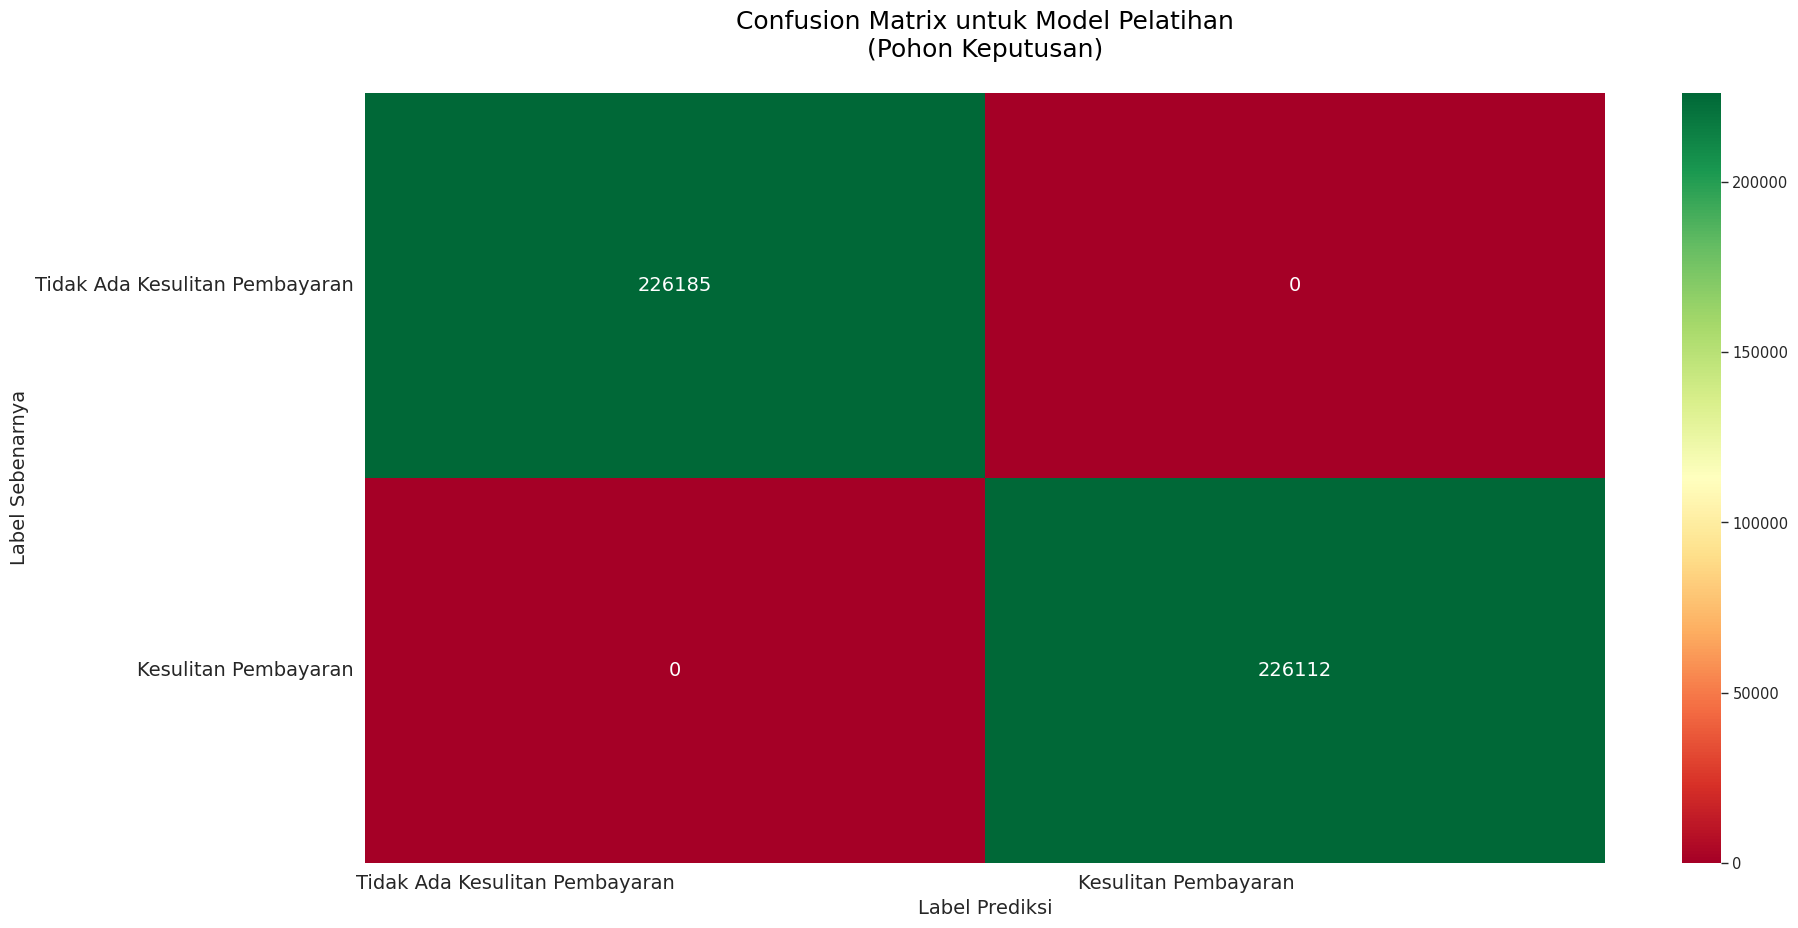

In [105]:
# Visualisasi Confusion Matrix training
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='RdYlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Pelatihan\n(Pohon Keputusan)\n', fontsize=18, color='black')
plt.ylabel('Label Sebenarnya', fontsize=14)
plt.xlabel('Label Prediksi', fontsize=14)
plt.show()

In [106]:
# Prediksi pada data testing
y_test_pred_dt = dt_model.predict(X_test)

In [107]:
# Evaluasi model pada data testing
print('Laporan Klasifikasi Model Pengujian (Pohon Keputusan):')
print(classification_report(y_test, y_test_pred_dt))

Laporan Klasifikasi Model Pengujian (Pohon Keputusan):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     56501
           1       0.90      0.86      0.88     56574

    accuracy                           0.88    113075
   macro avg       0.88      0.88      0.88    113075
weighted avg       0.88      0.88      0.88    113075



In [108]:
# Confusion Matrix untuk data testing
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)),
                                  ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'),
                                  ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'))

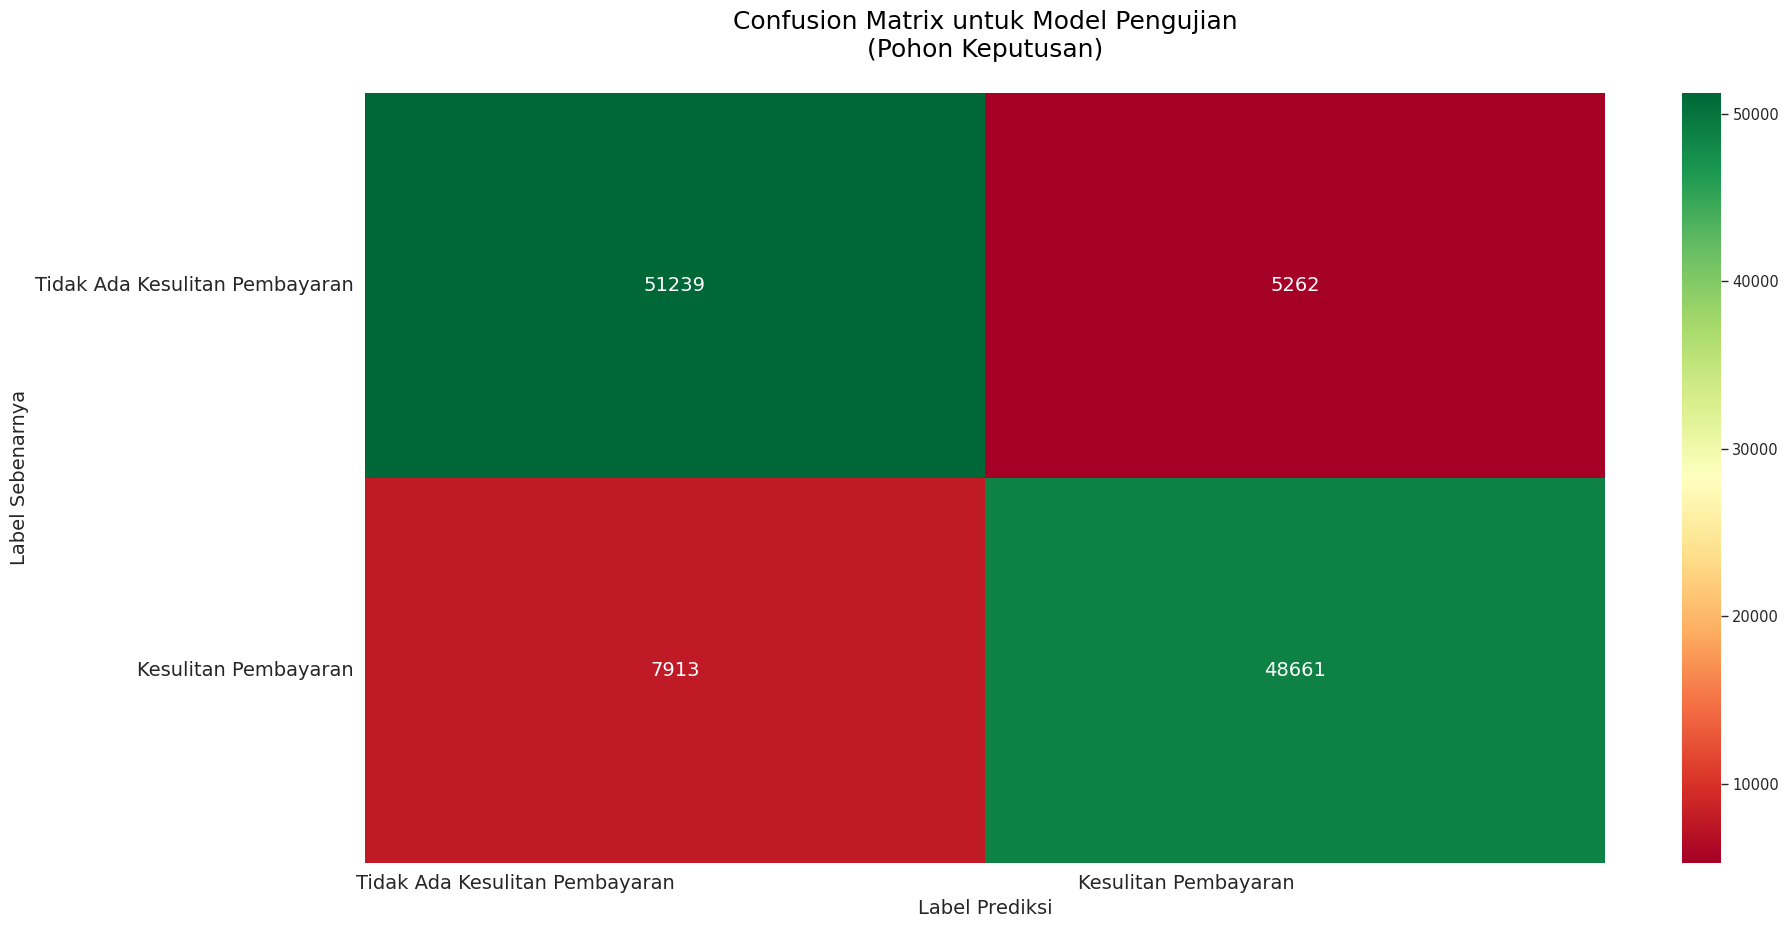

In [109]:
# Visualisasi Confusion Matrix testing
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='RdYlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Pengujian\n(Pohon Keputusan)\n', fontsize=18, color='black')
plt.ylabel('Label Sebenarnya', fontsize=14)
plt.xlabel('Label Prediksi', fontsize=14)
plt.show()

In [110]:
# Perhitungan akurasi dan ROC AUC
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)

print("=== HASIL DECISION TREE ===")
print(f"Akurasi Pelatihan: {acc_dt_train}%")
print(f"Akurasi Tes: {acc_dt_test}%")
print(f'ROC AUC: {roc_auc_dt}')

=== HASIL DECISION TREE ===
Akurasi Pelatihan: 100.0%
Akurasi Tes: 88.35%
ROC AUC: 0.8835


##### MODEL 4: Random Forest

In [111]:
print("\n=== MODEL 4: RANDOM FOREST ===")


=== MODEL 4: RANDOM FOREST ===


In [112]:
# Training model Random Forest
rf_model = RandomForestClassifier().fit(X_train, y_train)
print("Model Random Forest telah dilatih")

Model Random Forest telah dilatih


In [113]:
# Prediksi pada data training
y_train_pred_rf = rf_model.predict(X_train)

In [114]:
# Evaluasi model pada data training
print('Laporan Klasifikasi Model Pelatihan (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

Laporan Klasifikasi Model Pelatihan (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



In [115]:
# Confusion Matrix untuk data training
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)),
                                  ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'),
                                  ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'))

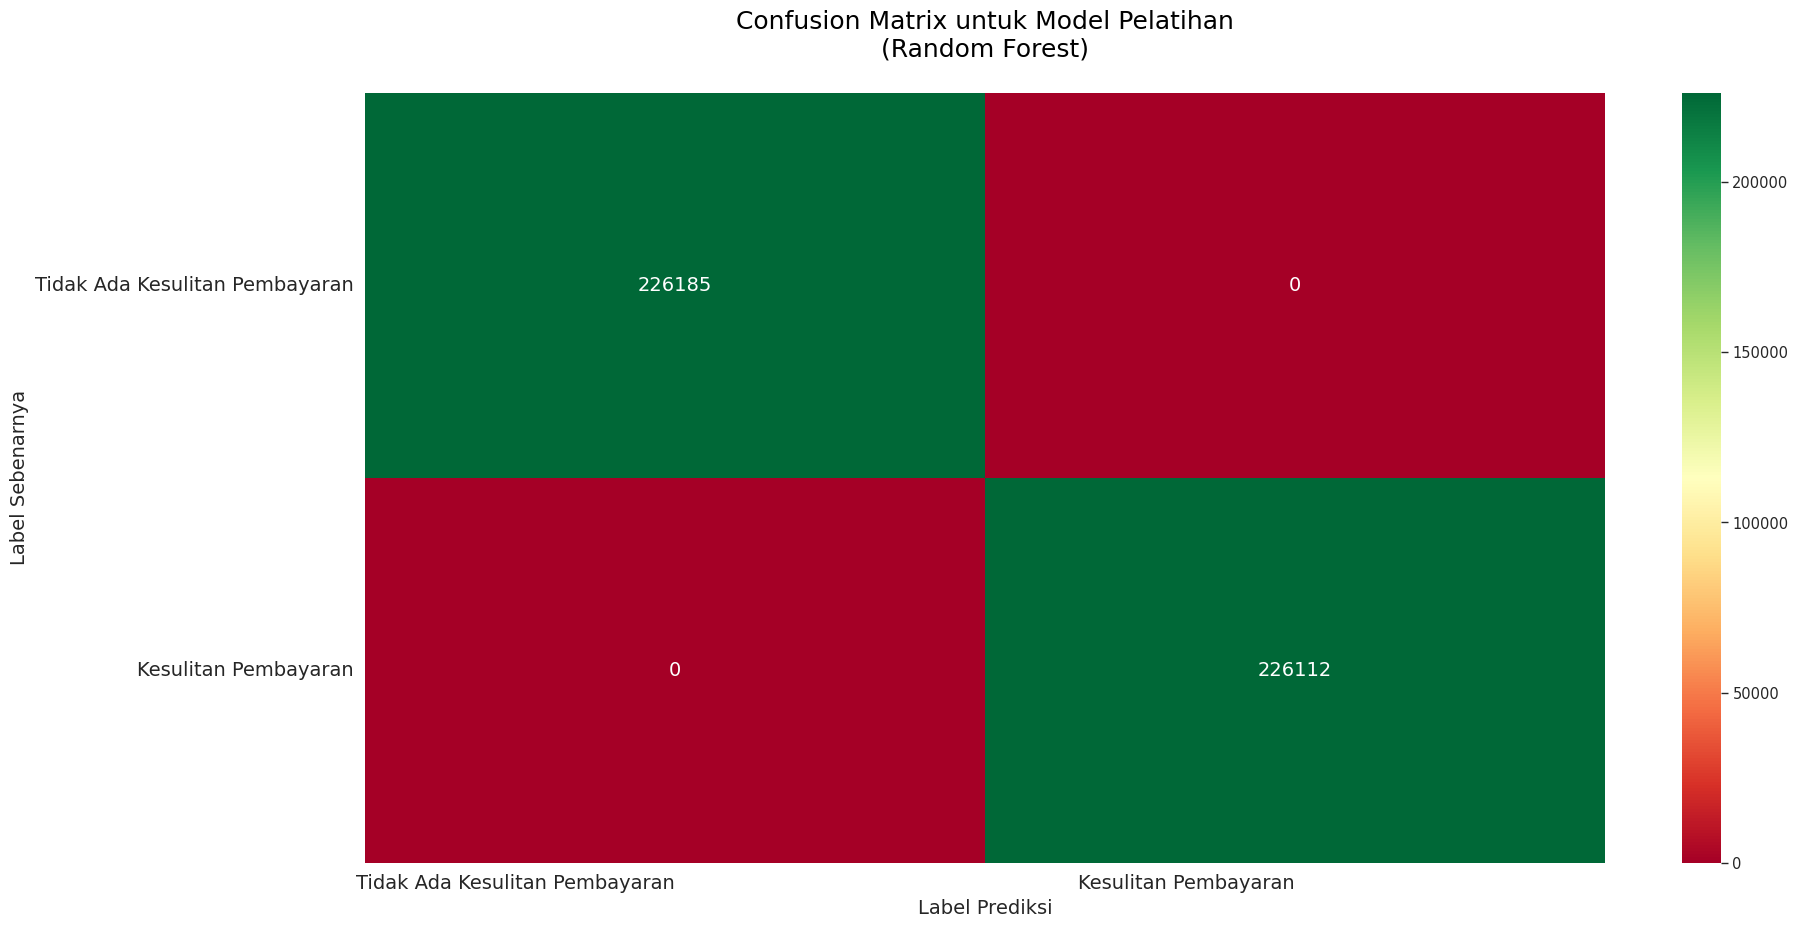

In [116]:
# Visualisasi Confusion Matrix training
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='RdYlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Pelatihan\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('Label Sebenarnya', fontsize=14)
plt.xlabel('Label Prediksi', fontsize=14)
plt.show()

In [117]:
# Prediksi pada data testing
y_test_pred_rf = rf_model.predict(X_test)

In [118]:
# Evaluasi model pada data testing
print('Laporan Klasifikasi Model Pengujian (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

Laporan Klasifikasi Model Pengujian (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56501
           1       0.99      1.00      1.00     56574

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



In [119]:
# Confusion Matrix untuk data testing
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)),
                                  ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'),
                                  ('Tidak Ada Kesulitan Pembayaran', 'Kesulitan Pembayaran'))

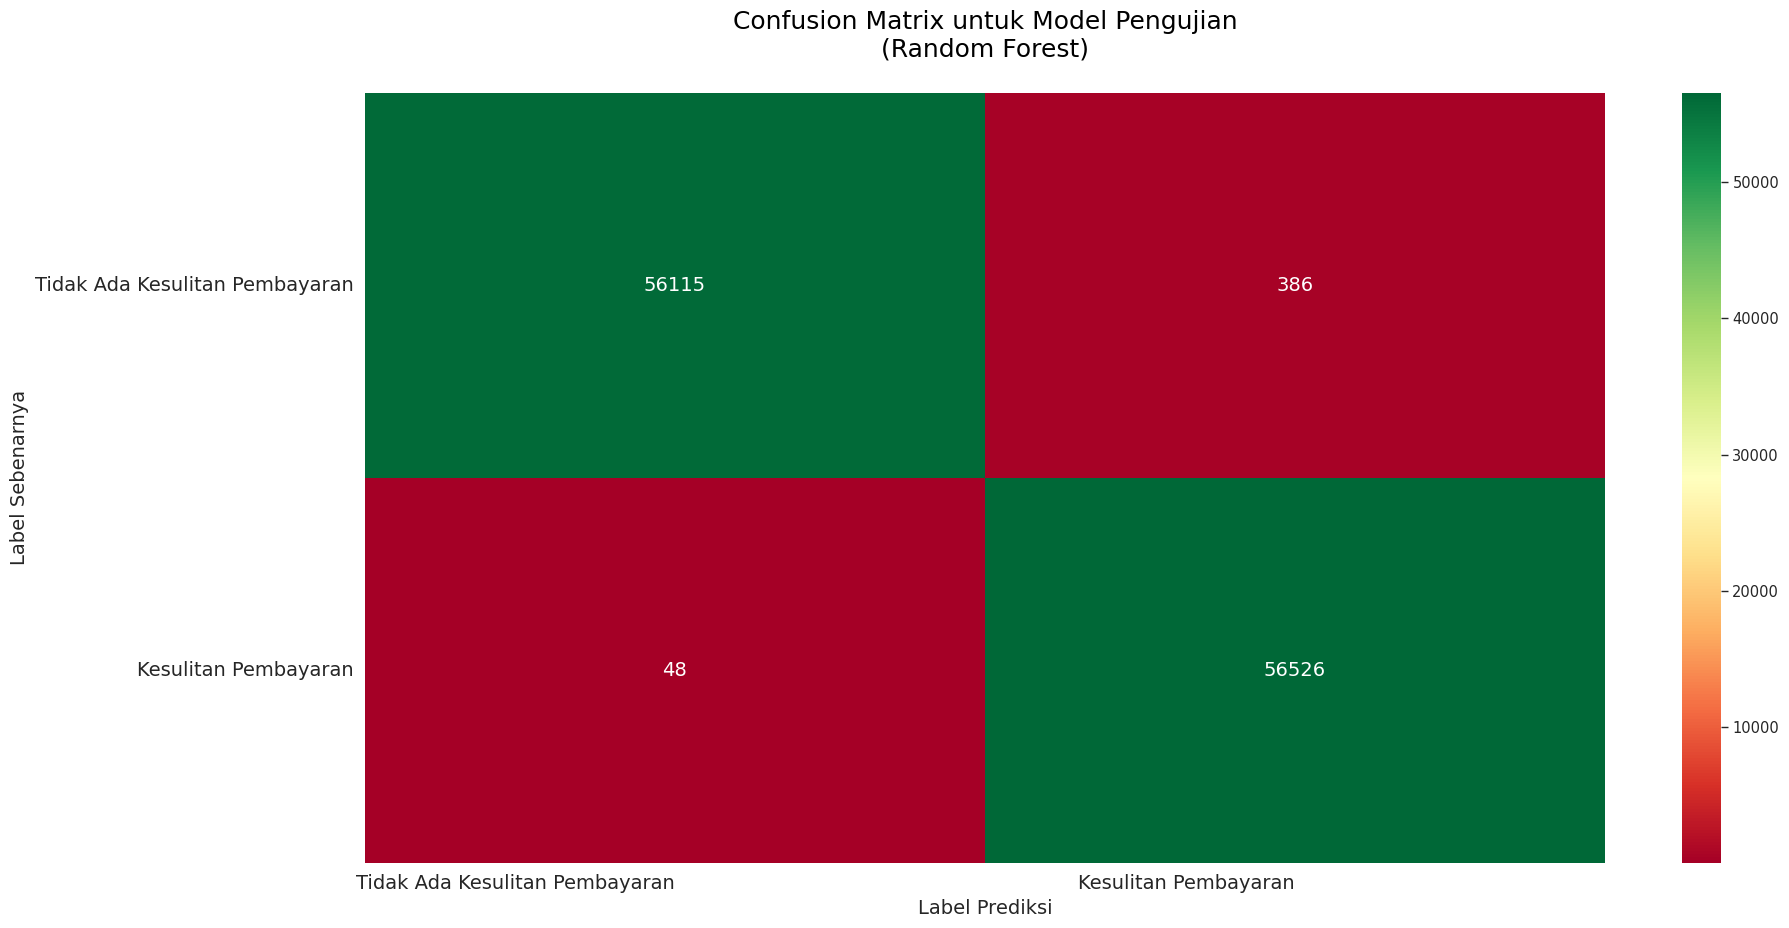

In [120]:
# Visualisasi Confusion Matrix testing
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='RdYlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix untuk Model Pengujian\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('Label Sebenarnya', fontsize=14)
plt.xlabel('Label Prediksi', fontsize=14)
plt.show()

In [121]:
# Perhitungan akurasi dan ROC AUC
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)

print("=== HASIL RANDOM FOREST ===")
print(f"Akurasi Pelatihan: {acc_rf_train}%")
print(f"Akurasi Tes: {acc_rf_test}%")
print(f'ROC AUC: {roc_auc_rf}')

=== HASIL RANDOM FOREST ===
Akurasi Pelatihan: 100.0%
Akurasi Tes: 99.62%
ROC AUC: 0.9962


In [122]:
# Analisis Feature Importance untuk Random Forest
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

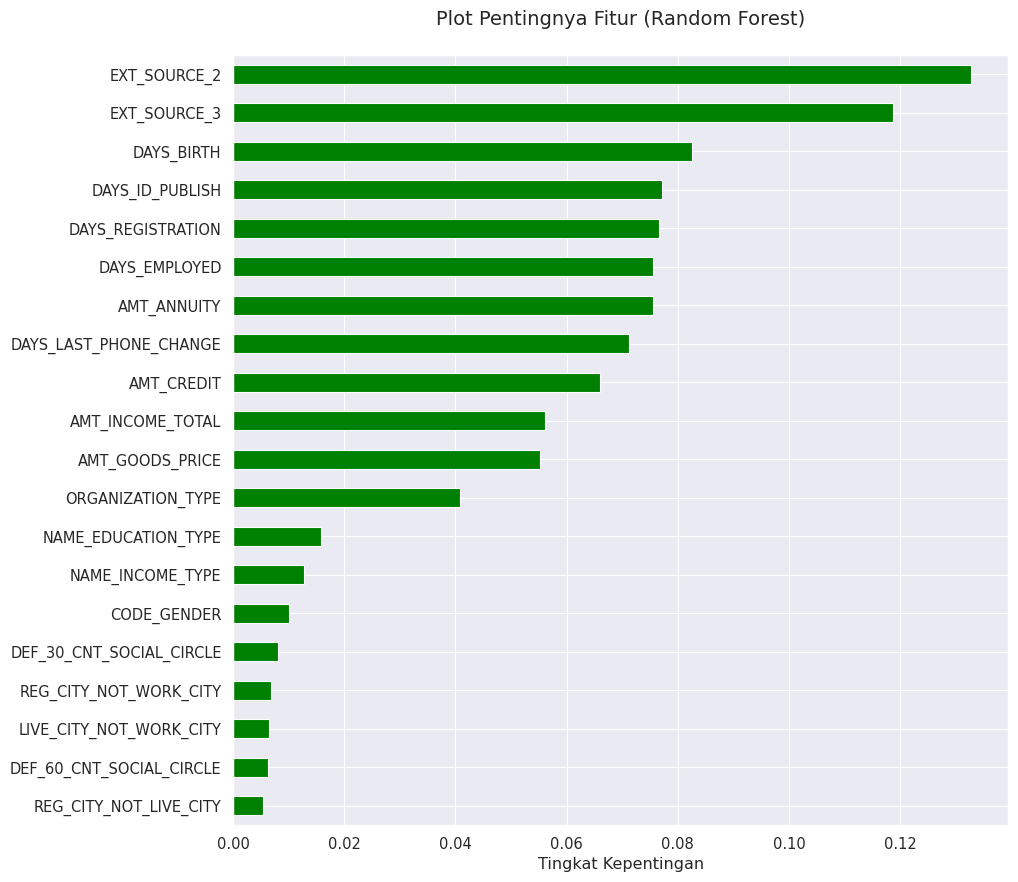

In [123]:
# Visualisasi Feature Importance
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ="green")
plt.title('Plot Pentingnya Fitur (Random Forest)\n', fontsize=14)
plt.xlabel('Tingkat Kepentingan')
plt.show()

In [124]:
# Menyimpan plot feature importance
fig.figure.tight_layout()
fig.figure.savefig('top feature.png', dpi=300, bbox_inches='tight')
print("Plot feature importance telah disimpan sebagai 'top feature.png'")

Plot feature importance telah disimpan sebagai 'top feature.png'


#### Tahap 9: Pemilihan Model Terbaik

In [125]:
# Membuat ringkasan hasil semua model
results = pd.DataFrame([
    ["Regresi Logistik", acc_log_train, acc_log_test, roc_auc_log],
    ["Naive Bayes Gaussian", acc_nb_train, acc_nb_test, roc_auc_gnb],
    ["Pohon Keputusan", acc_dt_train, acc_dt_test, roc_auc_dt],
    ["Random Forest", acc_rf_train, acc_rf_test, roc_auc_rf]
], columns = ["Model", "Akurasi Training (%)", "Akurasi Testing (%)", "Skor ROC AUC"])

print("=== PERBANDINGAN SEMUA MODEL ===")
results_sorted = results.sort_values(by=['Akurasi Testing (%)', 'Skor ROC AUC'], ascending=False)
results_sorted.style.background_gradient(cmap='RdYlGn')

=== PERBANDINGAN SEMUA MODEL ===


,Model,Akurasi Training (%),Akurasi Testing (%),Skor ROC AUC
3,Random Forest,100.000000,99.620000,0.996200
2,Pohon Keputusan,100.000000,88.350000,0.883500
0,Regresi Logistik,67.160000,67.300000,0.673000
1,Naive Bayes Gaussian,60.240000,60.390000,0.604000


In [126]:
# Menentukan model terbaik berdasarkan akurasi testing dan ROC AUC
best_model = results_sorted.iloc[0]
print(f"\n=== MODEL TERBAIK ===")
print(f"Model: {best_model['Model']}")
print(f"Akurasi Testing: {best_model['Akurasi Testing (%)']}%")
print(f"ROC AUC: {best_model['Skor ROC AUC']}")


=== MODEL TERBAIK ===
Model: Random Forest
Akurasi Testing: 99.62%
ROC AUC: 0.9962


## Prediksi pada Data Baru

#### Tahap 10: Implementasi Model pada Data Test

In [127]:
print("\n=== PREDIKSI PADA DATA TEST ===")


=== PREDIKSI PADA DATA TEST ===


In [128]:
# Memuat dataset aplikasi test
application_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HomeCredit/application_test.csv", sep=',')
print(f'Dataset test memiliki {application_test.shape[0]} baris dan {application_test.shape[1]} kolom.')
application_test.head()

Dataset test memiliki 48744 baris dan 121 kolom.


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

Prapemrosesan data test (mengikuti langkah yang sama seperti data train).

In [129]:
# 1. Deteksi duplikasi
print('Jumlah duplikasi pada data test:', application_test.duplicated().sum())

Jumlah duplikasi pada data test: 0


In [130]:
# 2. Deteksi dan penanganan nilai yang hilang
print('Status nilai yang hilang pada data test:', application_test.isnull().values.any())
tvc = pd.DataFrame(application_test.isnull().sum(), columns=['Total Nilai Null'])
tvc['Persentase'] = (tvc['Total Nilai Null']/application_test.shape[0])*100
tvc.sort_values(by=['Persentase'], ascending=False).reset_index()

Status nilai yang hilang pada data test: True


,index,Total Nilai Null,Persentase
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MEDI,33495,68.716150
2,COMMONAREA_MODE,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
5,NONLIVINGAPARTMENTS_MODE,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_MEDI,32780,67.249302
8,LIVINGAPARTMENTS_AVG,32780,67.249302
9,LIVINGAPARTMENTS_MODE,32780,67.249302


In [131]:
# Menghapus fitur dengan >50% nilai hilang (konsisten dengan data train)
application_test.drop(application_test.iloc[:, 43:90], inplace=True, axis=1)
application_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

print('Status nilai yang hilang setelah penghapusan fitur:')
tvc = pd.DataFrame(application_test.isnull().sum(), columns=['Total Nilai Null'])
tvc['Persentase'] = (tvc['Total Nilai Null']/application_test.shape[0])*100
tvc.sort_values(by=['Persentase'], ascending=False).reset_index()

Status nilai yang hilang setelah penghapusan fitur:


,index,Total Nilai Null,Persentase
0,OCCUPATION_TYPE,15605,32.014197
1,EXT_SOURCE_3,8668,17.782701
2,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732
3,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.409732
4,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
5,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.409732
6,AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
7,AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.409732
8,NAME_TYPE_SUITE,911,1.868948
9,OBS_30_CNT_SOCIAL_CIRCLE,29,0.059495


In [132]:
# Imputasi nilai yang hilang (menggunakan strategi yang sama seperti data train)
category_columns = application_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = application_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in application_test:
    if application_test[column].isnull().any():
        if(column in category_columns):
            application_test[column]=application_test[column].fillna(application_test[column].mode()[0])
        else:
            application_test[column]=application_test[column].fillna(application_test[column].median())

print('Status nilai yang hilang setelah imputasi:', application_test.isnull().values.any())

Status nilai yang hilang setelah imputasi: False


In [133]:
# 3. Label Encoding untuk fitur kategorikal
application_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = application_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [134]:
# 4. Konversi nilai negatif ke positif
application_test.iloc[:,16:20] = application_test.iloc[:,16:20].abs()
application_test.iloc[:,45] = application_test.iloc[:,45].abs()

In [135]:
# 5. Seleksi fitur yang sama seperti data train
pred_test = application_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]

print("Data test telah diproses dan siap untuk prediksi")
pred_test.head()

Data test telah diproses dan siap untuk prediksi


,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [136]:
# 6. Melakukan prediksi menggunakan model terbaik (Random Forest)
print("Melakukan prediksi menggunakan model Random Forest...")
predict = pd.Series(rf_model.predict(pred_test), name = "TARGET").astype(int)

# 7. Menyimpan hasil prediksi
results = pd.concat([application_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict_application.csv", index = False)

print("Prediksi selesai! Hasil disimpan dalam 'predict_application.csv'")
print("\n5 hasil prediksi pertama:")
print(results.head())

Melakukan prediksi menggunakan model Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Prediksi selesai! Hasil disimpan dalam 'predict_application.csv'

5 hasil prediksi pertama:
   SK_ID_CURR  TARGET
0      100001       0
1      100005       0
2      100013       0
3      100028       0
4      100038       0


## Kesimpulan dan Rekomendasi Bisnis

In [137]:
print("\n" + "="*50)
print("KESIMPULAN DAN REKOMENDASI BISNIS")
print("="*50)

print("\n1. REKOMENDASI PEMASARAN:")
print("   - Targetkan kampanye pada klien berusia 35-45 tahun yang memiliki kemampuan bayar lebih baik")
print("   - Fokus pada profesional seperti akuntan, manajer, dan staf teknologi terampil tinggi")
print("   - Klien dengan kepemilikan properti menunjukkan risiko yang lebih rendah")

print("\n2. MANAJEMEN RISKO:")
print("   - Berhati-hati dengan klien berstatus cuti hamil dan pengangguran")
print("   - Tinjau ulang aplikasi dari klien dengan pendidikan menengah pertama")
print("   - Monitor ketat klien dengan tipe pekerjaan 'Low-Skilled Worker'")

print("\n3. PENGEMBANGAN PRODUK:")
print("   - Pertimbangkan produk khusus untuk klien dengan pinjaman berputar")
print("   - Kembangkan program edukasi keuangan untuk klien usia muda (25-35 tahun)")
print("   - Buat skema pembayaran fleksibel untuk klien dengan pendapatan tidak tetap")

print("\n4. OPTIMISASI OPERASIONAL:")
print("   - Gunakan model Random Forest untuk screening aplikasi kredit")
print("   - Prioritaskan fitur-fitur penting seperti DAYS_EMPLOYED, AMT_GOODS_PRICE, AMT_CREDIT")
print("   - Implementasikan sistem monitoring berkelanjutan untuk performa model")

print("\n" + "="*50)
print("ANALISIS SELESAI")
print("="*50)


KESIMPULAN DAN REKOMENDASI BISNIS

1. REKOMENDASI PEMASARAN:
   - Targetkan kampanye pada klien berusia 35-45 tahun yang memiliki kemampuan bayar lebih baik
   - Fokus pada profesional seperti akuntan, manajer, dan staf teknologi terampil tinggi
   - Klien dengan kepemilikan properti menunjukkan risiko yang lebih rendah

2. MANAJEMEN RISKO:
   - Berhati-hati dengan klien berstatus cuti hamil dan pengangguran
   - Tinjau ulang aplikasi dari klien dengan pendidikan menengah pertama
   - Monitor ketat klien dengan tipe pekerjaan 'Low-Skilled Worker'

3. PENGEMBANGAN PRODUK:
   - Pertimbangkan produk khusus untuk klien dengan pinjaman berputar
   - Kembangkan program edukasi keuangan untuk klien usia muda (25-35 tahun)
   - Buat skema pembayaran fleksibel untuk klien dengan pendapatan tidak tetap

4. OPTIMISASI OPERASIONAL:
   - Gunakan model Random Forest untuk screening aplikasi kredit
   - Prioritaskan fitur-fitur penting seperti DAYS_EMPLOYED, AMT_GOODS_PRICE, AMT_CREDIT
   - Implemen